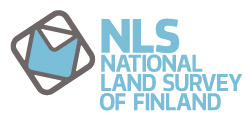


                    Pääohjelma eri testimittausmenetelmien syöttämistä varten / 
                    The Main Program for Inputting Different Testing Methods
                   
                    Author: Tuukka Mattila
                    Do not hesitate to contact via LinkedIn:
                    https://www.linkedin.com/in/tuukkamattila/
                    
                    Thank you for the help: Topi Rikkinen, Marko Ollikainen, Antti Laaksonen, 
                    Hannu Koivula, Octavian Andrei, Mikael Kauhava, Timo Sallinen and Ari Huvinen

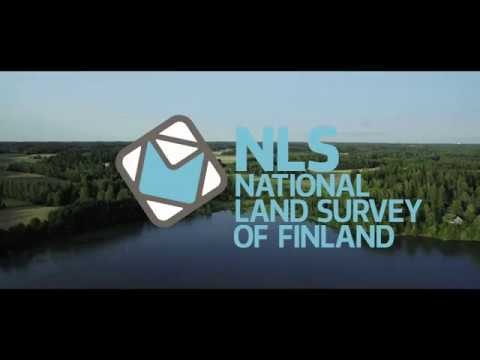

In [1]:
from IPython.display import Markdown, display, YouTubeVideo, HTML

# Use this, when no firewall problems:
display(YouTubeVideo('urj7mGjKY9Q', width=980, height=551.25, autoplay = 1, start = 53, loop = 1, playlist='urj7mGjKY9Q'))
# https://developers.google.com/youtube/player_parameters#Parameters

# Use this, when firewall problems:
# HTML('<iframe width="980" height="551.25" src="https://www.youtube.com/embed/urj7mGjKY9Q" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

Laitetaan kello päälle ohjelman ajan mittaamiseksi. / Let's start the clock for the program to measure the time spent:

In [2]:
import time
time_beginning = time.time()

Tuodaan tarvittavat kirjastot / Import necessary Python libraries:

In [3]:
from IPython.display import Markdown, display, YouTubeVideo, HTML
import os
import sys
import glob
import pathlib
import pandas as pd
from PyPDF2 import PdfFileMerger

Määritetään funktio, joka ajaa NLS GNSS SOFAMESA -ohjelman. / Let's define a function, which runs the NLS GNSS SOFAMESA software:

In [4]:
def run_NLS_GNSS_SOFAMESA(name_of_GNSS_device_or_NRTK_method, testmeasurements_df_name):
    %run NLS_GNSS_SOFAMESA.ipynb
    return table1_df, table2_df, filename_path

Kysytään projektikansion nimi / Let's ask the name of the project folder:

In [5]:
name_of_the_project_folder = str(input("Enter the name of the project folder:\n"))
try:
    os.makedirs('{0}{2}{1}'.format(pathlib.Path.cwd(), name_of_the_project_folder, os.sep))
    project_folder_path = '{0}{2}{1}'.format(pathlib.Path.cwd(), name_of_the_project_folder, os.sep)
except:
    print('Folder already exists. Use the existing project folder location {0}{2}{1}.'.format(pathlib.Path.cwd(), name_of_the_project_folder, os.sep))
    project_folder_path = '{0}{2}{1}'.format(pathlib.Path.cwd(), name_of_the_project_folder, os.sep)

Enter the name of the project folder:
Example Project


Kysytään referenssipisteen, jolla on mitattu, nimi kansion nimeksi / Let's ask the name of the reference point, on which the measurements have been made, as the folder name:

In [6]:
name_of_the_reference_point_folder = str(input("Enter the name of the reference point, on which the measurements have been made, as the folder name:\n"))
try:
    os.makedirs('{0}{3}{1}{3}{2}'.format(pathlib.Path.cwd(), name_of_the_project_folder, name_of_the_reference_point_folder, os.sep))
    reference_point_folder_path = '{0}{3}{1}{3}{2}'.format(pathlib.Path.cwd(), name_of_the_project_folder, name_of_the_reference_point_folder, os.sep)
except:
    print('Folder already exists. Use the existing folder location of the reference point {0}{3}{1}{3}{2}.'.format(pathlib.Path.cwd(), name_of_the_project_folder, name_of_the_reference_point_folder, os.sep))
    reference_point_folder_path = '{0}{3}{1}{3}{2}'.format(pathlib.Path.cwd(), name_of_the_project_folder, name_of_the_reference_point_folder, os.sep)

Enter the name of the reference point, on which the measurements have been made, as the folder name:
90M9180


Luetaan (tai kysytään haluttaessa koko nimi .txt- tai .csv-päätteellä) kaikkien pisteiden referenssikoordinaattien reference_points.txt-tiedosto muodossa [Reference Point Number,Northing,Easting,Elevation]. / Let's read (or ask, if wanted, the whole name with .txt or .csv ending) the reference_points.txt file of the reference coordinates of all of the reference points, formatted as [Reference Point Number,Northing,Easting,Elevation]:

In [7]:
# referencecoordinates_df = pd.read_csv(input("Enter the name of the reference points file (the whole name with .txt or .csv ending). The data has to be formatted as (Reference Point Number,Northing,Easting,Elevation) and the file has to be located in the same folder as this Jupyter Notebook file:\n"), delimiter=',')
referencecoordinates_df = pd.read_csv('reference_points.txt', sep = ',')
referencepoint_number = name_of_the_reference_point_folder

# while referencepoint_number != name_of_the_reference_point_folder or referencecoordinates_df.loc[referencecoordinates_df['Reference Point Number'] == referencepoint_number].empty is True:
    # print("That's not a valid Reference Point Number in your .txt or .csv file or some data doesn't meet the requirements! Try again!")
    # referencecoordinates_df = pd.read_csv(input("Enter the name of the reference points file (.txt or .csv). The data has to be formatted as (Reference Point Number,Northing,Easting,Elevation) and the file has to be located in the same folder as this Jupyter Notebook file:\n"), delimiter=',')

Kysytään mittauskerta referenssipisteellä, jolla on mitattu, kansion nimeksi / Let's ask the number of visit to the reference point, on which the measurements have been made, as the folder name:

In [8]:
number_of_visit_at_the_reference_point = str(input("Enter the number of visit to the reference point, on which the measurements have been made, as the folder name:\n"))
try:
    os.makedirs('{0}{4}{1}{4}{2}{4}{3}'.format(pathlib.Path.cwd(), name_of_the_project_folder, name_of_the_reference_point_folder, number_of_visit_at_the_reference_point, os.sep))
    number_of_visit_at_the_reference_point_folder_path = '{0}{4}{1}{4}{2}{4}{3}'.format(pathlib.Path.cwd(), name_of_the_project_folder, name_of_the_reference_point_folder, number_of_visit_at_the_reference_point, os.sep)
except:
    print('Folder already exists. Use the existing folder location of the number of visit to the reference point {0}{4}{1}{4}{2}{4}{3}.'.format(pathlib.Path.cwd(), name_of_the_project_folder, name_of_the_reference_point_folder, number_of_visit_at_the_reference_point, os.sep))
    number_of_visit_at_the_reference_point_folder_path = '{0}{4}{1}{4}{2}{4}{3}'.format(pathlib.Path.cwd(), name_of_the_project_folder, name_of_the_reference_point_folder, number_of_visit_at_the_reference_point, os.sep)

Enter the number of visit to the reference point, on which the measurements have been made, as the folder name:
1


Kysytään ladattavien tiedostojen lukumäärä / Let's ask the number of files to be uploaded:

In [9]:
number_of_files = int(input("Enter the number of files to be uploaded:\n"))

Enter the number of files to be uploaded:
5


Määritetään oletustoleranssiarvoiksi Pohjois- ja Itäsuunnissa 0.1m ja korkeudessa 0.2m (tai kysytään toleranssiarvot) outlier-havaintojen poistamiseksi / Let's define the default tolerance values for North and East 0.1m and Height 0.2m (or ask the tolerance values) for outlier removal:

In [10]:
# tolerance_north_east = float(input('Enter a single tolerance value (m) for both North and East, which will be used to remove outliers from the measurements (for example 0.1; THE VALUE HAS TO BE POSITIVE:\n'))
# tolerance_height = float(input('Enter a single tolerance value (m) for Height, which will be used to remove outliers from the measurements (for example 0.2; THE VALUE HAS TO BE POSITIVE:\n'))
tolerance_north_east = 0.1
tolerance_height = 0.2

while tolerance_north_east < 0 or tolerance_height < 0 or tolerance_north_east is None or tolerance_height is None:
    print("Those aren't valid numbers! Try again")
    tolerance_north_east = float(input('Enter a single tolerance value (m) for both North and East, which will be used to remove outliers from the measurements (for example 0.1; THE VALUE HAS TO BE POSITIVE:\n'))
    tolerance_height = float(input('Enter a single tolerance value (m) for Height, which will be used to remove outliers from the measurements (for example 0.1; THE VALUE HAS TO BE POSITIVE:\n'))

Määritetään, halutaanko tuottaa analyysiä FIXED-, FLOAT-, CODE_DIFF- ja STANDALONE-parametreistä raportteihin ja taulukoihin. Mittaustiedostoista täytyy löytyä "Solution"-sarakkeesta AINOASTAAN FIXED-, FLOAT-, CODE_DIFF- tai STANDALONE-nimisiä soluja, jos näistä halutaan tuottaa analyysiä.  / Let's define, if the user is willing to receive an analysis of FIXED, FLOAT, CODE_DIFF and STANDALONE parameters in the reports and tables. The test measurement files' column "Solution" should ONLY include cells named FIXED, FLOAT, CODE_DIFF or STANDALONE:

In [11]:
# solution_analysis = input("Do you want to receive an analysis of FIXED, FLOAT, CODE_DIFF and STANDALONE parameters in the reports and tables? The test measurement files' column Solution should ONLY include cells named FIXED, FLOAT, CODE_DIFF or STANDALONE. Enter 'yes' or 'no':\n")
solution_analysis = 'yes'
# solution_analysis = 'no'

Testataan, miten hyvin yllä oleva aineisto asettuu normaalijakauman mukaiseksi. Tuotetaan yllä olevan aineiston keskiarvojen ja -hajontojen avulla malli normaalijakaumalle. Hyödynnetään satunnaisen numeron tuottamista mallin luomiseksi ja lasketaan normaalijakaumat. Voit testata eri otoskoolla mallia./ Let's test, how well the data above can be fitted to follow the Gaussian distribution. We can produce a Gaussian distribution model with the help of the means and standard deviations of the test measurements. Let's utilize random number generation to produce the model and calculate distributions. You can test the model with varying sample sizes:

In [12]:
# size = int(input('Enter the sample size (for example 10, 100, 1000 or 10000; THE VALUES HAS TO BE BETWEEN 1-20000 AND AN INTEGER):\n'))
size = 10000

while int(size) < 1 or int(size) > 20000 or int(size) is None:
    print("Those aren't valid numbers! Try again")
    size = int(input('Enter the sample size (for example 10, 100, 1000 or 10000; THE VALUES HAS TO BE BETWEEN 1-20000 AND AN INTEGER):\n'))

Kysytään GNSS-laitteen tai verkko-RTK-menetelmän, jolla on mitattu, nimeä kansion nimeksi.

Kysytään myös testimittausten tiedoston nimi (koko nimi .txt- tai .csv-päätteellä). Testidataa pitää olla vähintään 3600 havaintoa per piste. Täyttyykö ehto? Esimerkiksi 10 sekunnin havaintojaksolla ja 1 epookin tallennusvälillä keskiarvoistettuja ratkaisuja tulisi olla 3600 kpl. Onko tiedostossa vähintään 3600 mittaustulosta pisteelle?

Tuodaan data .txt- tai .csv-muodossa, eroteltuna ","-merkillä ja muotoiltuna (sarakkeiden järjestyksellä ei ole väliä) [Point Number,Code,Date,Time,Solution,Physical Station ID,Virtual Station ID,Northing,Easting,Ell Ht,Elev,Ant Ht,HRMS,VRMS,HDOP,VDOP,PDOP,GDOP,TDOP,GPS,GLONASS,GALILEO,BEIDOU,SBAS,QZSS]/ 

/ 

Let's ask the name of the GNSS device or Network-RTK method, which have been utilized, as the folder name. 

Let's also ask the name of the testmeasurements file (the whole name with .txt or .csv ending). The test data should consist of at least 3600 measurements per reference point. Is the requirement met? For example, with 10 seconds measurement time and 1 second epocs, averaged solutions should be 3600 pcs. Does the file consist of at least 3600 measurements for the point?

Import the data in .txt or .csv and separated with "," and formatted as (the order of the columns doesn't matter) [Point Number,Code,Date,Time,Solution,Physical Station ID,Virtual Station ID,Northing,Easting,Ell Ht,Elev,Ant Ht,HRMS,VRMS,HDOP,VDOP,PDOP,GDOP,TDOP,GPS,GLONASS,GALILEO,BEIDOU,SBAS,QZSS]:

In [13]:
i = 0
testmeasurements_name_list = []
GNSS_device_or_NRTK_method_folder_path_list = []
testmeasurements_df_name_list = []
filepaths = []
filepaths_method_figures = []
while i < number_of_files:
    name_of_GNSS_device_or_NRTK_method = str(input("Enter the folder name of the GNSS device or Network-RTK method:\n"))
    testmeasurements_name_list.append(name_of_GNSS_device_or_NRTK_method)
    try:
        os.makedirs('{0}{4}{1}{4}{2}{4}{3}'.format(pathlib.Path.cwd(), name_of_the_project_folder, name_of_the_reference_point_folder, name_of_GNSS_device_or_NRTK_method, os.sep))
        GNSS_device_or_NRTK_method_folder_path = '{0}{4}{1}{4}{2}{4}{3}'.format(pathlib.Path.cwd(), name_of_the_project_folder, name_of_the_reference_point_folder, name_of_GNSS_device_or_NRTK_method, os.sep)
        GNSS_device_or_NRTK_method_folder_path_list.append(GNSS_device_or_NRTK_method_folder_path)
    except:
        print('Folder already exists. Use the existing folder location of the GNSS device or Network-RTK method {0}{4}{1}{4}{2}{4}{3}.'.format(pathlib.Path.cwd(), name_of_the_project_folder, name_of_the_reference_point_folder, name_of_GNSS_device_or_NRTK_method, os.sep))
        GNSS_device_or_NRTK_method_folder_path = '{0}{4}{1}{4}{2}{4}{3}'.format(pathlib.Path.cwd(), name_of_the_project_folder, name_of_the_reference_point_folder, name_of_GNSS_device_or_NRTK_method, os.sep)
        GNSS_device_or_NRTK_method_folder_path_list.append(GNSS_device_or_NRTK_method_folder_path)
    testmeasurements_df_name = input("Enter the name of the {} testmeasurements file (the whole name with .txt or .csv ending). The data has to be formatted as (Point Number,Code,Date,Time,Solution,Physical Station ID,Virtual Station ID,Northing,Easting,Ell Ht,Elev,Ant Ht,HRMS,VRMS,HDOP,VDOP,PDOP,GDOP,TDOP,GPS,GLONASS,GALILEO,BEIDOU,SBAS,QZSS) and the file has to be located in the same folder as this Jupyter Notebook file:\n".format(name_of_GNSS_device_or_NRTK_method))
    testmeasurements_df_name_list.append(testmeasurements_df_name)
    i += 1

j = 0
while j < len(testmeasurements_name_list):
    name_of_GNSS_device_or_NRTK_method = testmeasurements_name_list[j]
    GNSS_device_or_NRTK_method_folder_path = GNSS_device_or_NRTK_method_folder_path_list[j]
    testmeasurements_df_name = testmeasurements_df_name_list[j]
    table1_df, table2_df, filename_path = run_NLS_GNSS_SOFAMESA(name_of_GNSS_device_or_NRTK_method, testmeasurements_df_name)
    testmeasurements_df_name = testmeasurements_df_name.split('.')[0]
    table1_df.name = str(name_of_GNSS_device_or_NRTK_method)
    table2_df.name = str(name_of_GNSS_device_or_NRTK_method)
    if j == 0:
        all_table1s = pd.DataFrame(table1_df)
        all_table1s.rename(columns = {'Parameter': 'Parameter', 'Value': '{}'.format(name_of_GNSS_device_or_NRTK_method)}, inplace=True)
        all_table2s = pd.DataFrame(table2_df)
        all_table2s.rename(columns = {'Parameter': 'Parameter', 'Precision*': '{}: P*'.format(name_of_GNSS_device_or_NRTK_method), 'Accuracy**': '{}: A**'.format(name_of_GNSS_device_or_NRTK_method)}, inplace=True)
    if j > 0:
        table1_df.rename(columns = {'Parameter': 'Parameter', 'Value': '{}'.format(name_of_GNSS_device_or_NRTK_method)}, inplace=True)
        all_table1s = pd.concat([all_table1s, table1_df.loc[:, '{}'.format(name_of_GNSS_device_or_NRTK_method)]], axis = 1)
        table2_df.rename(columns = {'Parameter': 'Parameter', 'Precision*': '{}: P*'.format(name_of_GNSS_device_or_NRTK_method), 'Accuracy**': '{}: A**'.format(name_of_GNSS_device_or_NRTK_method)}, inplace=True)
        all_table2s = pd.concat([all_table2s, table2_df.loc[:, '{}: P*'.format(name_of_GNSS_device_or_NRTK_method)], table2_df.loc[:, '{}: A**'.format(name_of_GNSS_device_or_NRTK_method)]], axis = 1)
    filepaths.append(filename_path)
    filepaths_method_figures.append(session_folder_path)
    
    exec("table1_df.to_csv(os.path.join(GNSS_device_or_NRTK_method_folder_path, testmeasurements_df_name, r'{}_table1.csv'))".format(testmeasurements_df_name))
    exec("table2_df.to_csv(os.path.join(GNSS_device_or_NRTK_method_folder_path, testmeasurements_df_name, r'{}_table2.csv'))".format(testmeasurements_df_name))
    j += 1
    
exec("all_table1s.to_csv(os.path.join(number_of_visit_at_the_reference_point_folder_path, r'{0}_{1}_Combined_Statistics_Table1.csv'))".format(name_of_the_reference_point_folder, number_of_visit_at_the_reference_point))
exec("all_table2s.to_csv(os.path.join(number_of_visit_at_the_reference_point_folder_path, r'{0}_{1}_Combined_Statistics_Table2.csv'))".format(name_of_the_reference_point_folder, number_of_visit_at_the_reference_point))

Enter the folder name of the GNSS device or Network-RTK method:
METHOD1
Enter the name of the METHOD1 testmeasurements file (the whole name with .txt or .csv ending). The data has to be formatted as (Point Number,Code,Date,Time,Solution,Physical Station ID,Virtual Station ID,Northing,Easting,Ell Ht,Elev,Ant Ht,HRMS,VRMS,HDOP,VDOP,PDOP,GDOP,TDOP,GPS,GLONASS,GALILEO,BEIDOU,SBAS,QZSS) and the file has to be located in the same folder as this Jupyter Notebook file:
20190524-A-90M9180-METHOD1-1.txt
Enter the folder name of the GNSS device or Network-RTK method:
METHOD2
Enter the name of the METHOD2 testmeasurements file (the whole name with .txt or .csv ending). The data has to be formatted as (Point Number,Code,Date,Time,Solution,Physical Station ID,Virtual Station ID,Northing,Easting,Ell Ht,Elev,Ant Ht,HRMS,VRMS,HDOP,VDOP,PDOP,GDOP,TDOP,GPS,GLONASS,GALILEO,BEIDOU,SBAS,QZSS) and the file has to be located in the same folder as this Jupyter Notebook file:
20190524-A-90M9180-METHOD2-1.txt
En

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

C:\Users\TMATTILA\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 3 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 2 Axes>

<Figure size 1500x1200 with 2 Axes>

<Figure size 1500x1200 with 2 Axes>

C:\Omat\Jupyter_Notebook\Example Project\90M9180\METHOD1\20190524-A-90M9180-METHOD1-1\20190524-A-90M9180-METHOD1-1_Measurement_Report.pdf created


**This program took 13.43s to finish!**

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 3 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 2 Axes>

<Figure size 1500x1200 with 2 Axes>

<Figure size 1500x1200 with 2 Axes>

C:\Omat\Jupyter_Notebook\Example Project\90M9180\METHOD2\20190524-A-90M9180-METHOD2-1\20190524-A-90M9180-METHOD2-1_Measurement_Report.pdf created


**This program took 12.21s to finish!**

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 3 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 2 Axes>

<Figure size 1500x1200 with 2 Axes>

<Figure size 1500x1200 with 2 Axes>

C:\Omat\Jupyter_Notebook\Example Project\90M9180\METHOD3\20190524-A-90M9180-METHOD3-1\20190524-A-90M9180-METHOD3-1_Measurement_Report.pdf created


**This program took 12.37s to finish!**

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 3 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 2 Axes>

<Figure size 1500x1200 with 2 Axes>

<Figure size 1500x1200 with 2 Axes>

C:\Omat\Jupyter_Notebook\Example Project\90M9180\METHOD4\20190524-A-90M9180-METHOD4-1\20190524-A-90M9180-METHOD4-1_Measurement_Report.pdf created


**This program took 11.13s to finish!**

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 3 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 2 Axes>

<Figure size 1500x1200 with 2 Axes>

<Figure size 1500x1200 with 2 Axes>

C:\Omat\Jupyter_Notebook\Example Project\90M9180\METHOD5\20190524-A-90M9180-METHOD5-1\20190524-A-90M9180-METHOD5-1_Measurement_Report.pdf created


**This program took 11.13s to finish!**

Yhdistetään pdf-tiedostot yhdeksi pdf-tiedostoksi: / Let's merge multiple pdf files together:

In [14]:
%run create_combined_pdf.ipynb

C:\Omat\Jupyter_Notebook\Example Project\90M9180\1\90M9180_1_Combined_Measurement_Report.pdf created


Kysytään, halutaanko luoda "Conclusions"-kansio, johon tuotetaan yhteenveto referenssipisteillä suoritetuista kaikista mittauskerroista eri GNSS-laitteilla tai verkko-RTK-menetelmillä. / Let's ask, if the user wants to create a "Conclusions" folder, which includes a conclusion of all the measurements with the different GNSS devices or Network-RTK methods at the reference point:

Do you want to create a Conclusions folder, which includes a conclusion of all the measurements with the different GNSS devices or Network-RTK methods at the reference point? Enter 'yes' or 'no':
yes
Enter the total number of visits to the reference point on which the measurements have been made:
10
Enter the number of files to be uploaded:
5
Enter the folder name of the GNSS device or Network-RTK method:
METHOD1
Enter the name of the METHOD1 conclusions testmeasurements file (the whole name with .txt or .csv ending). The data has to be formatted as (Point Number,Code,Date,Time,Solution,Physical Station ID,Virtual Station ID,Northing,Easting,Ell Ht,Elev,Ant Ht,HRMS,VRMS,HDOP,VDOP,PDOP,GDOP,TDOP,GPS,GLONASS,GALILEO,BEIDOU,SBAS,QZSS) and the file has to be located in the same folder as this Jupyter Notebook file:
20190524-A-90M9180-METHOD1-1.txt
Enter the folder name of the GNSS device or Network-RTK method:
METHOD2
Enter the name of the METHOD2 conclusions testmeasurements file (the who

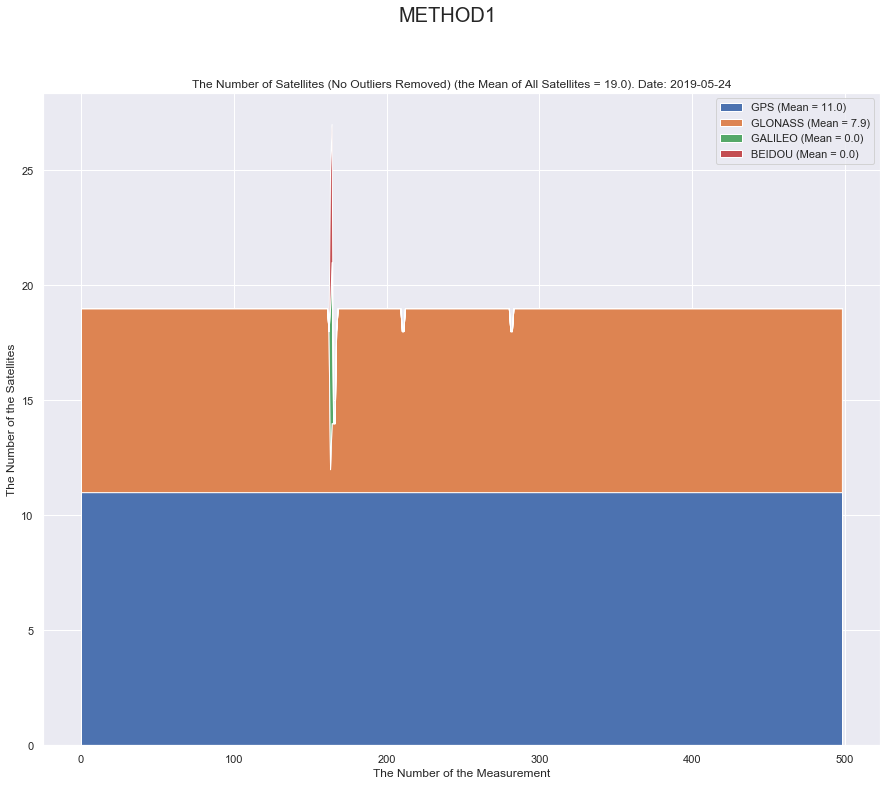

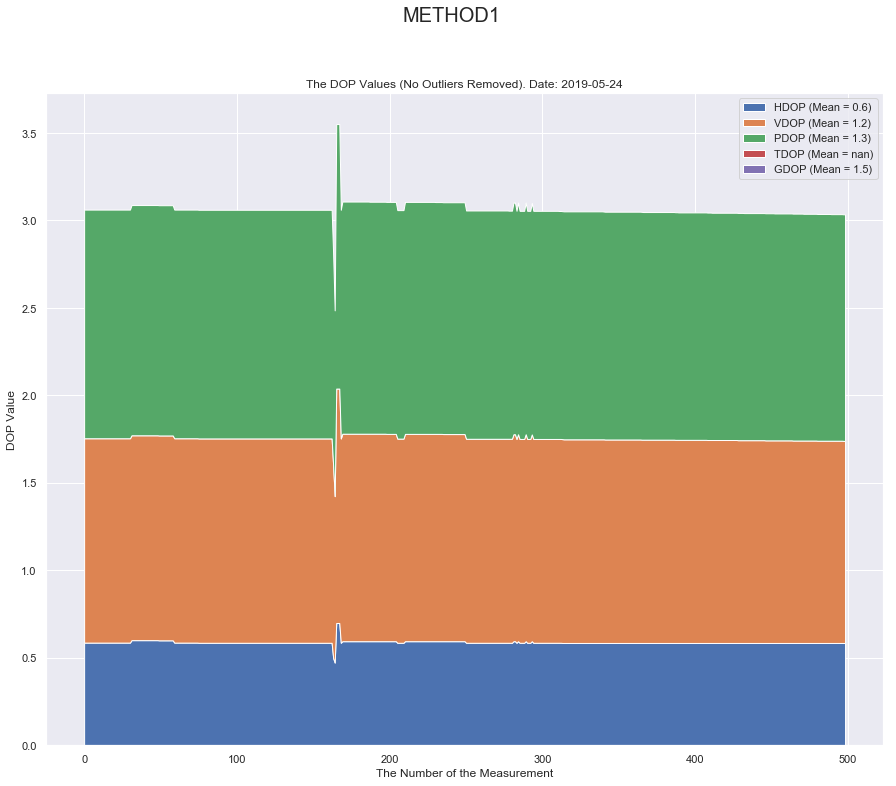

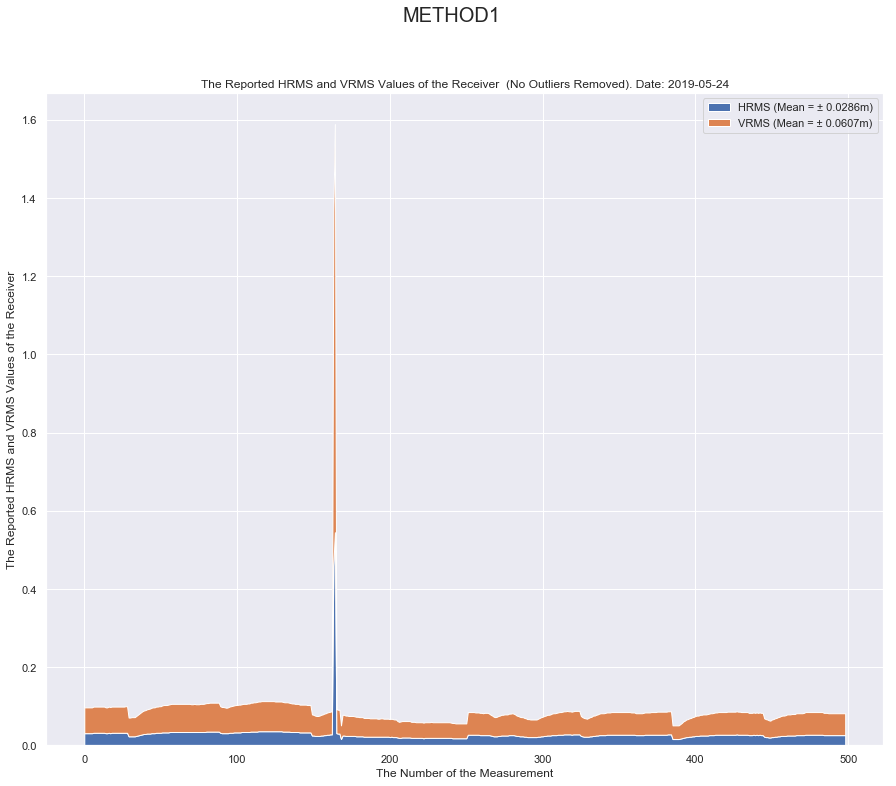

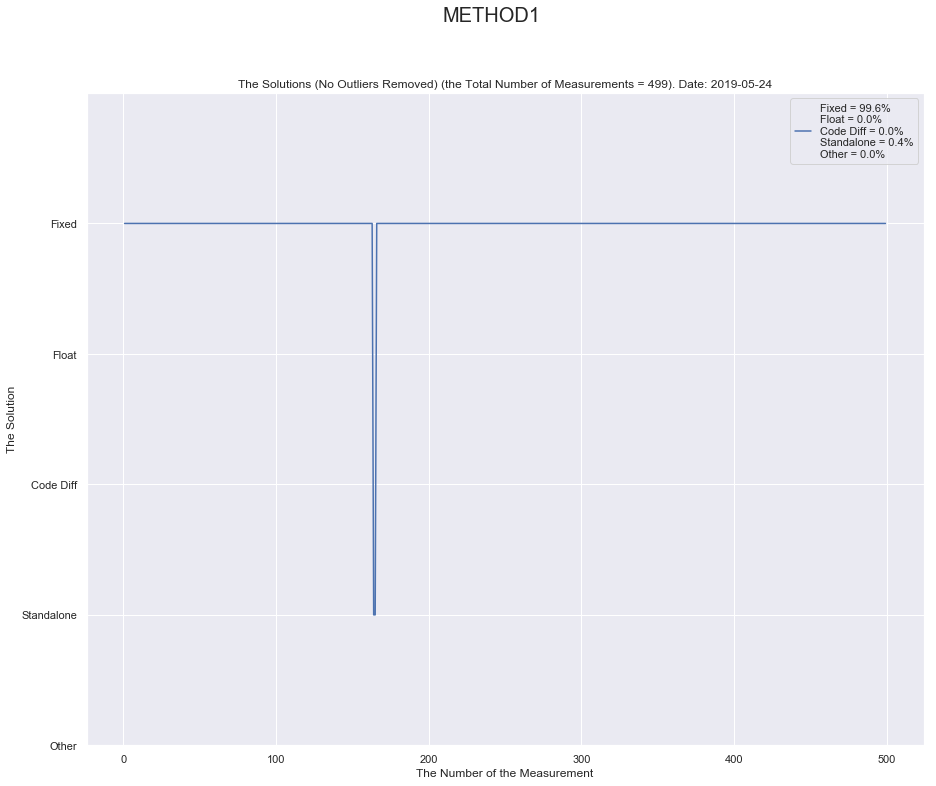

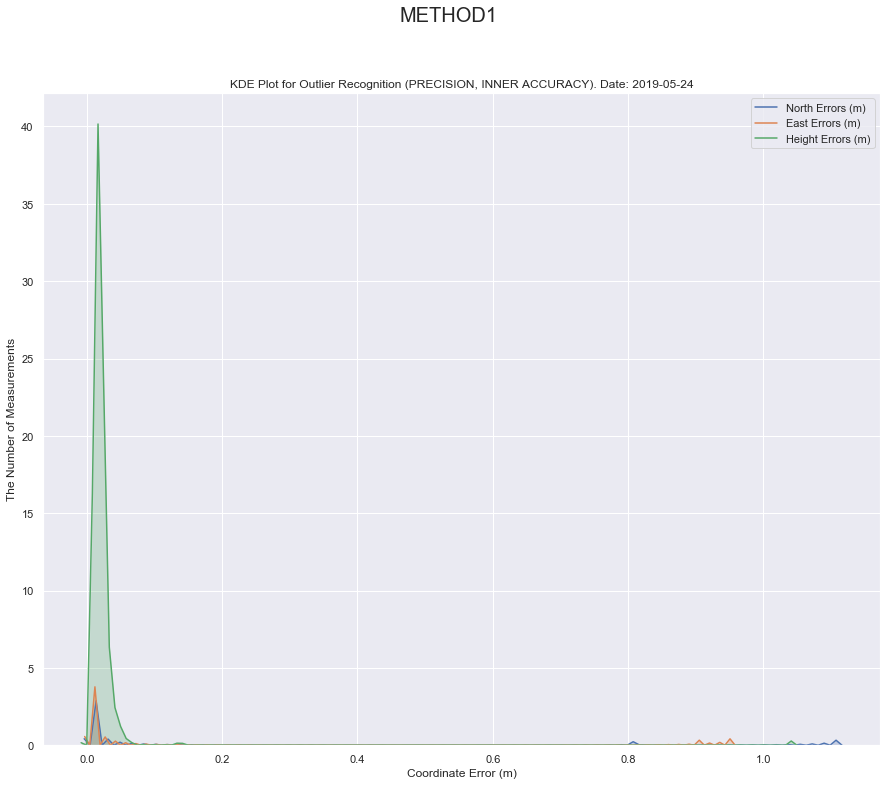

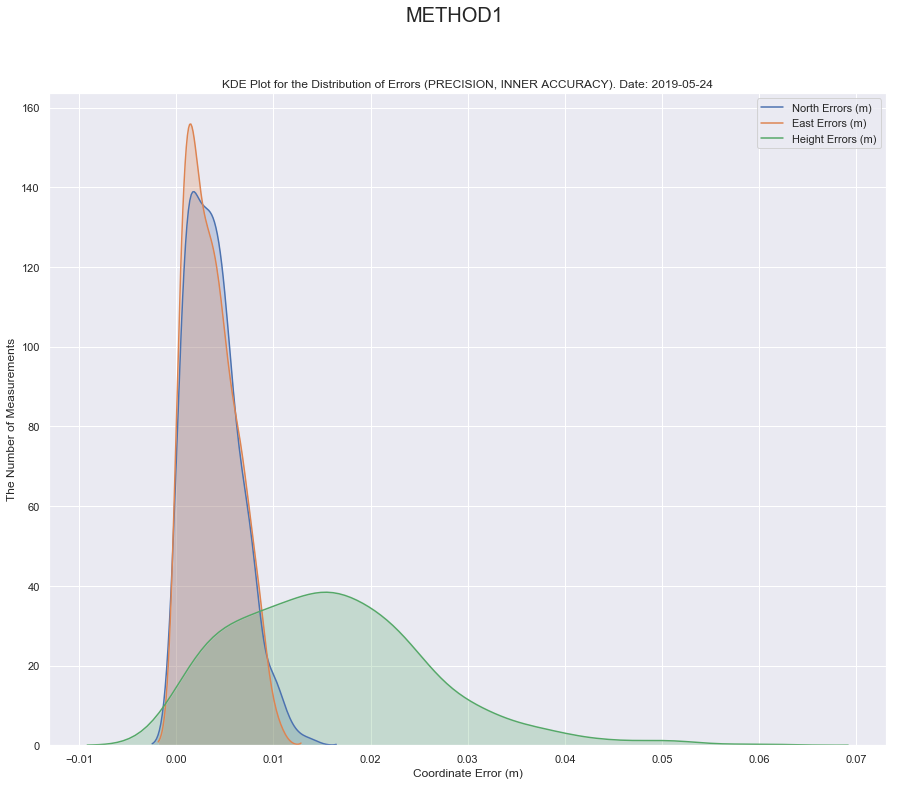

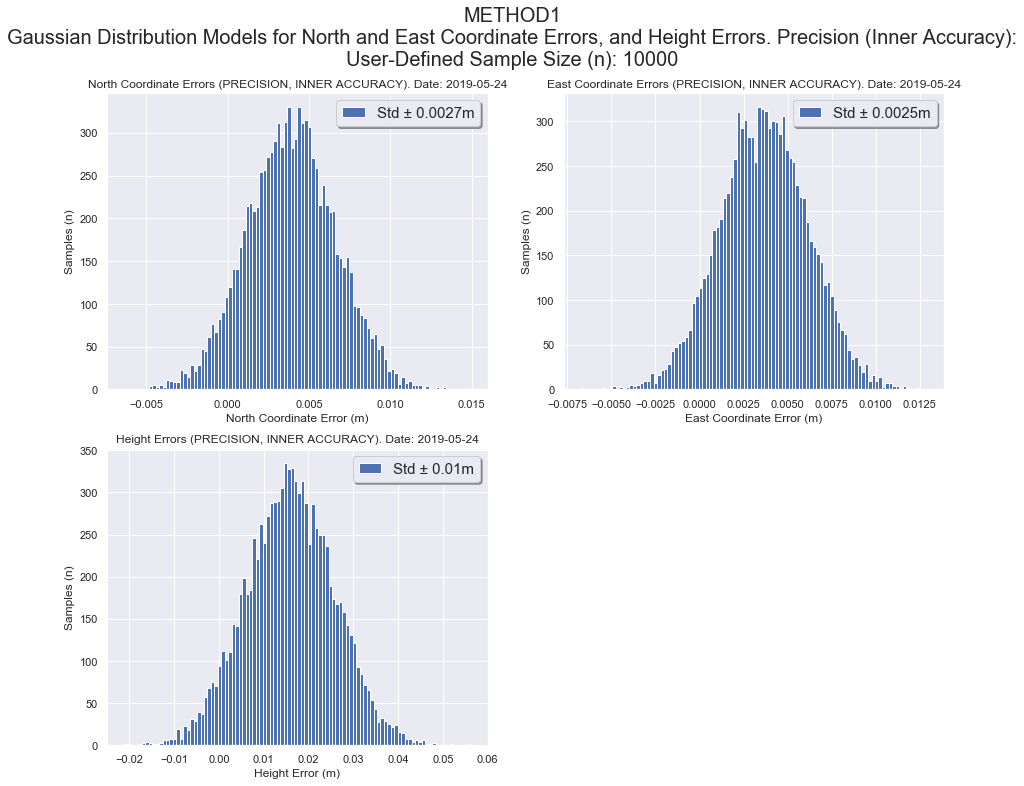

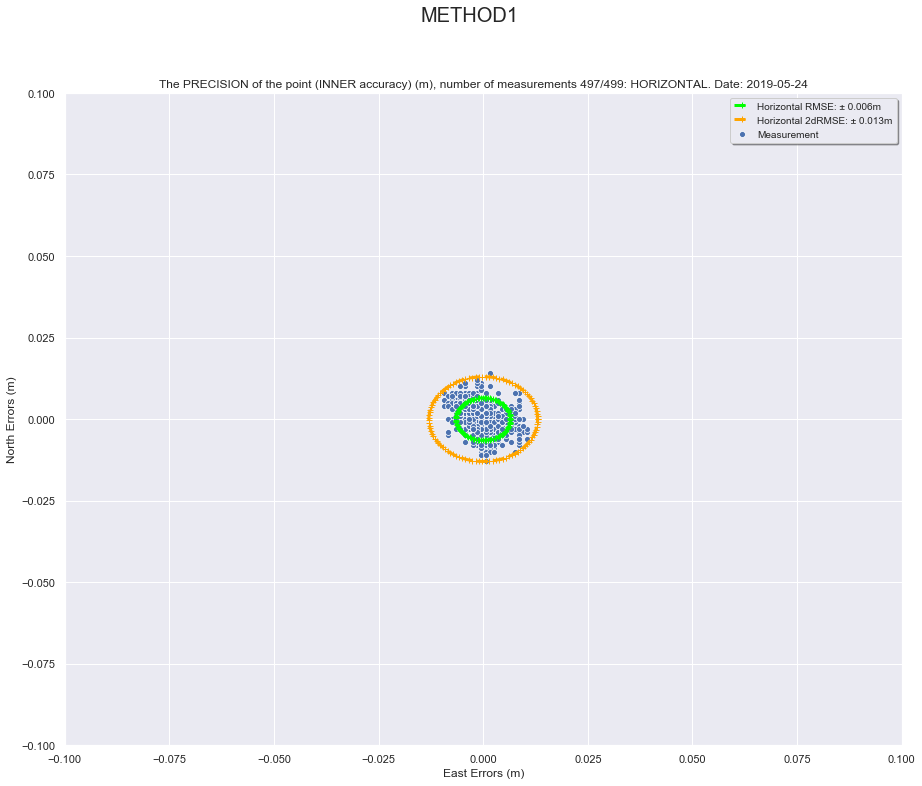

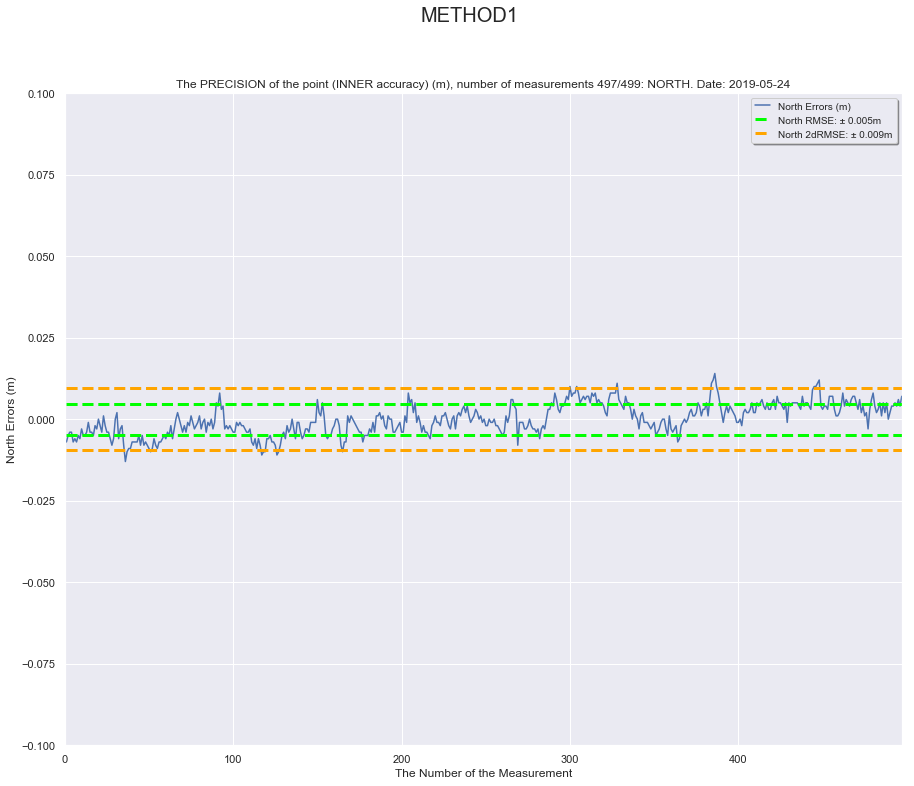

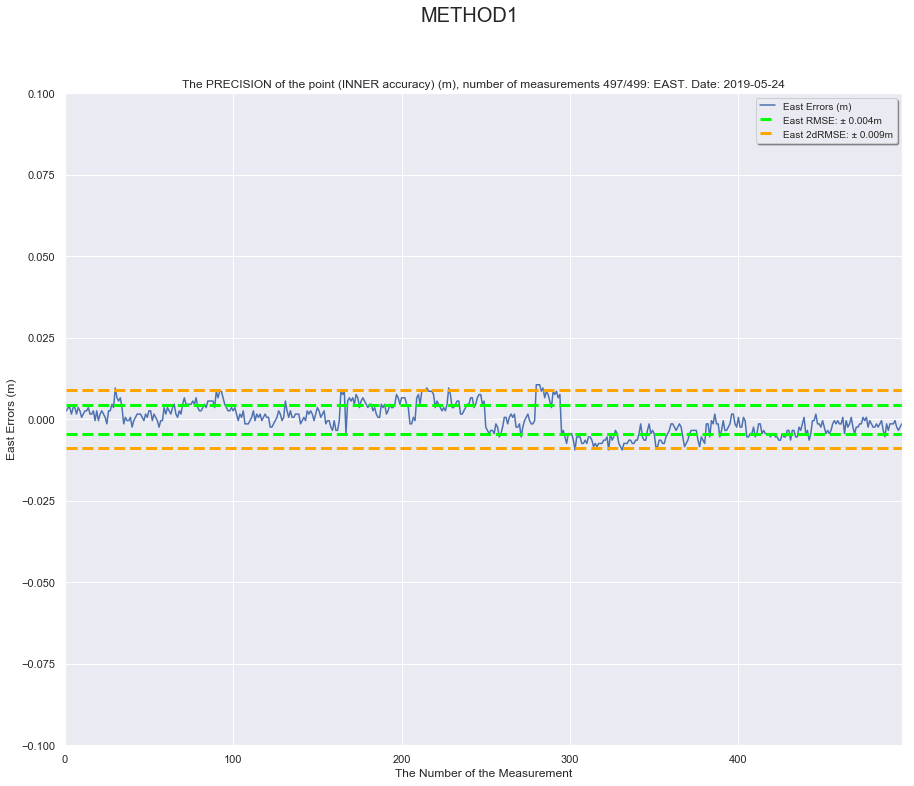

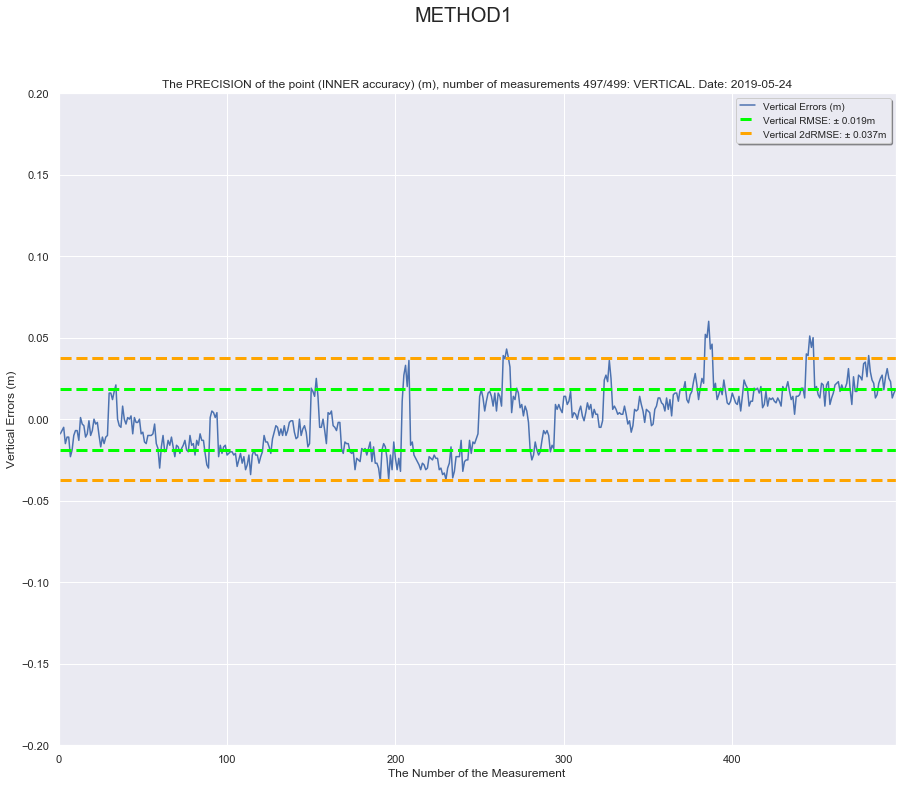

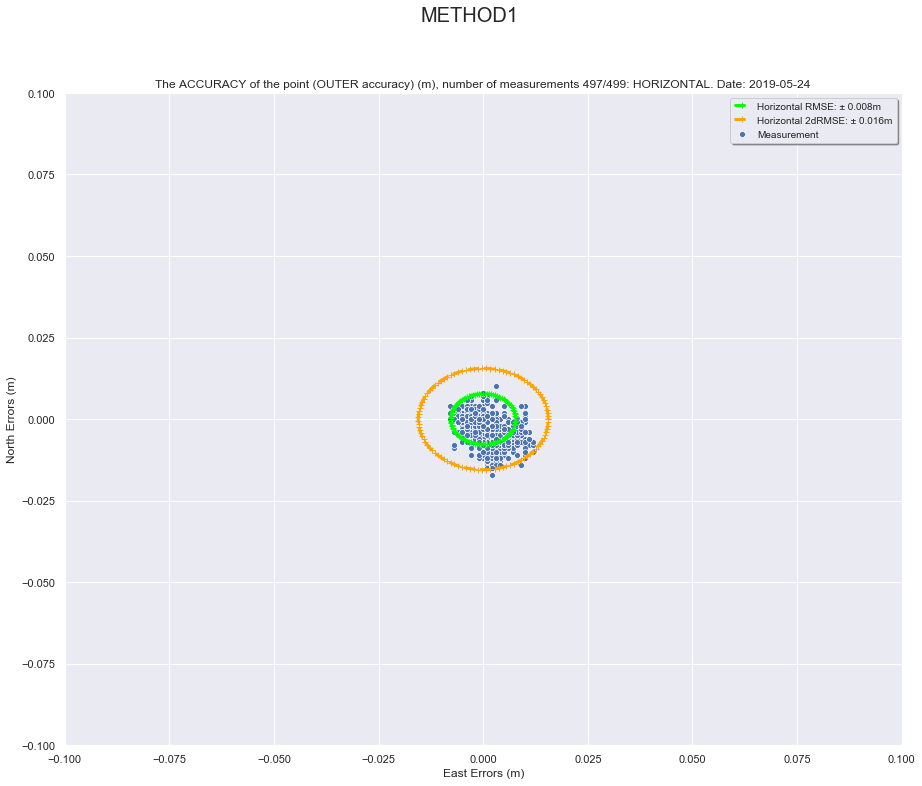

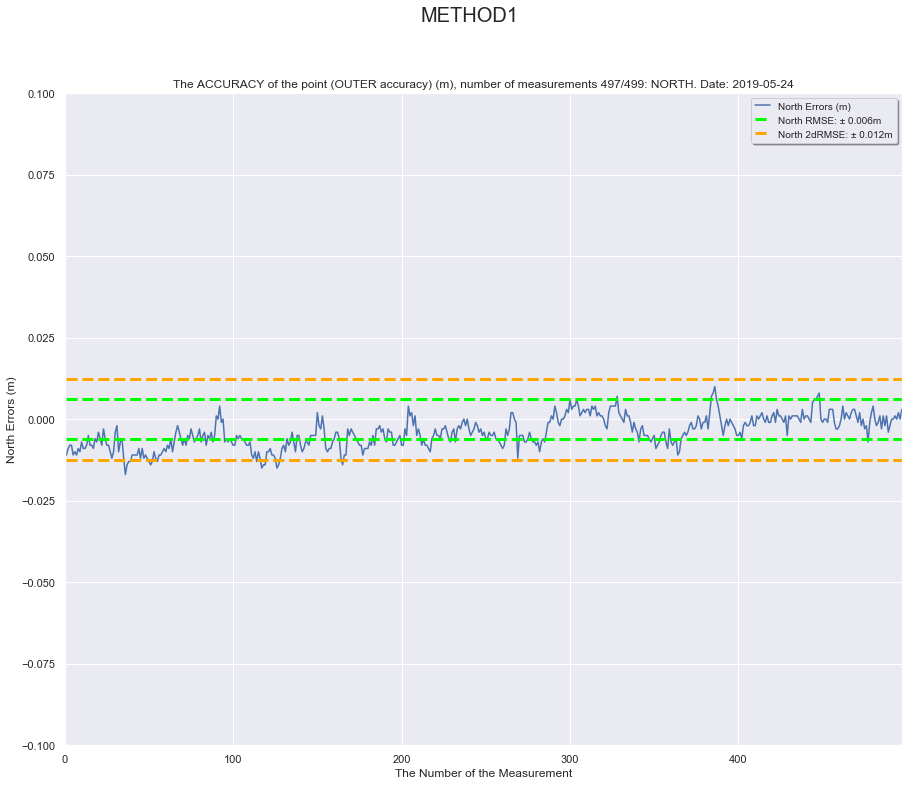

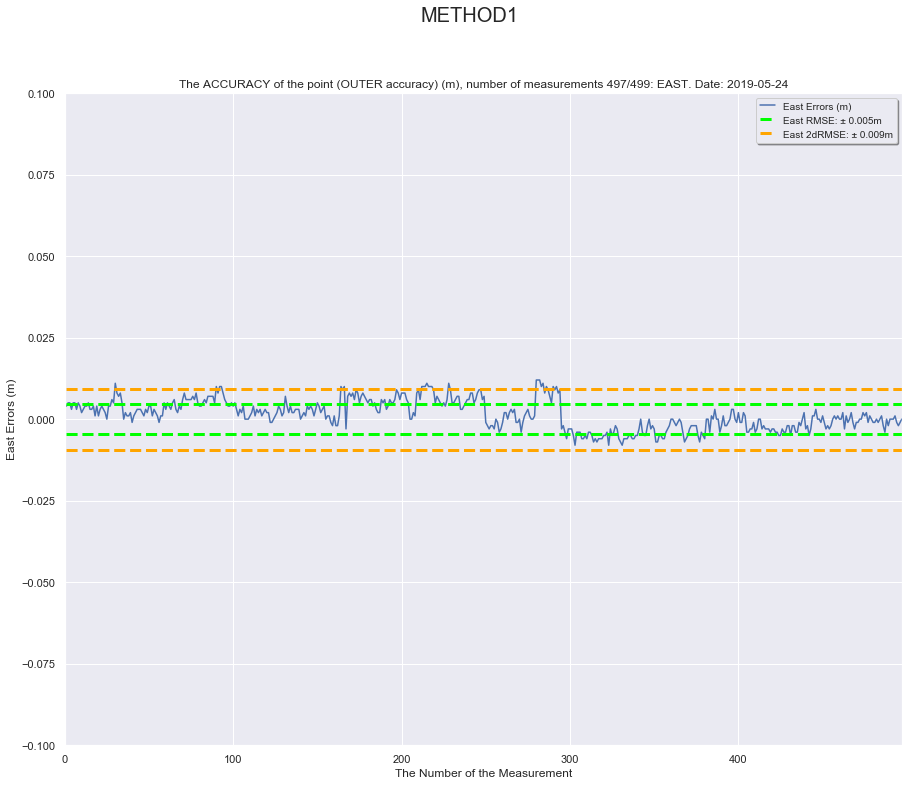

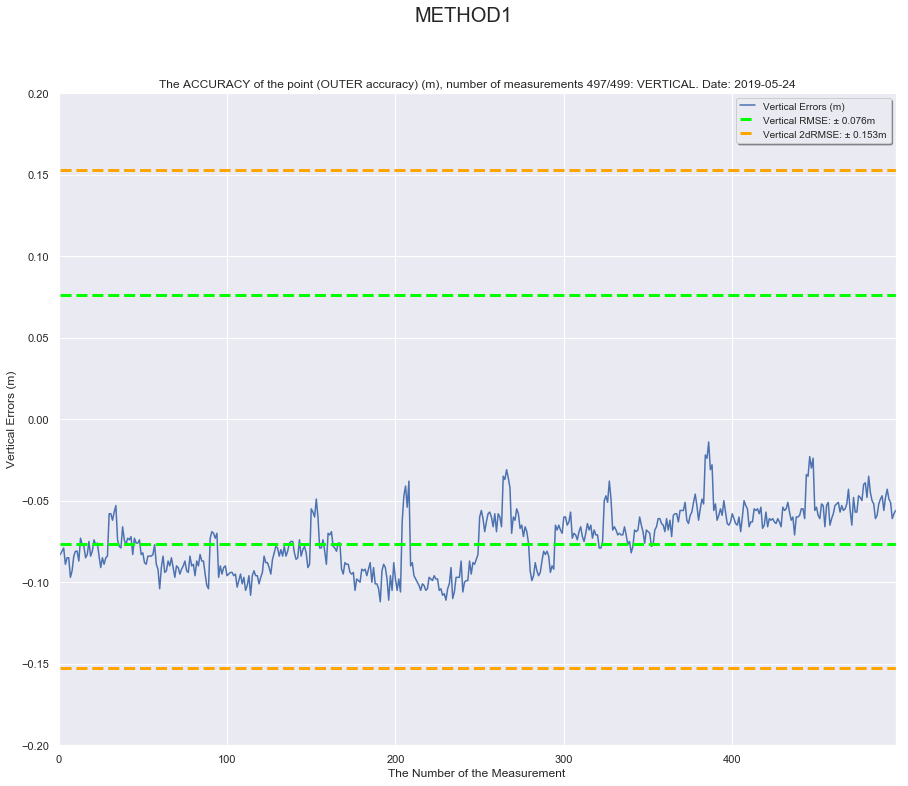

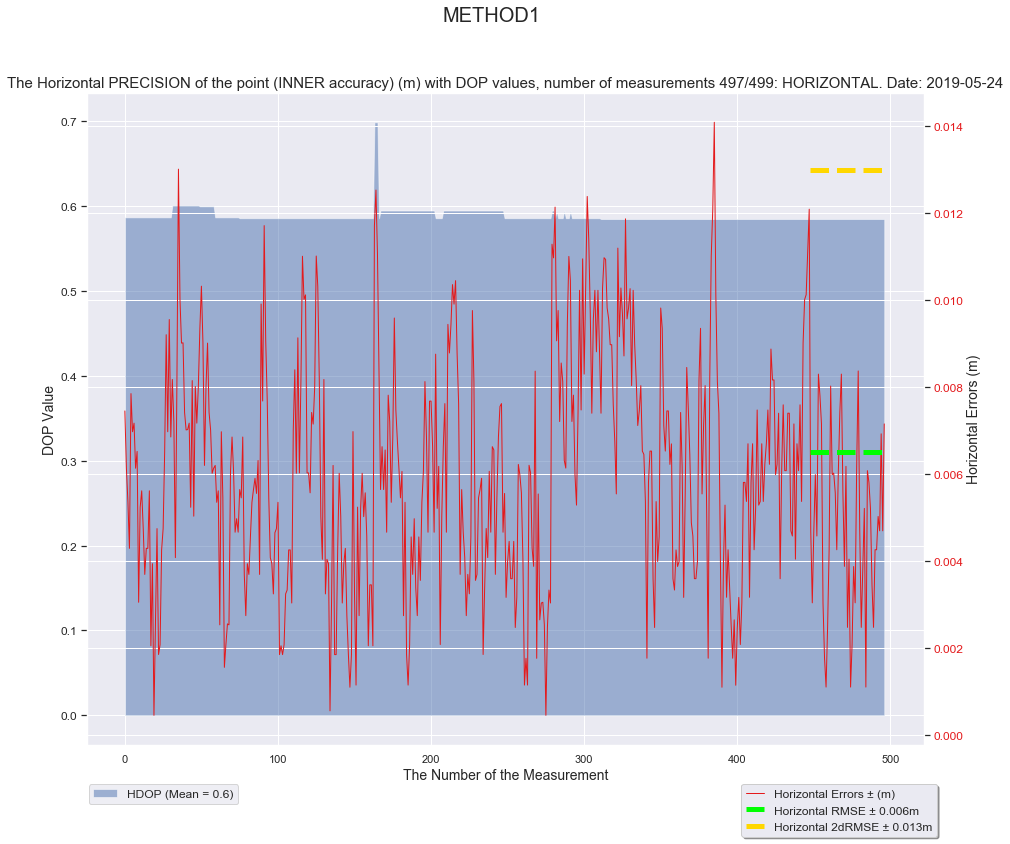

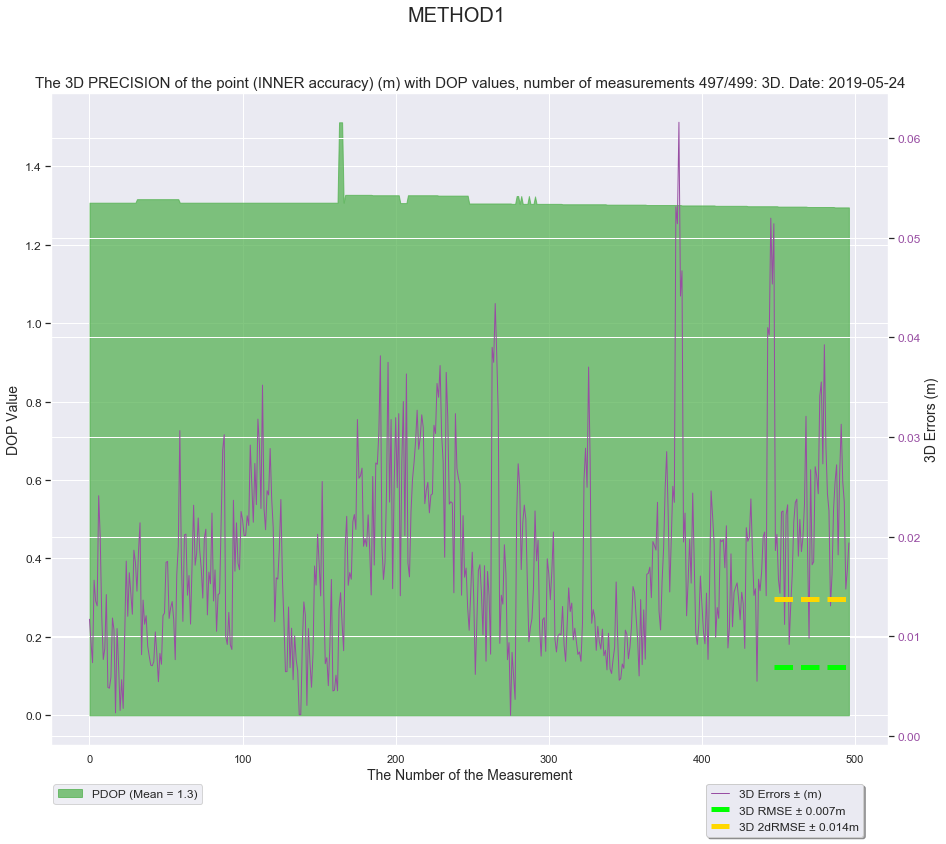

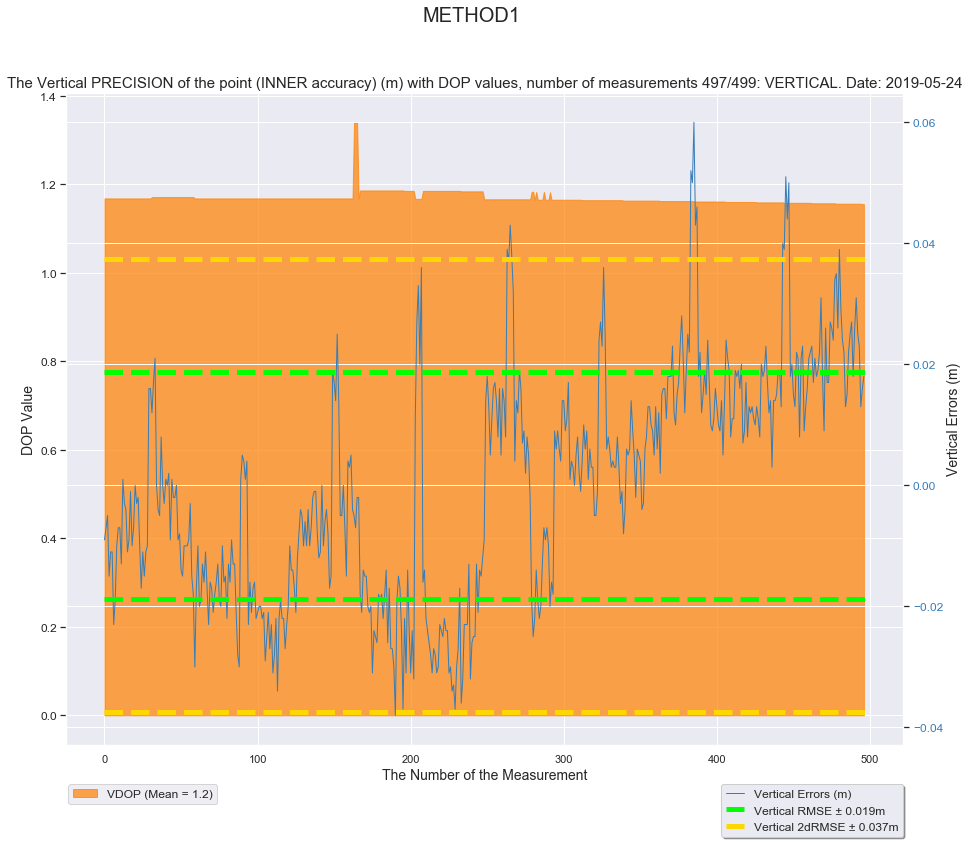

C:\Omat\Jupyter_Notebook\Example Project\90M9180\Conclusions\METHOD1\20190524-A-90M9180-METHOD1-1\20190524-A-90M9180-METHOD1-1_Measurement_Report.pdf created


**This program took 12.79s to finish!**

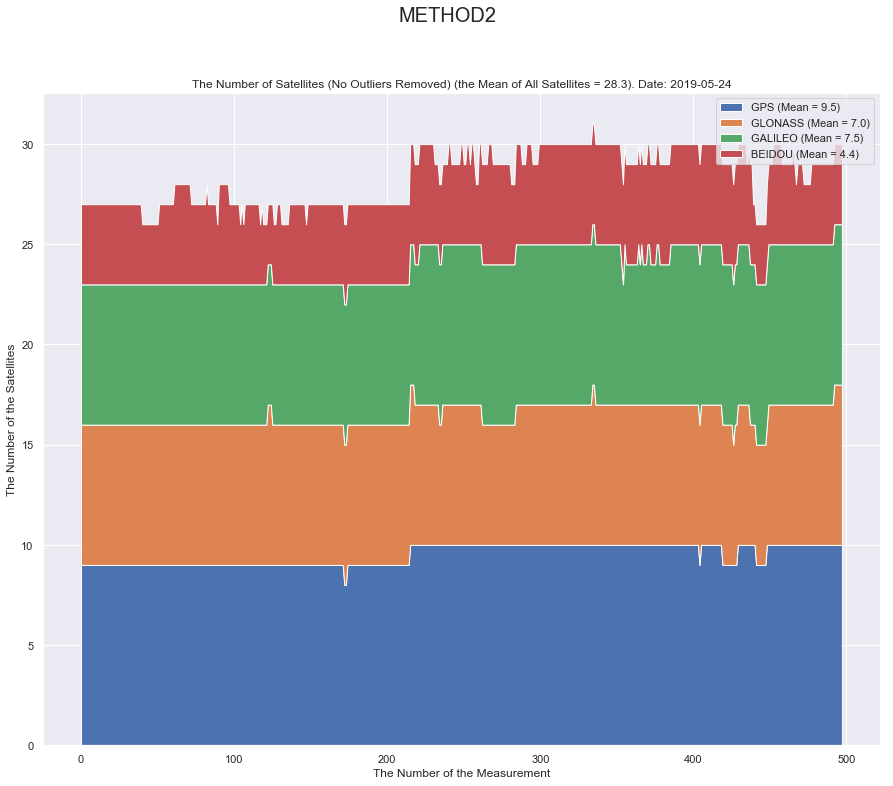

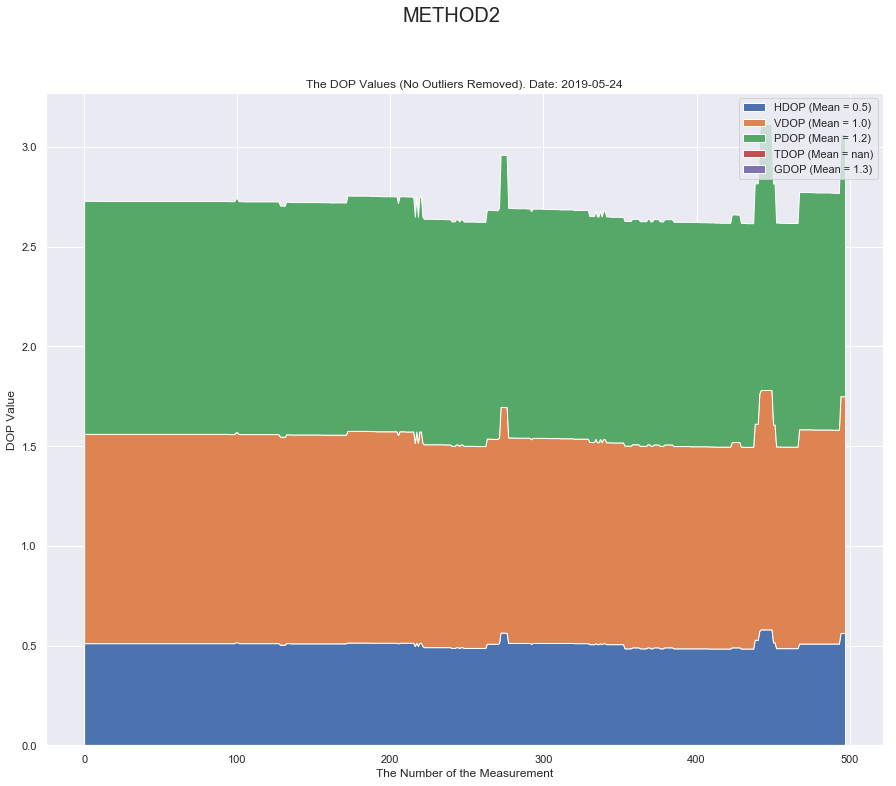

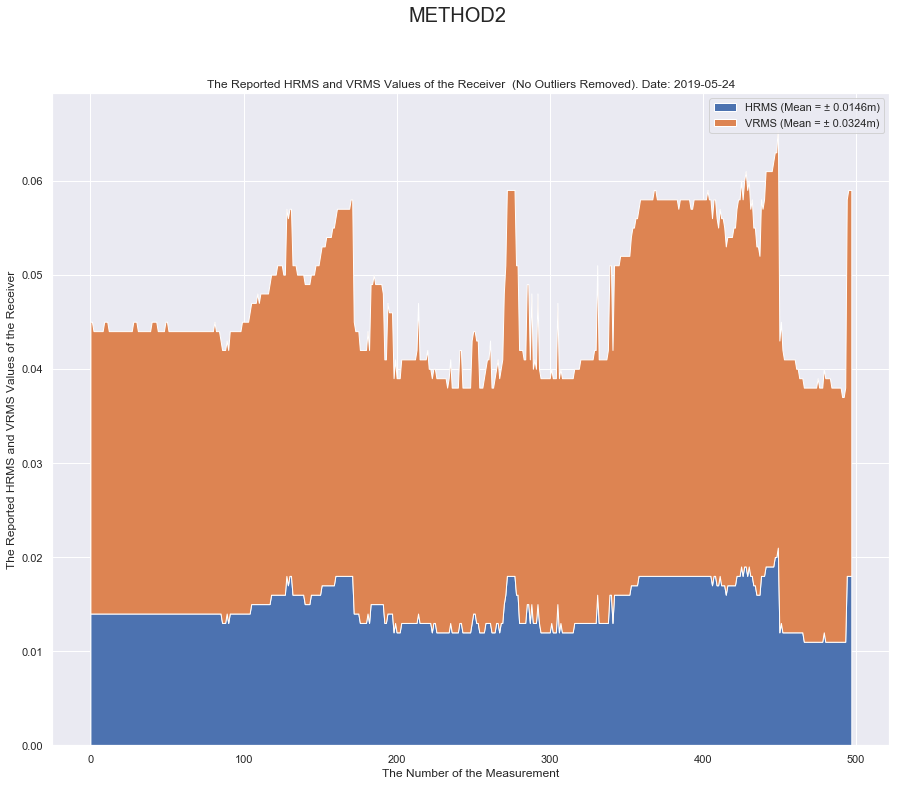

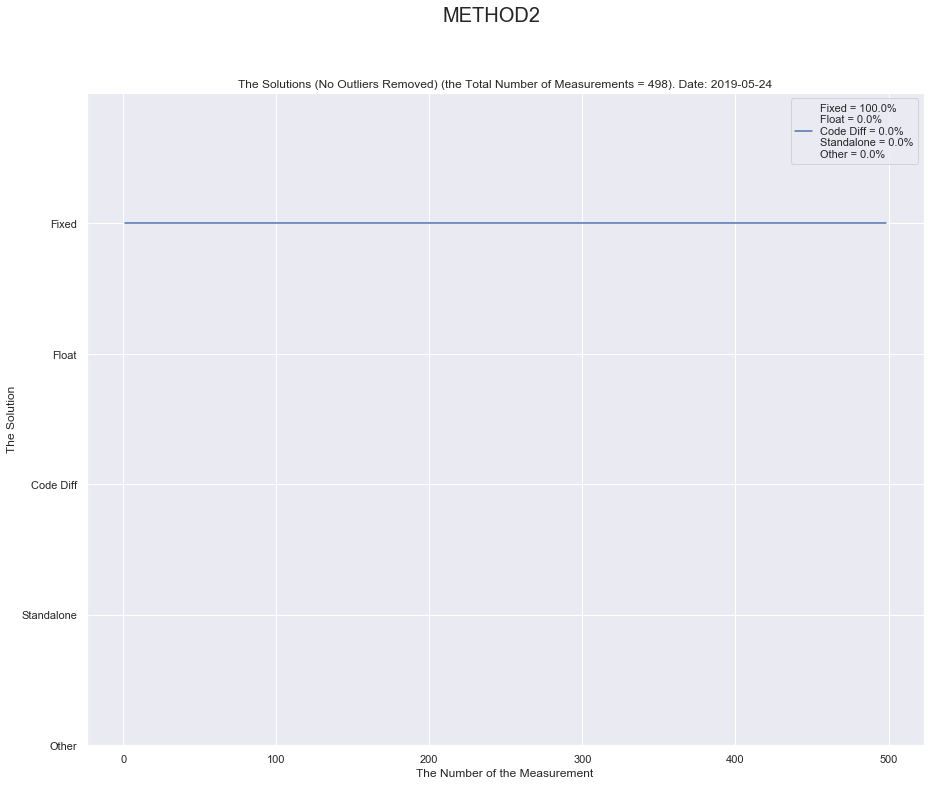

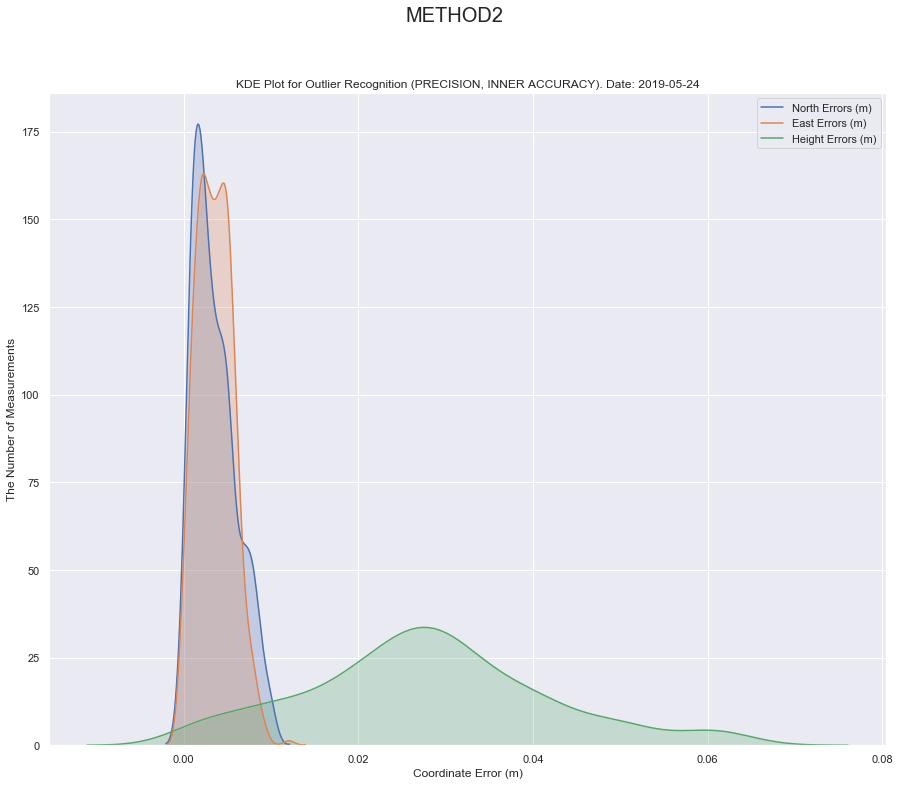

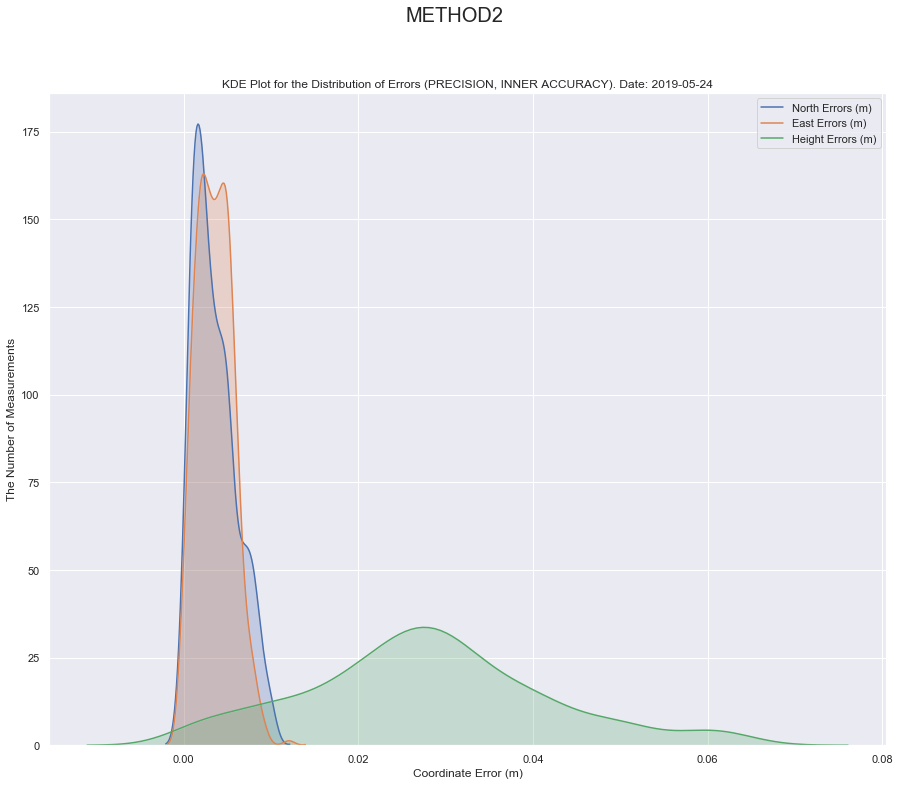

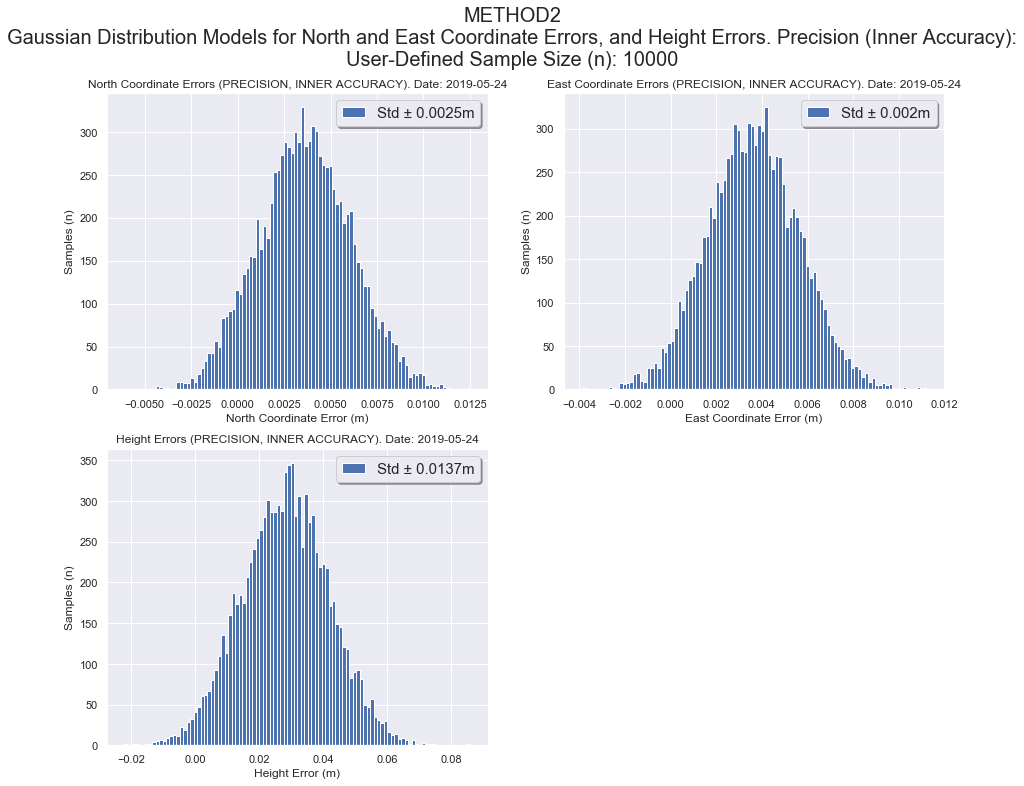

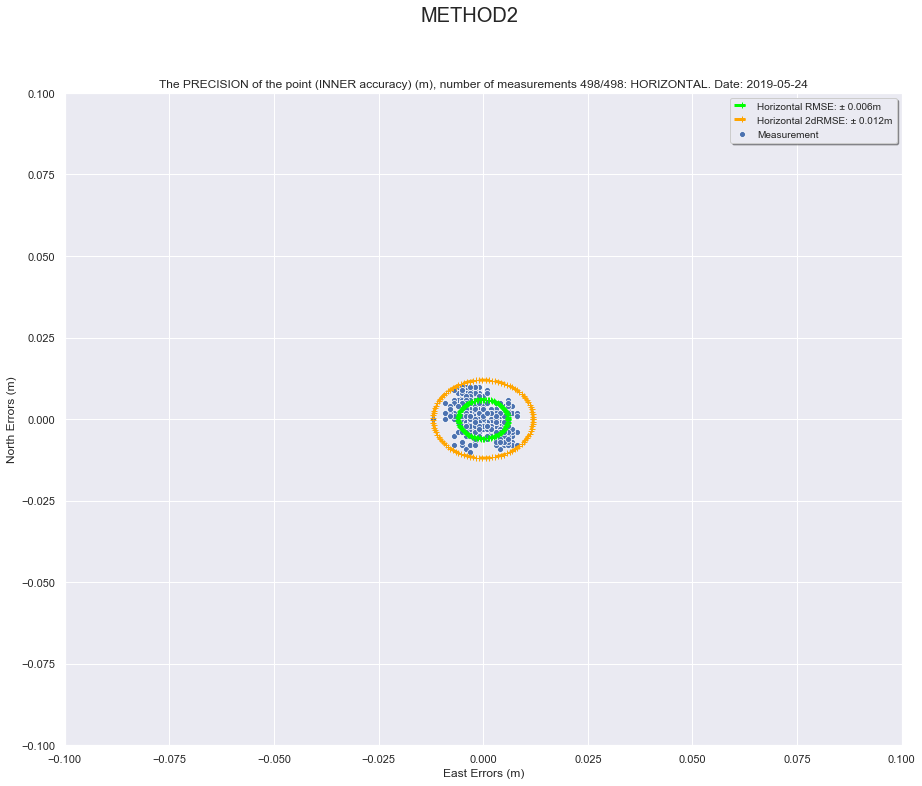

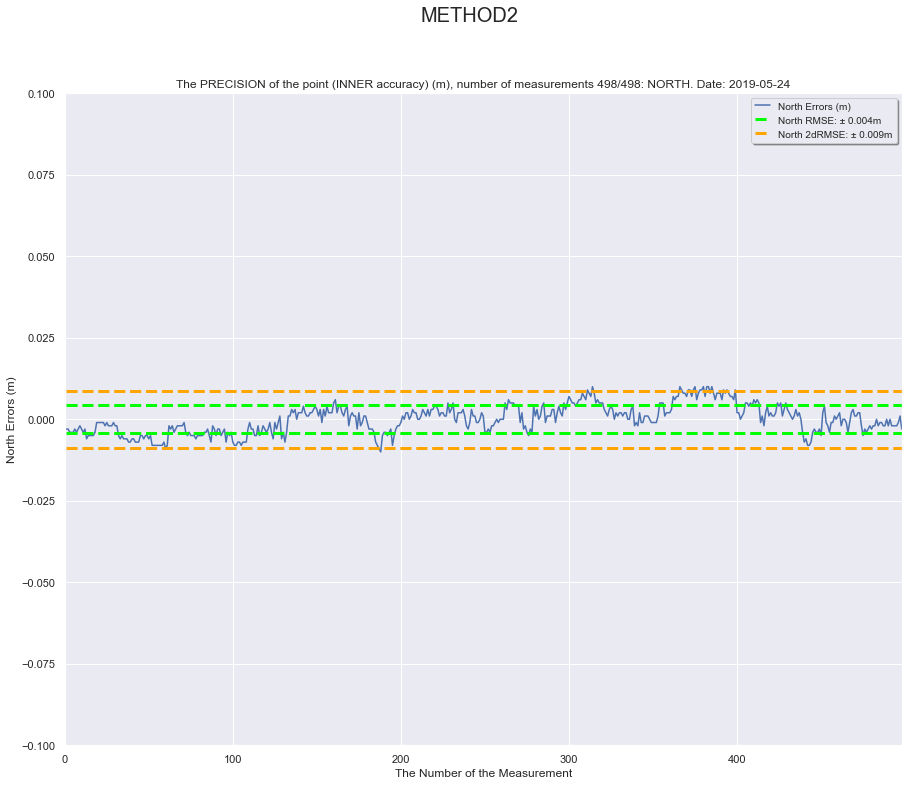

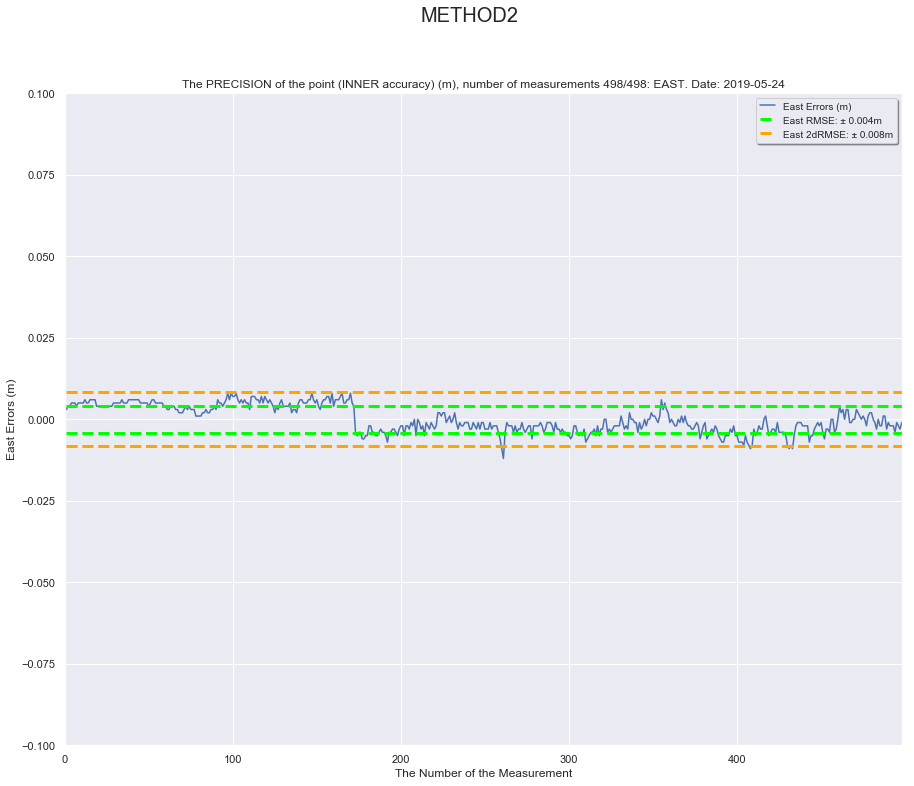

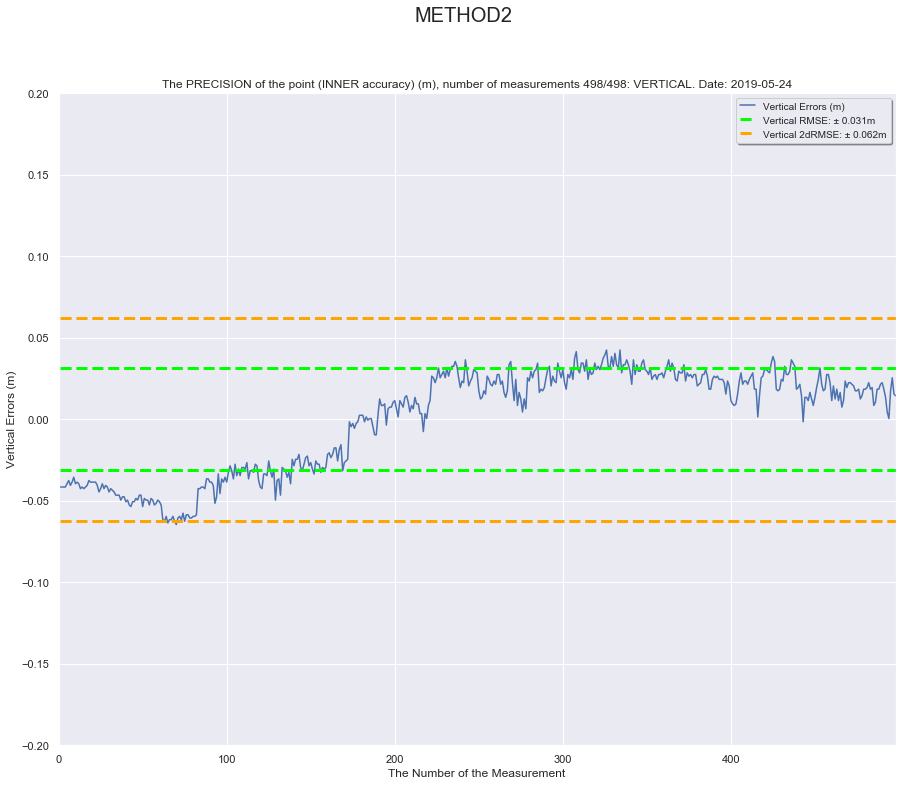

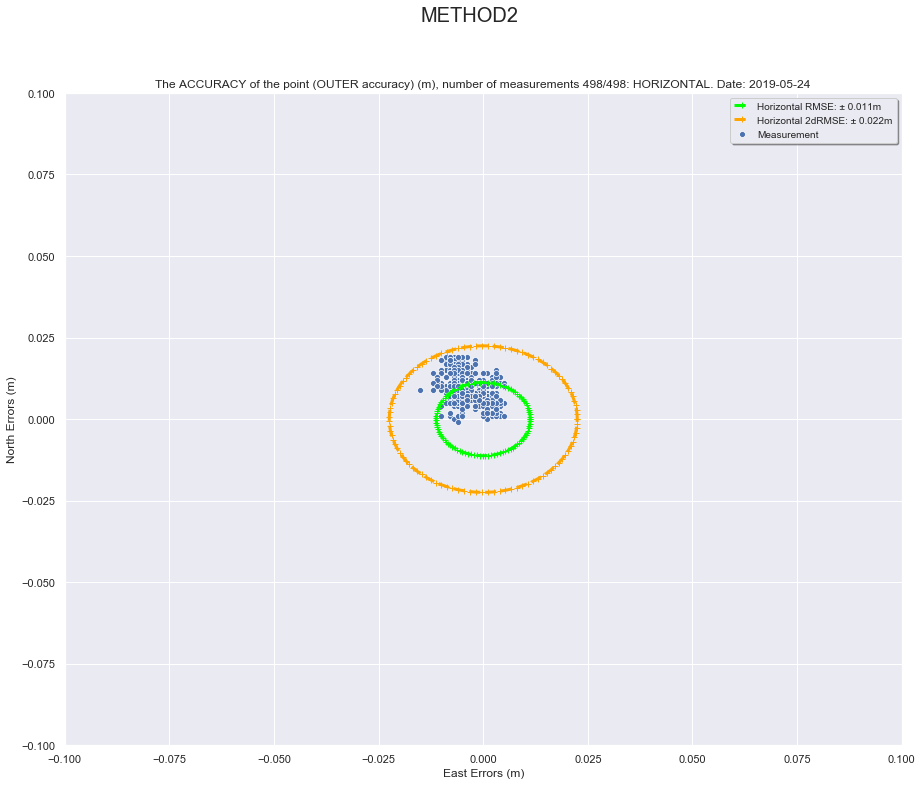

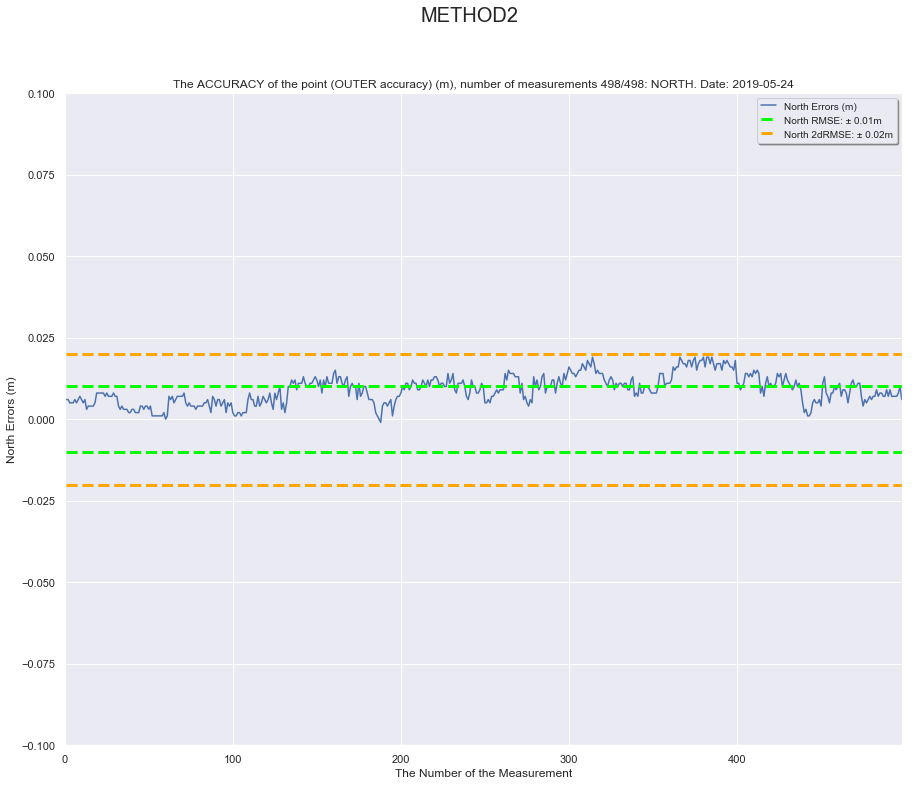

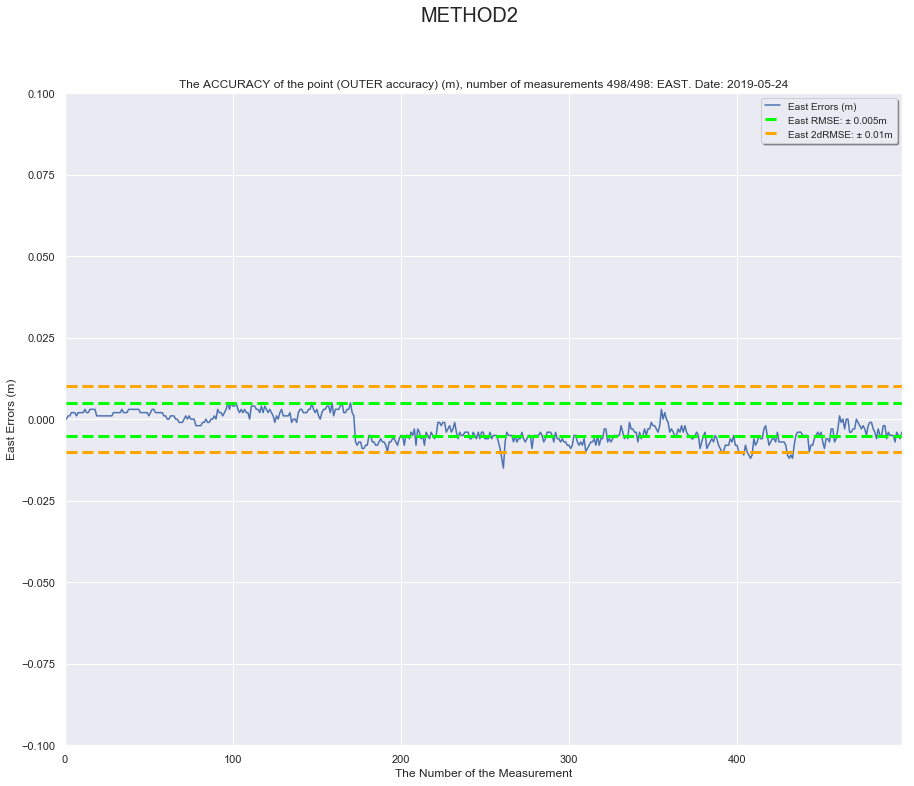

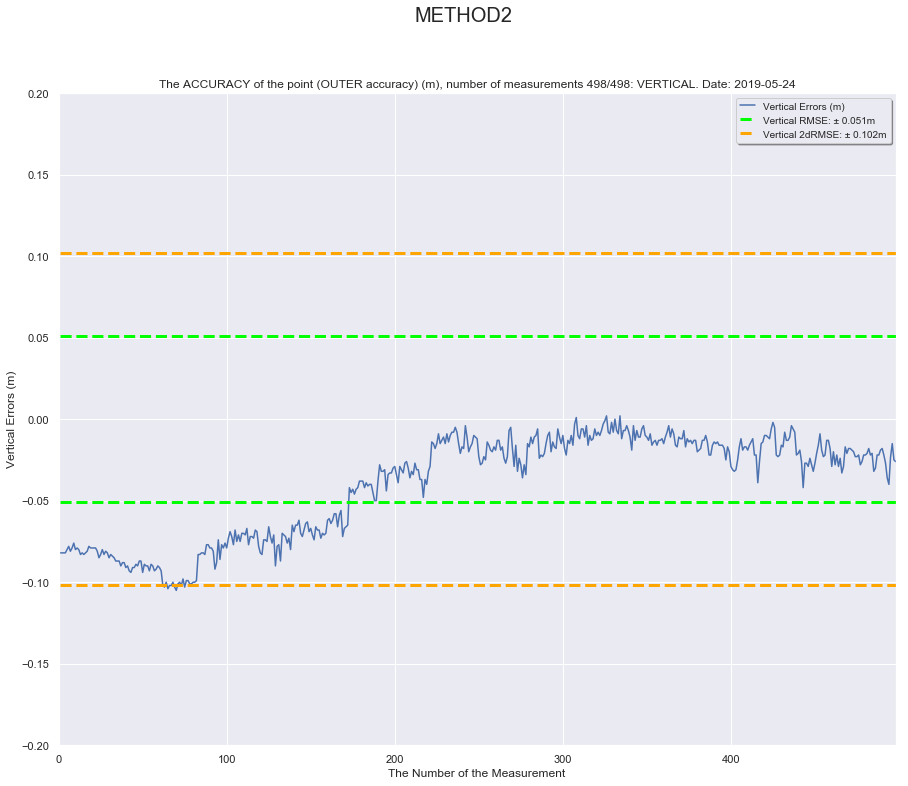

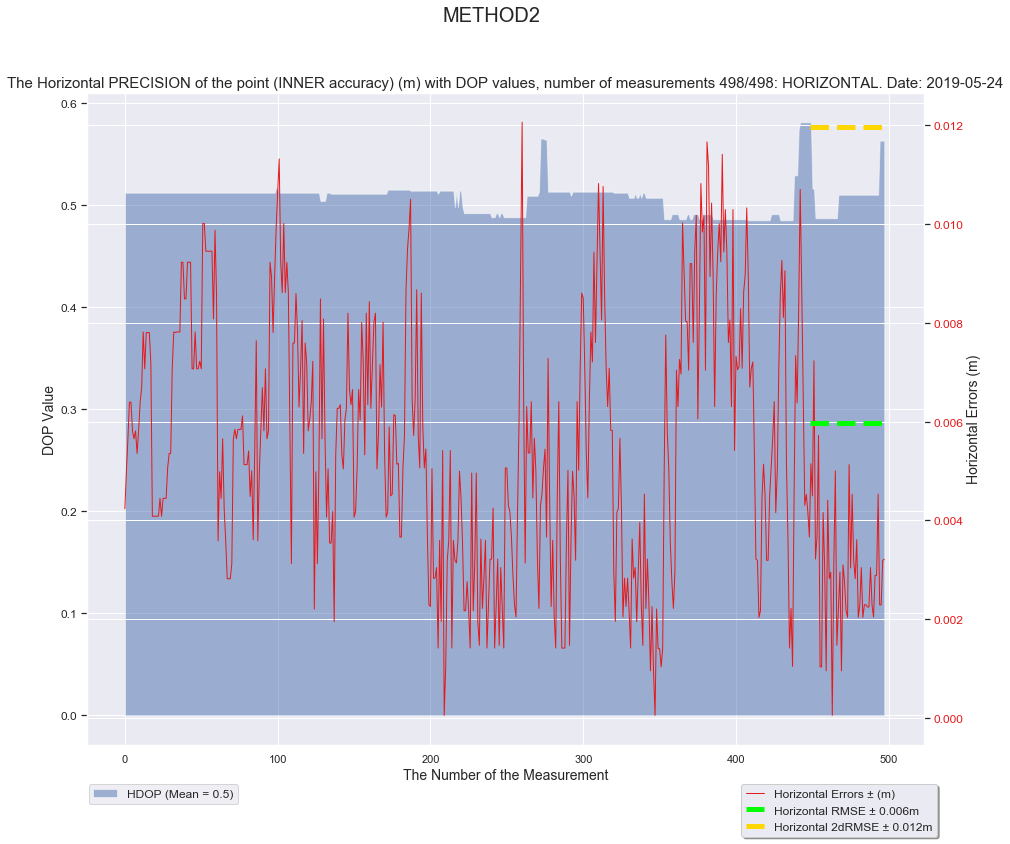

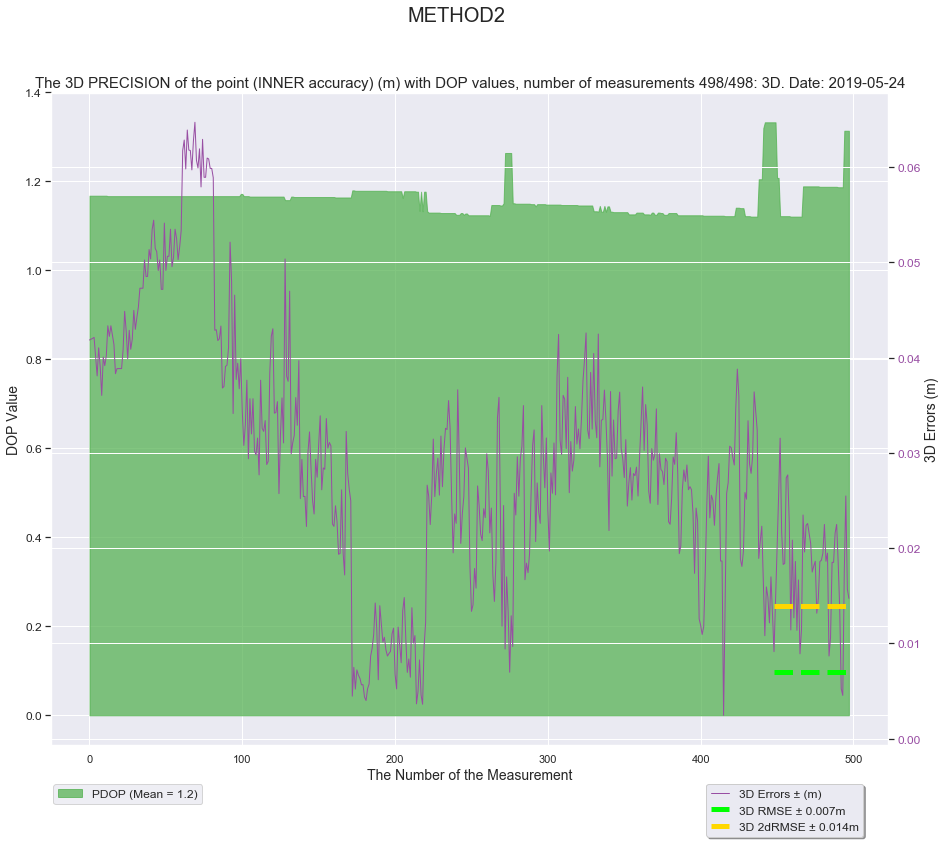

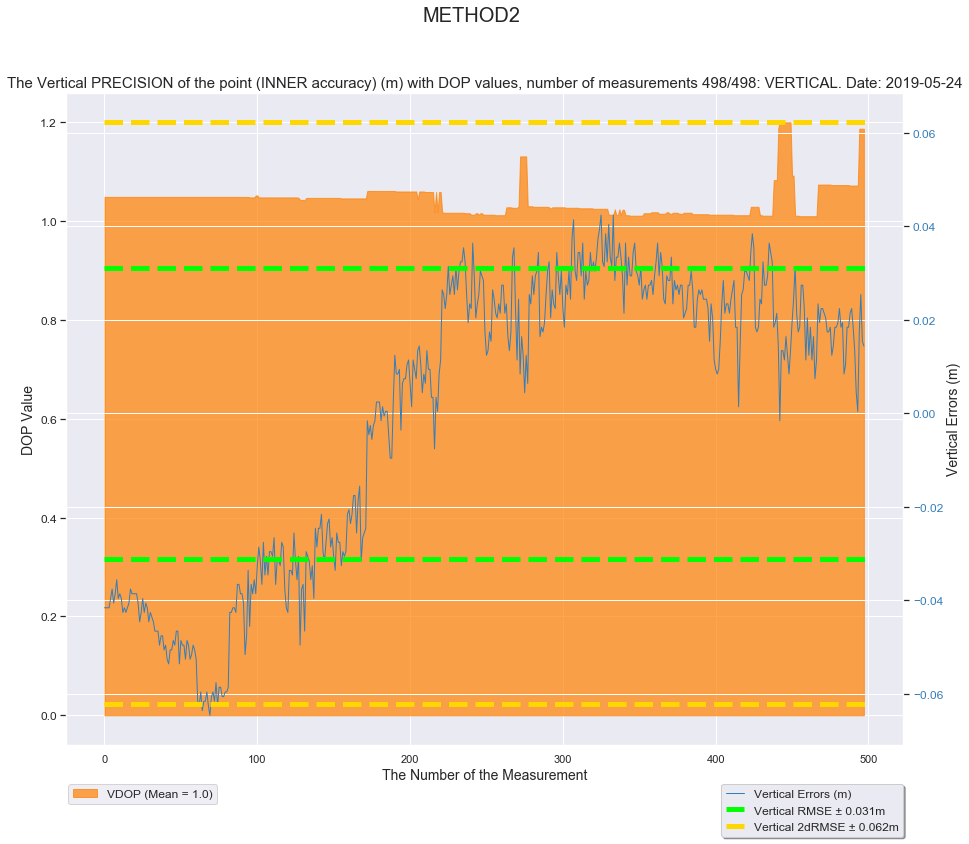

C:\Omat\Jupyter_Notebook\Example Project\90M9180\Conclusions\METHOD2\20190524-A-90M9180-METHOD2-1\20190524-A-90M9180-METHOD2-1_Measurement_Report.pdf created


**This program took 13.15s to finish!**

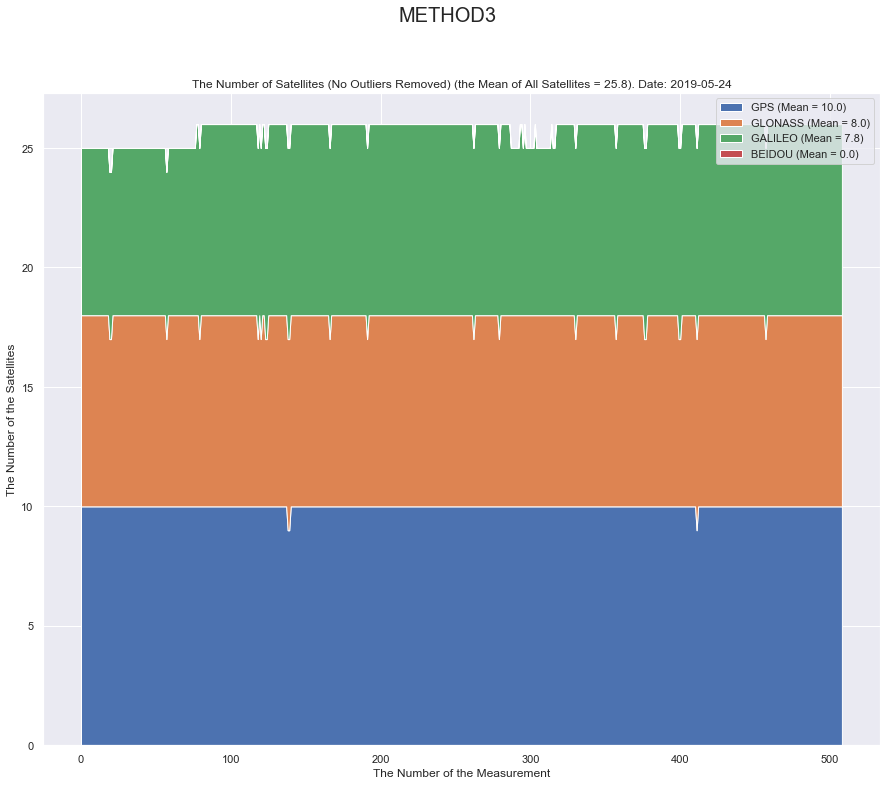

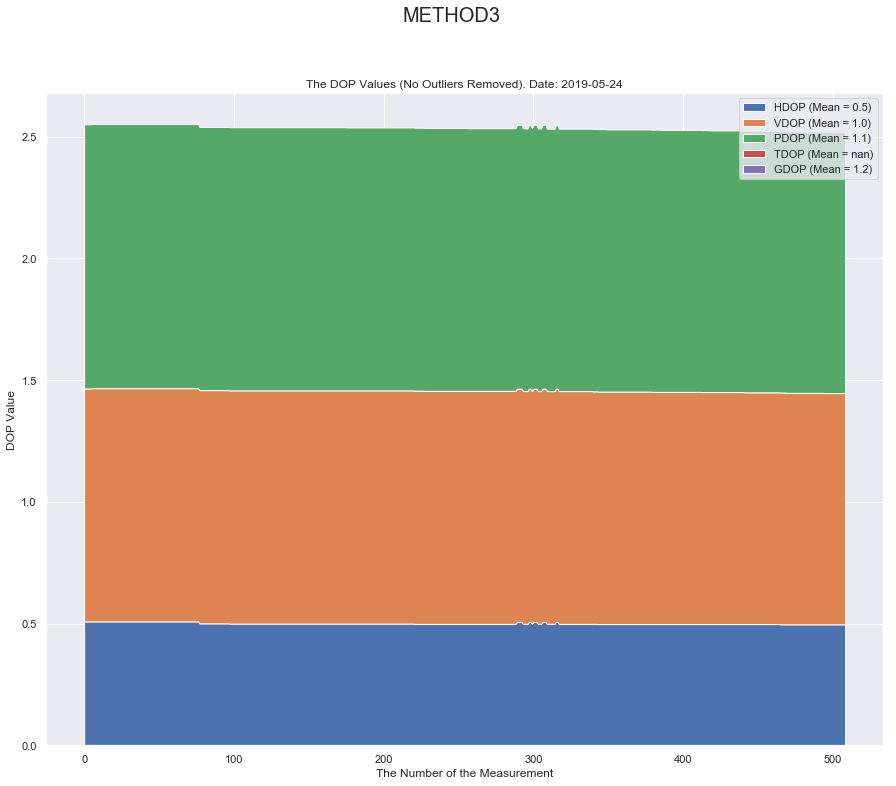

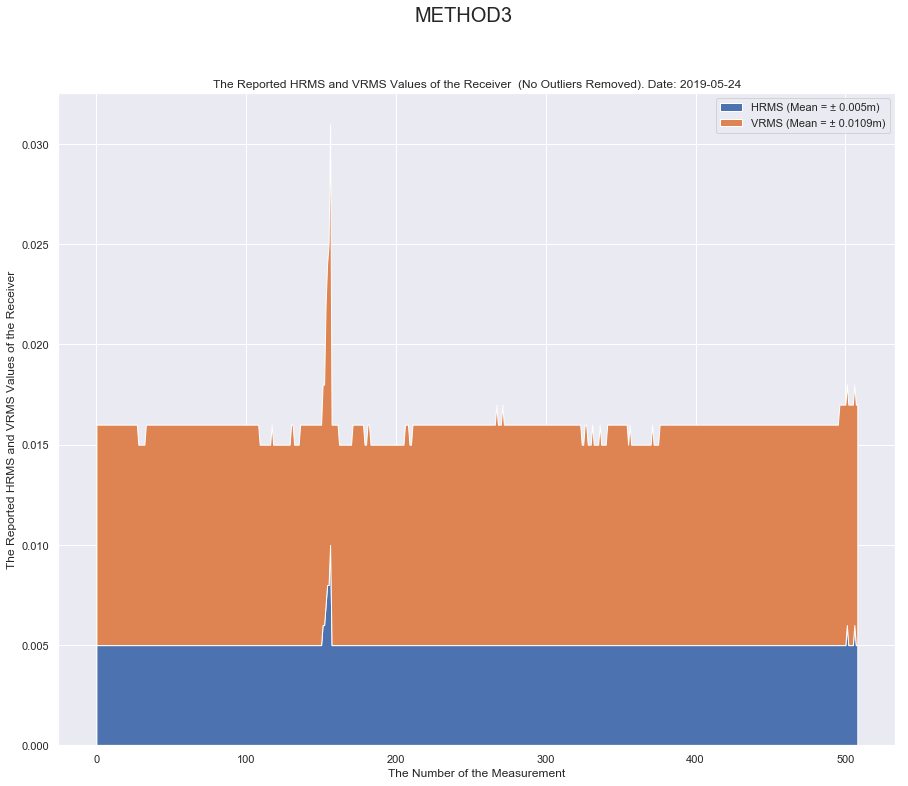

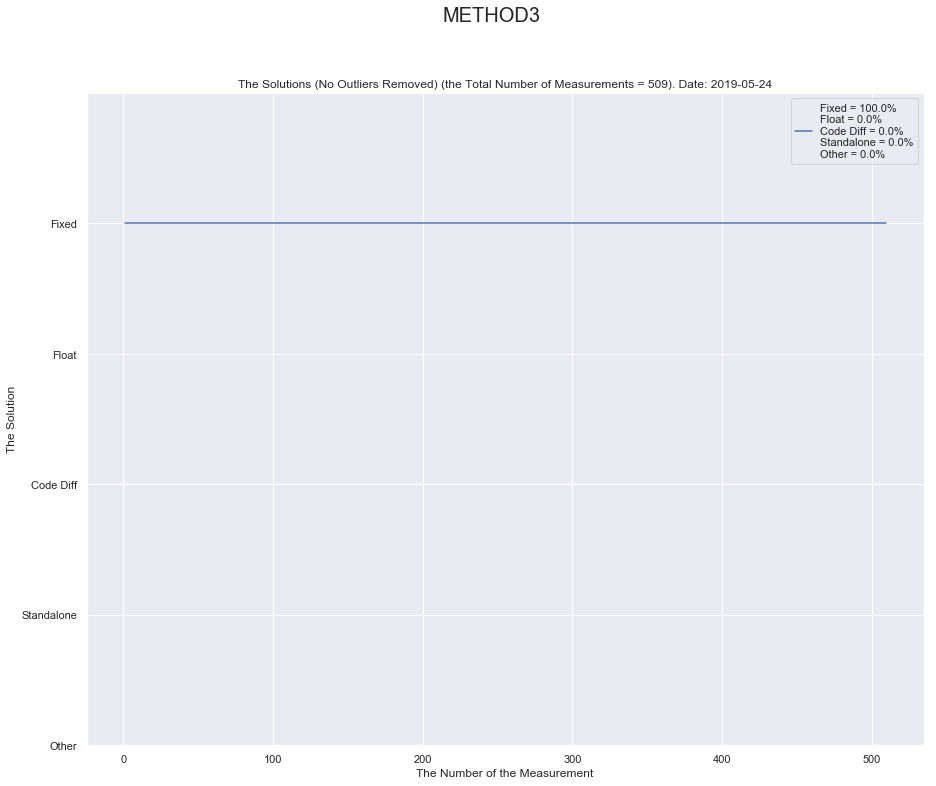

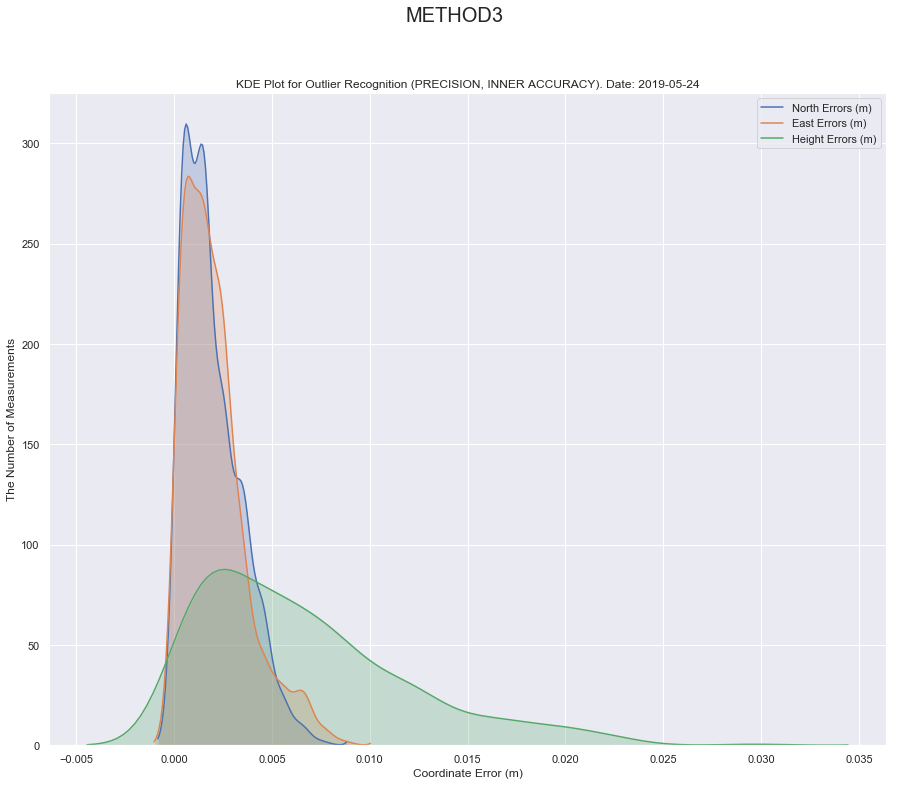

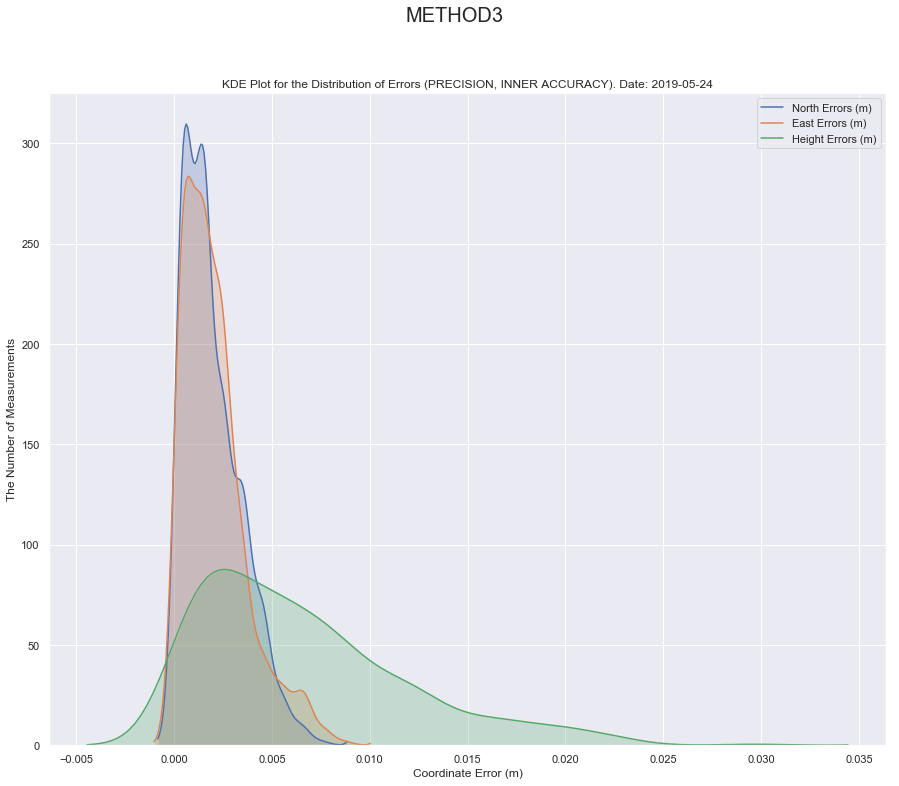

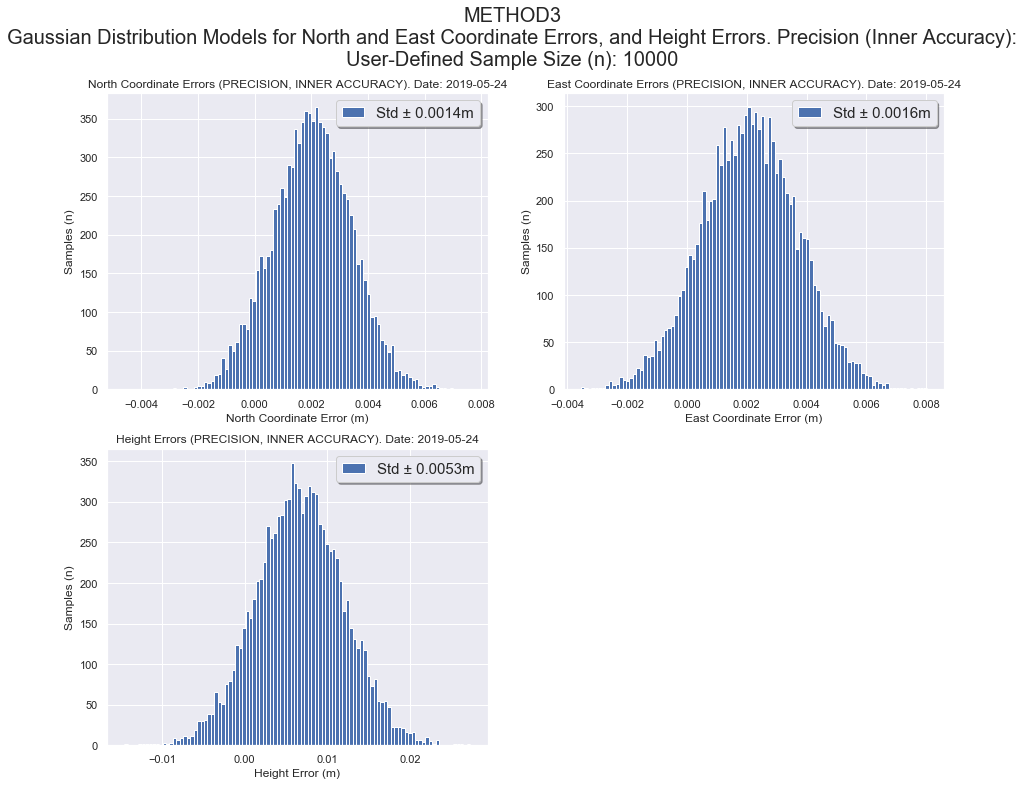

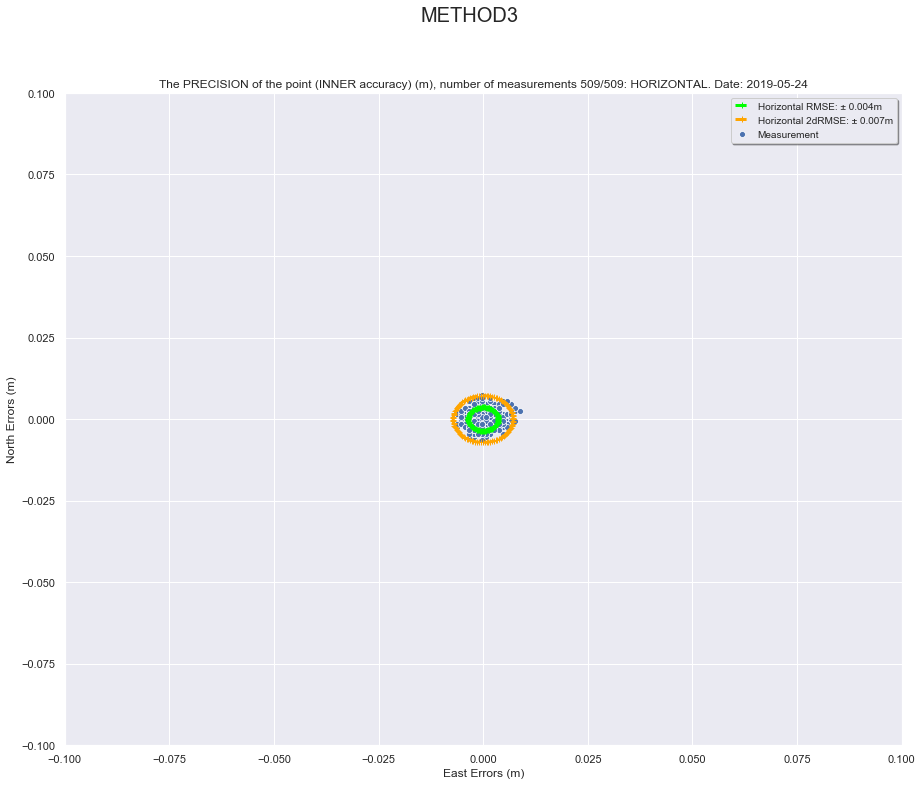

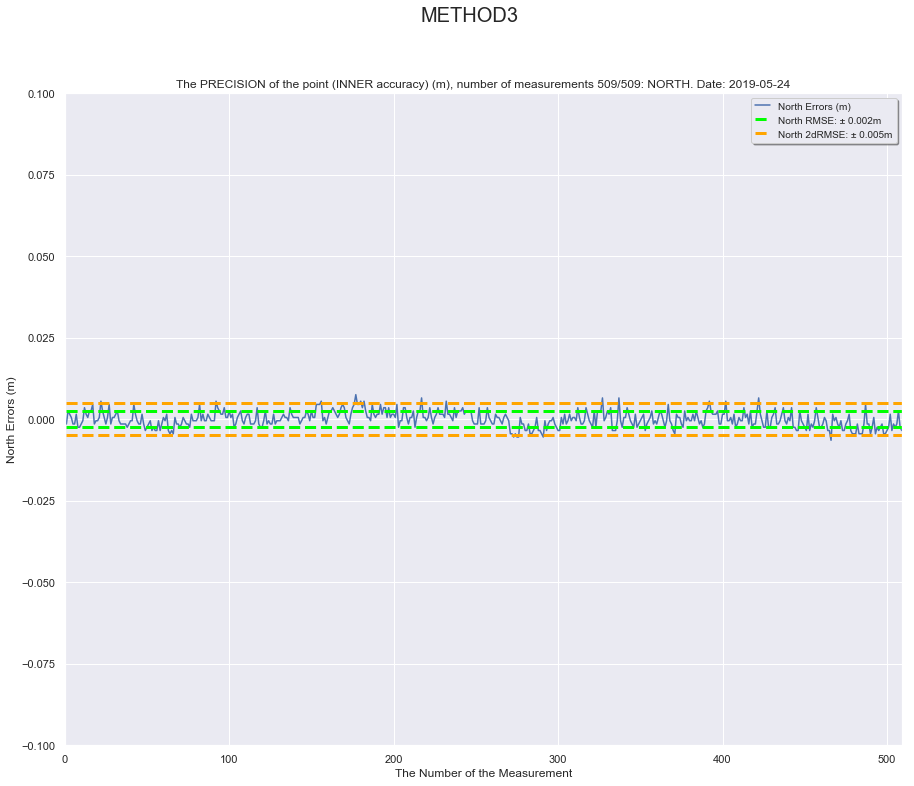

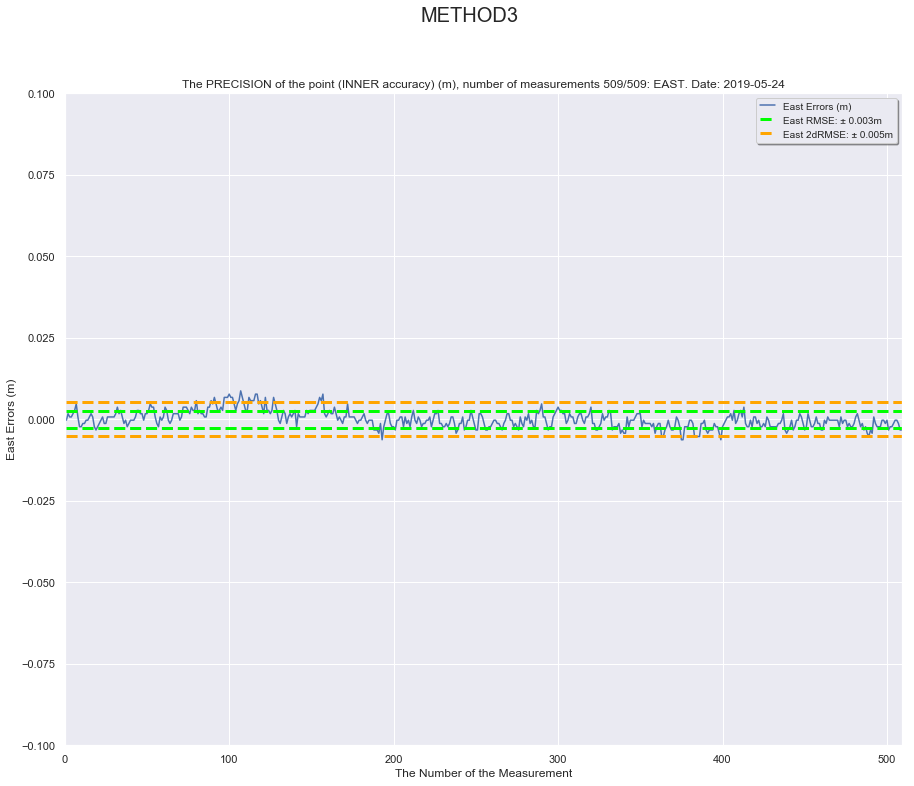

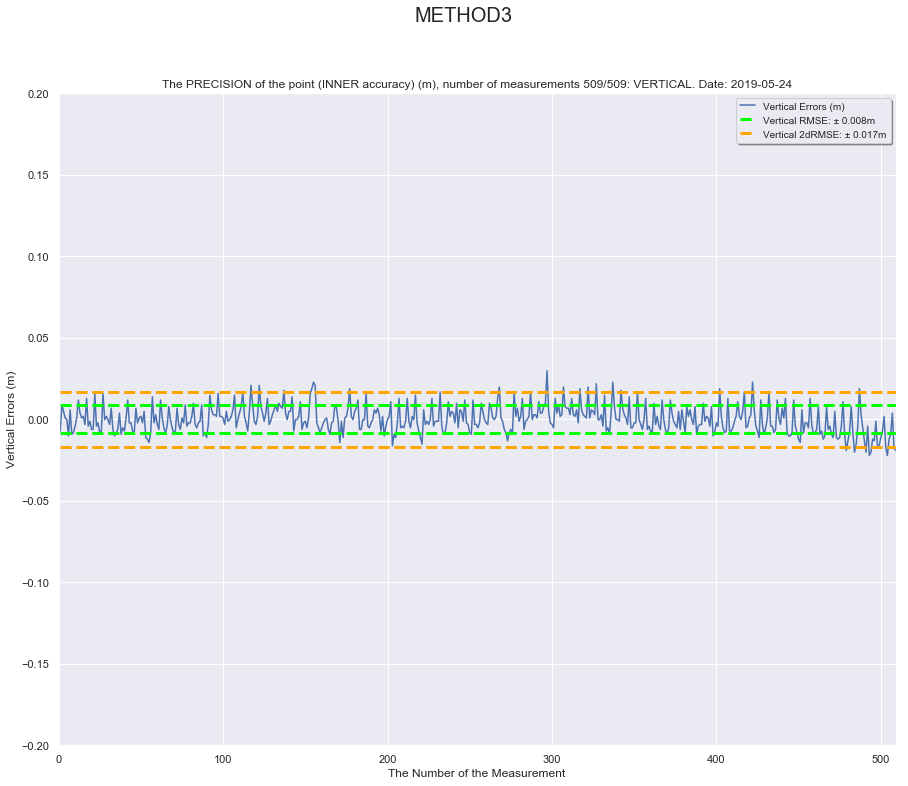

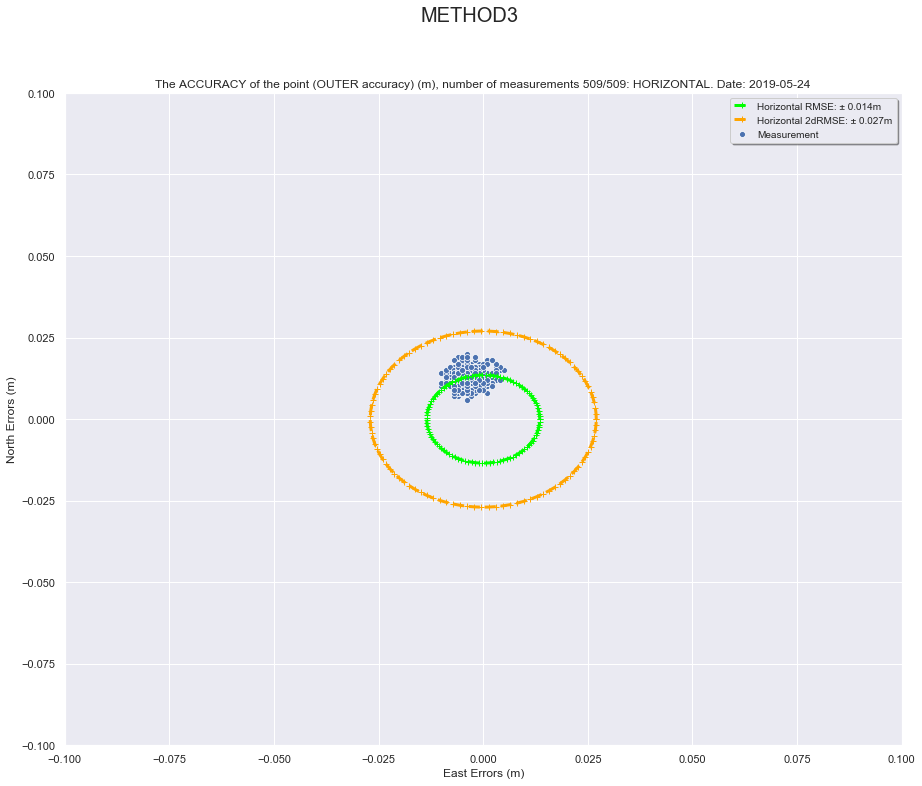

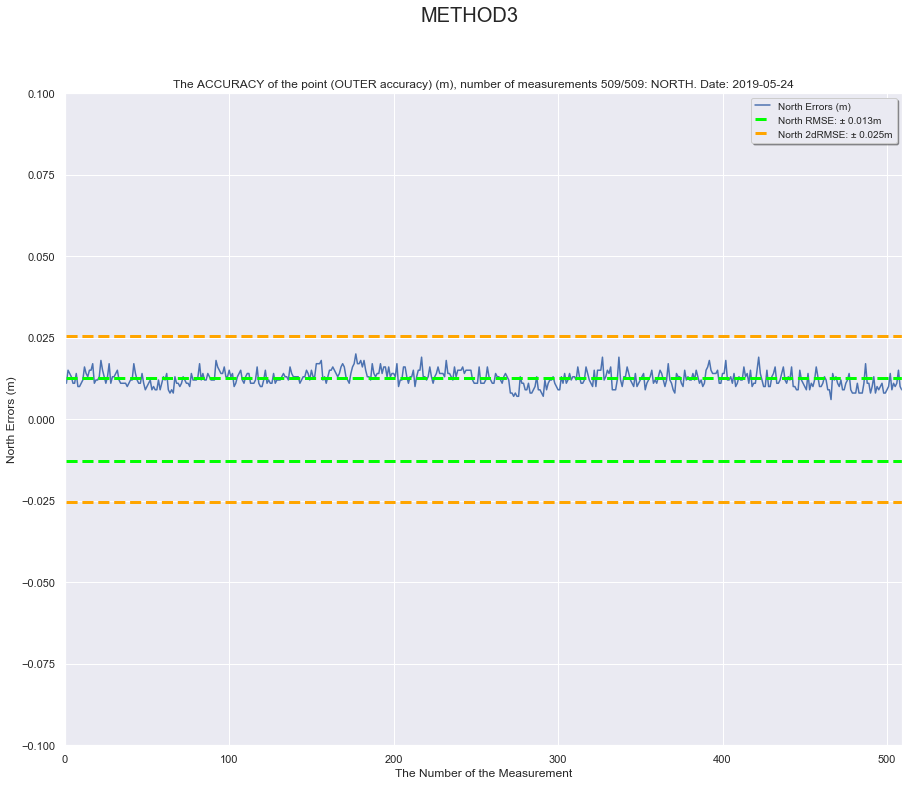

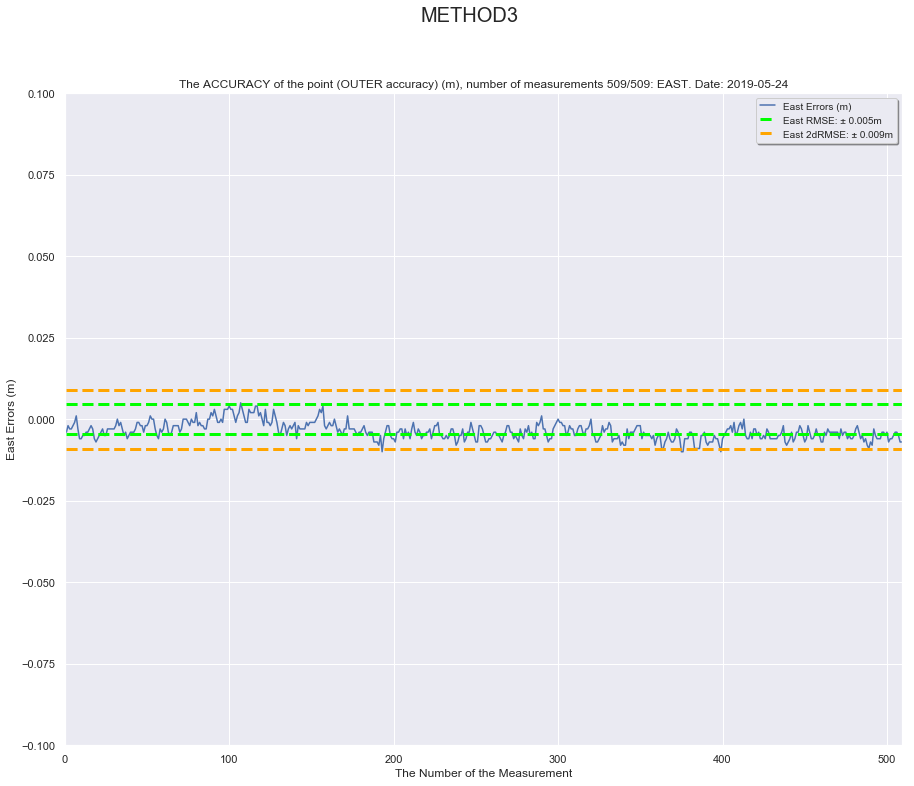

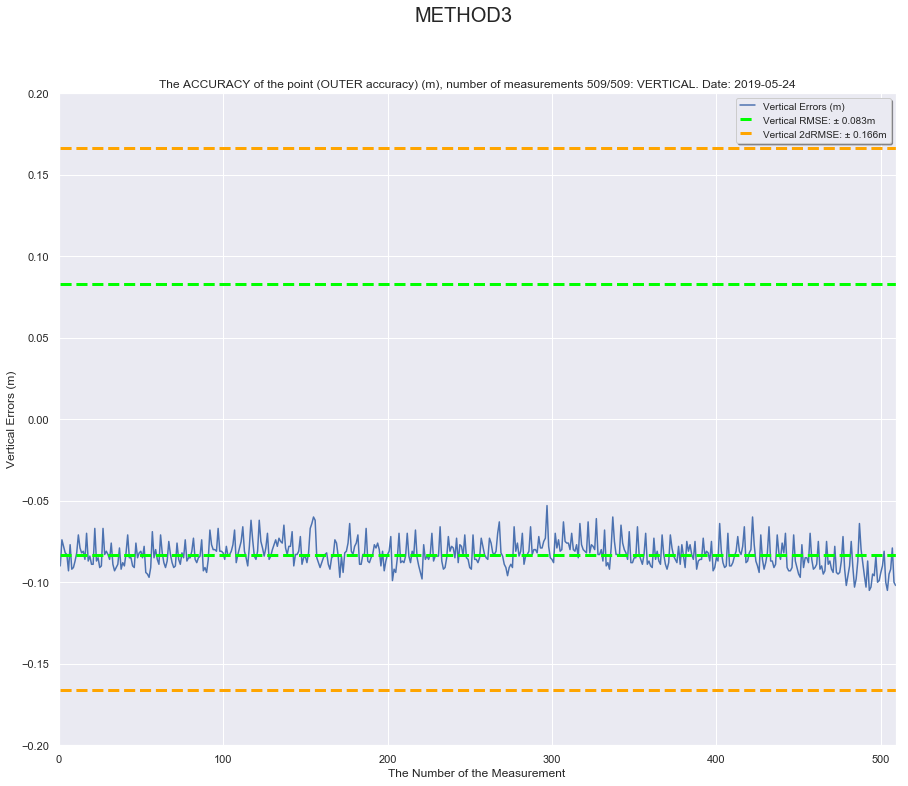

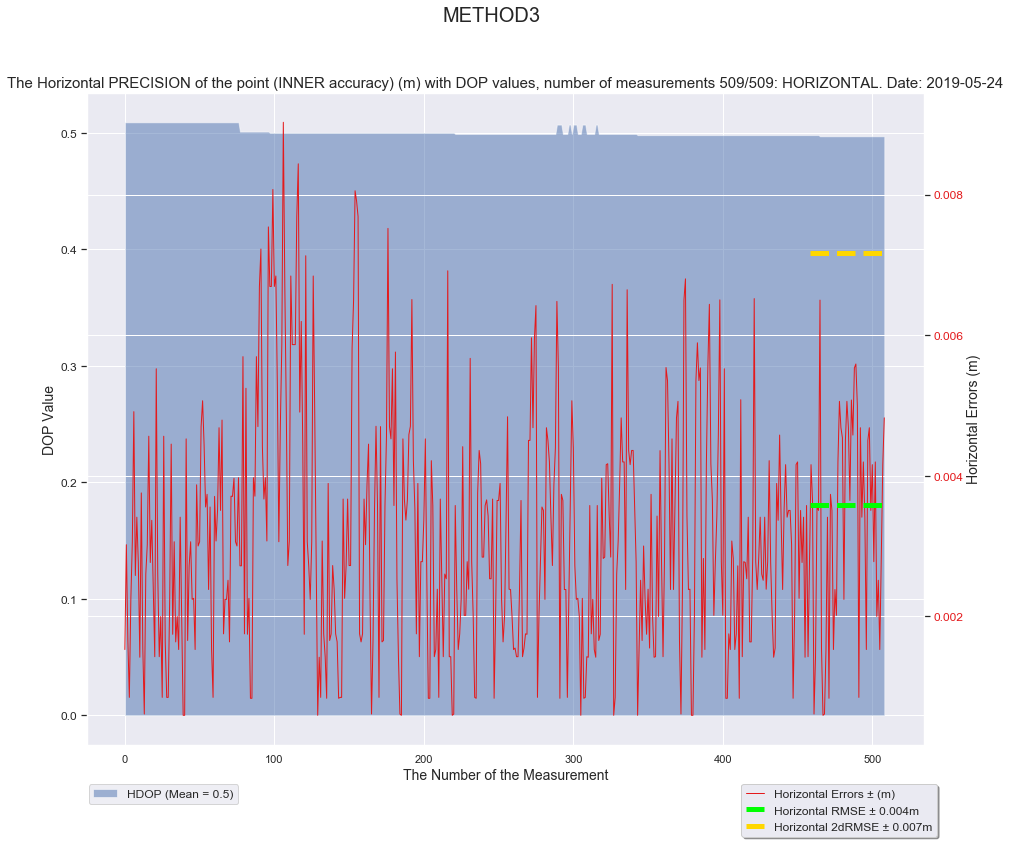

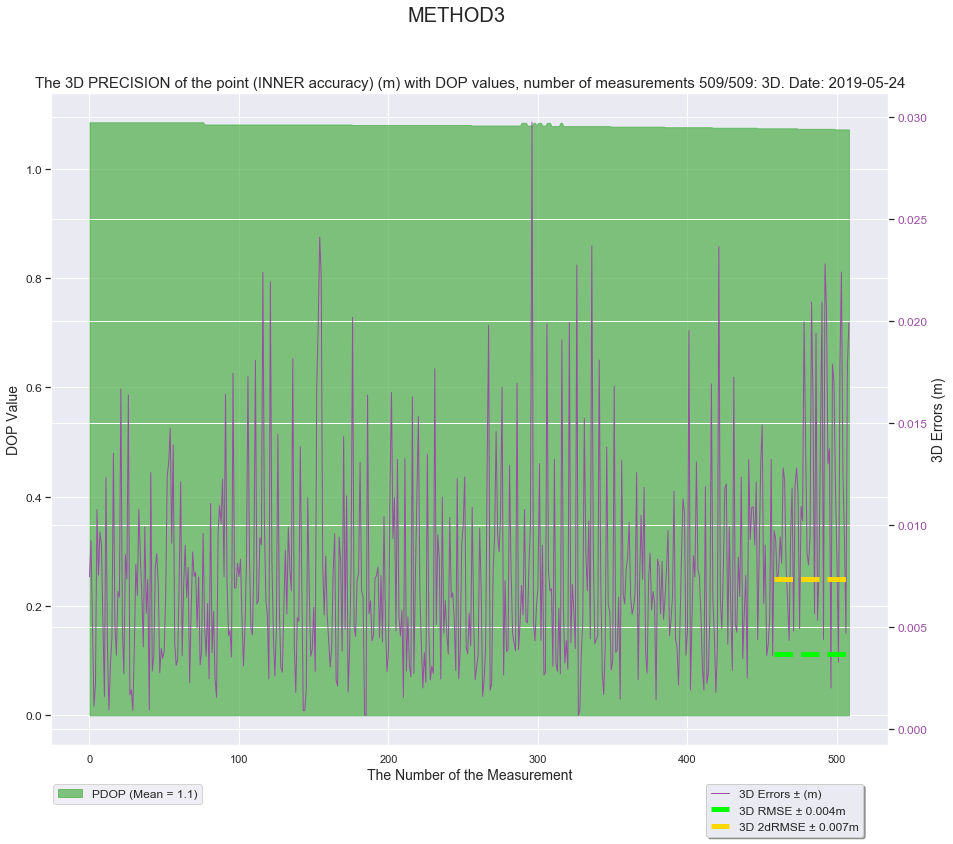

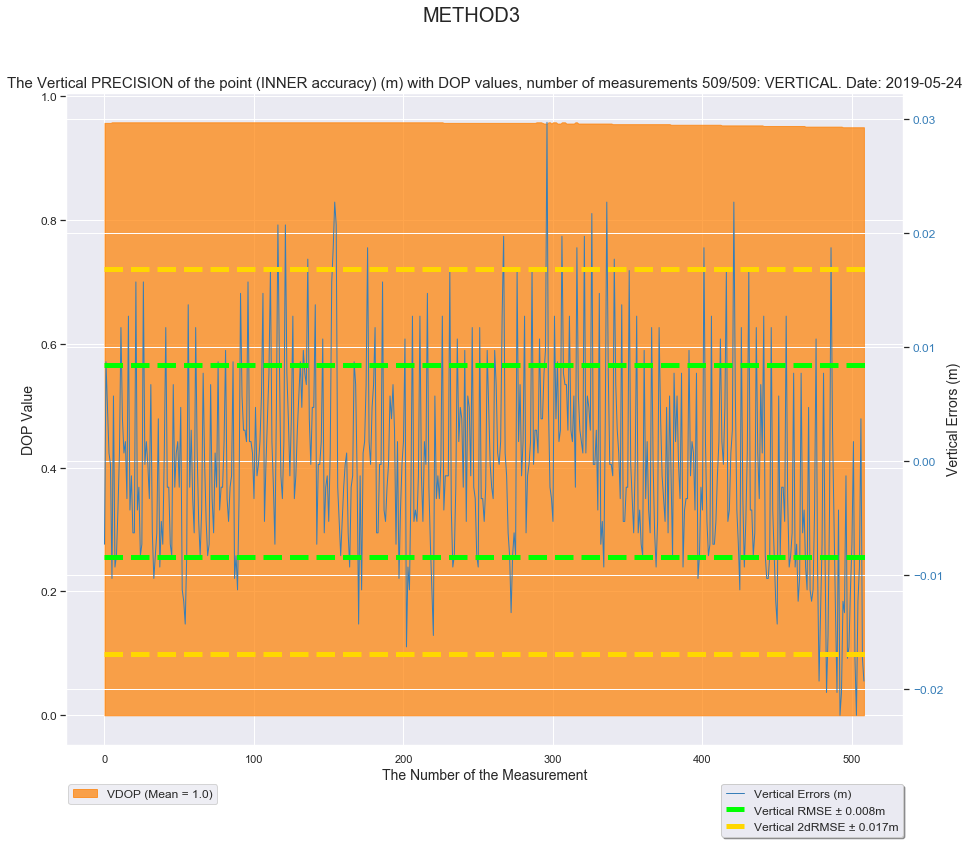

C:\Omat\Jupyter_Notebook\Example Project\90M9180\Conclusions\METHOD3\20190524-A-90M9180-METHOD3-1\20190524-A-90M9180-METHOD3-1_Measurement_Report.pdf created


**This program took 16.85s to finish!**

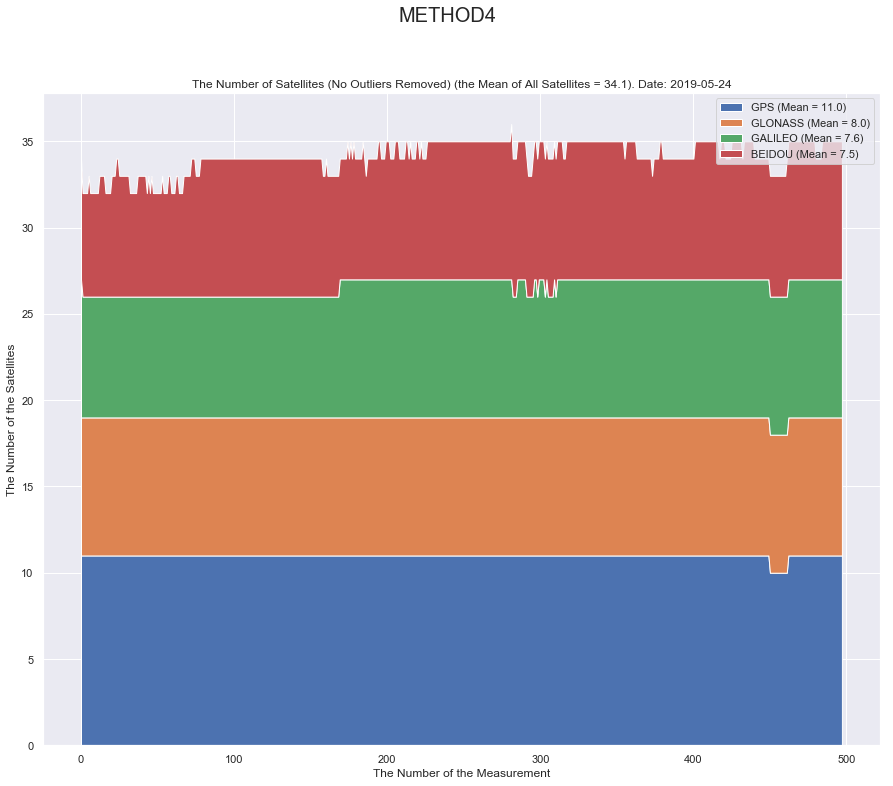

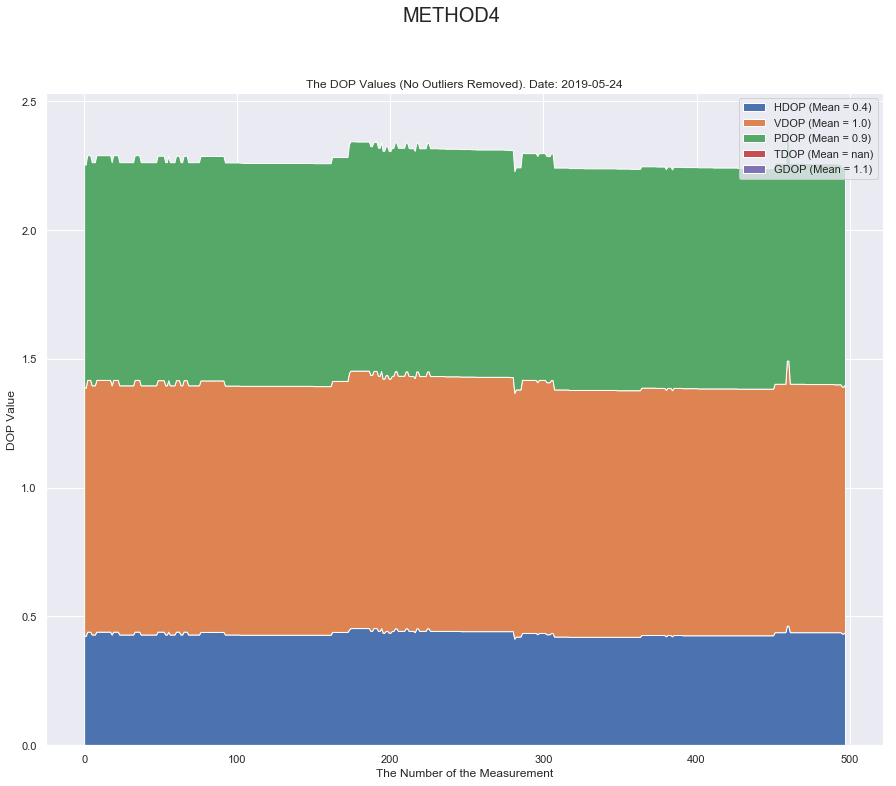

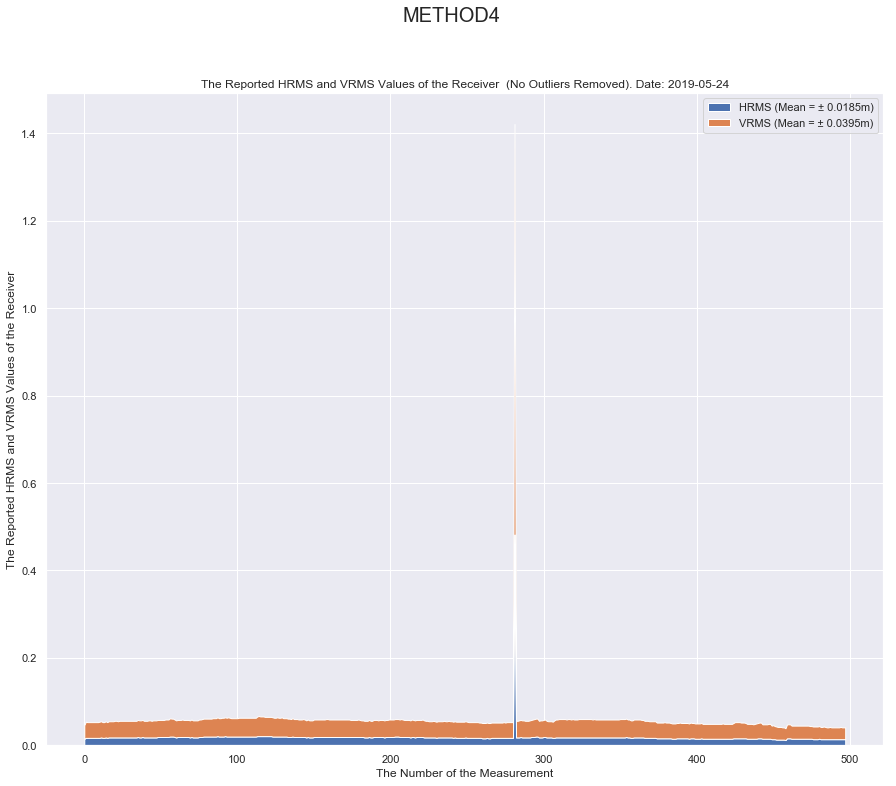

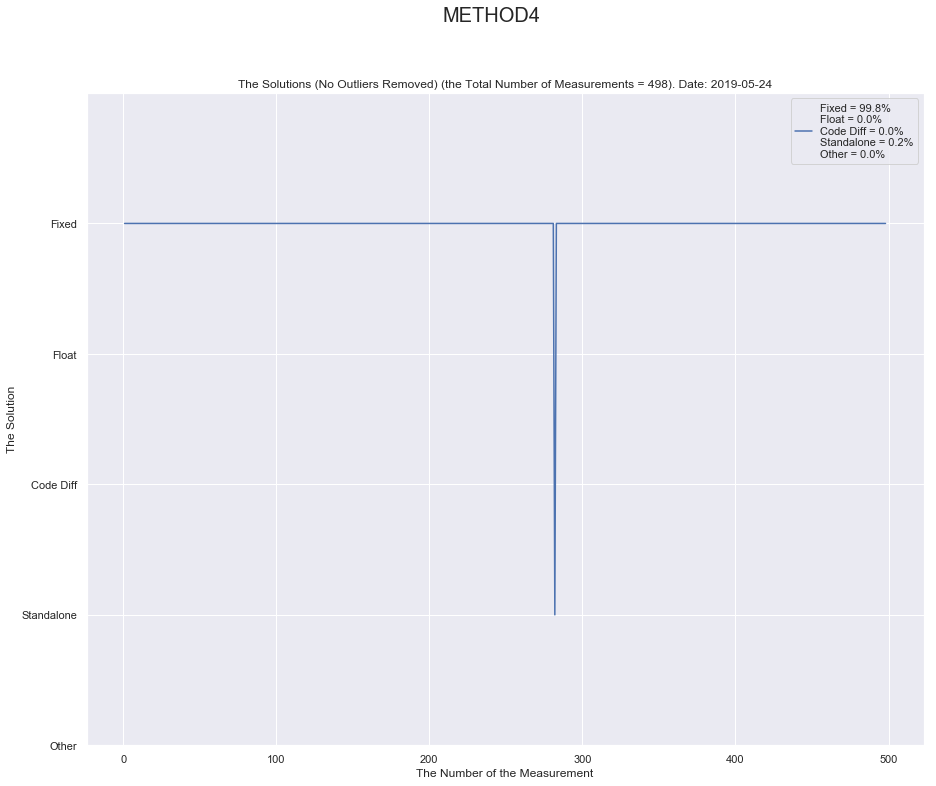

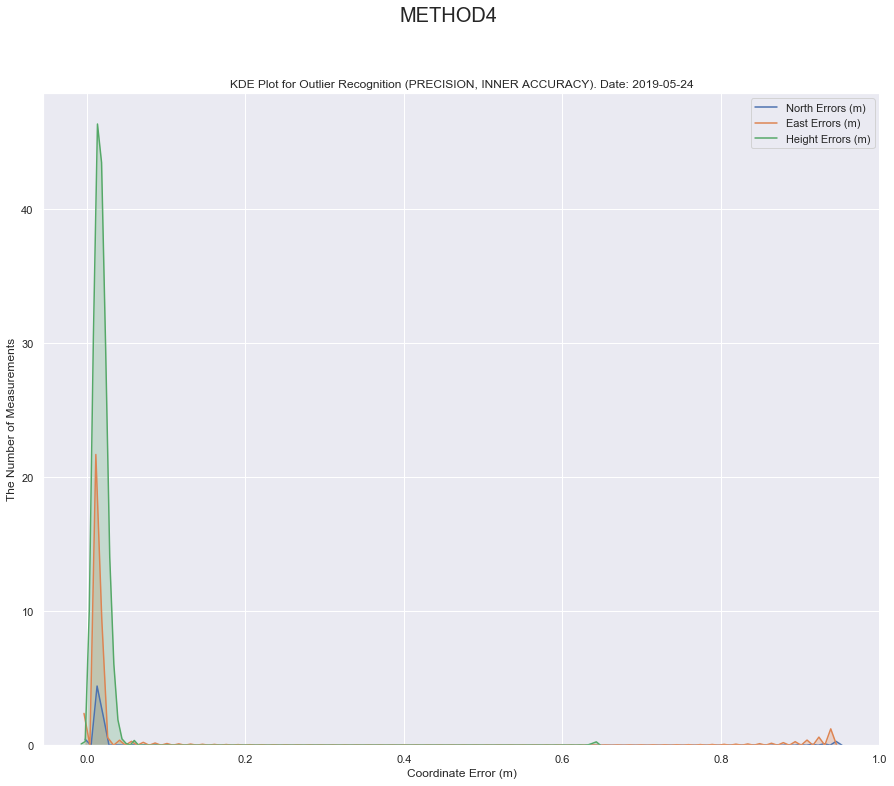

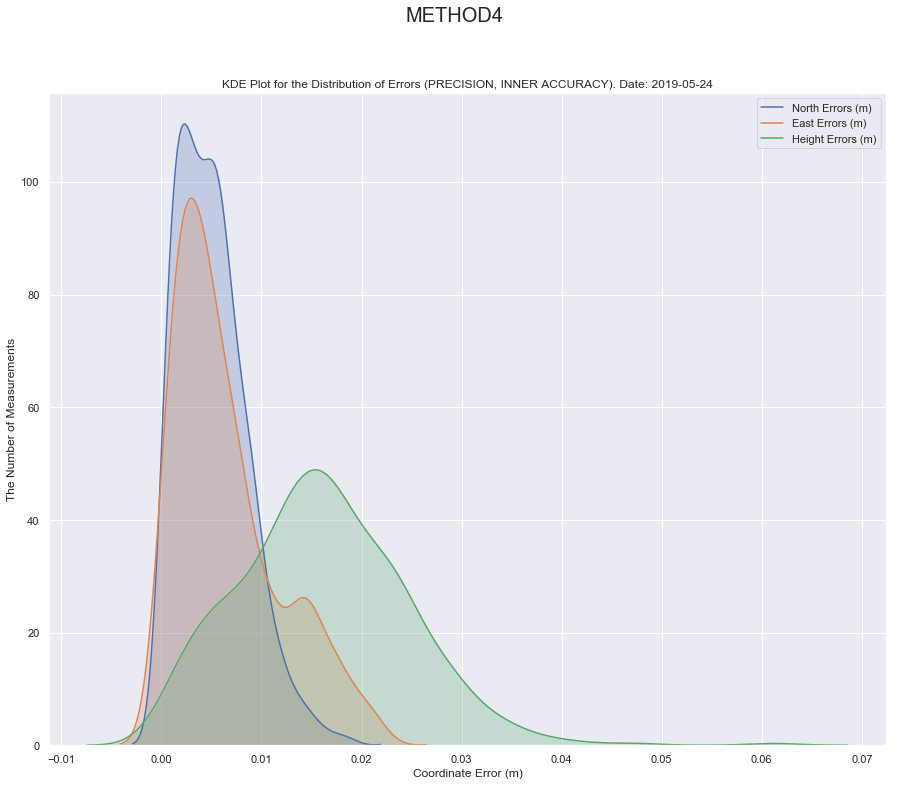

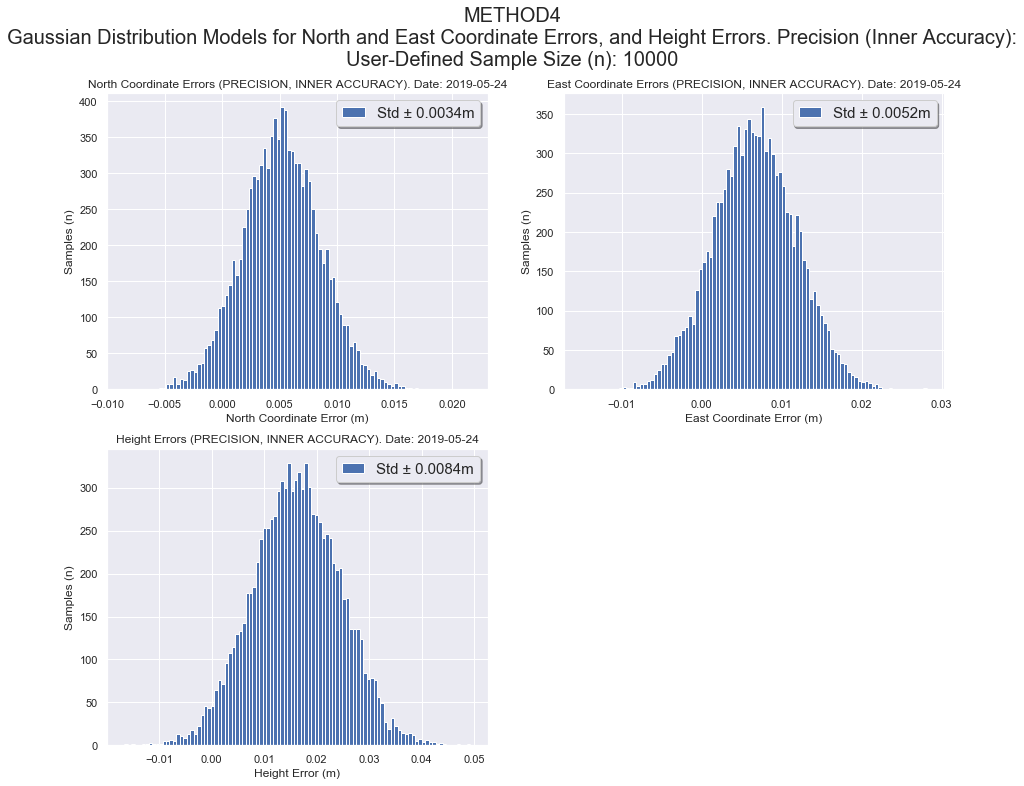

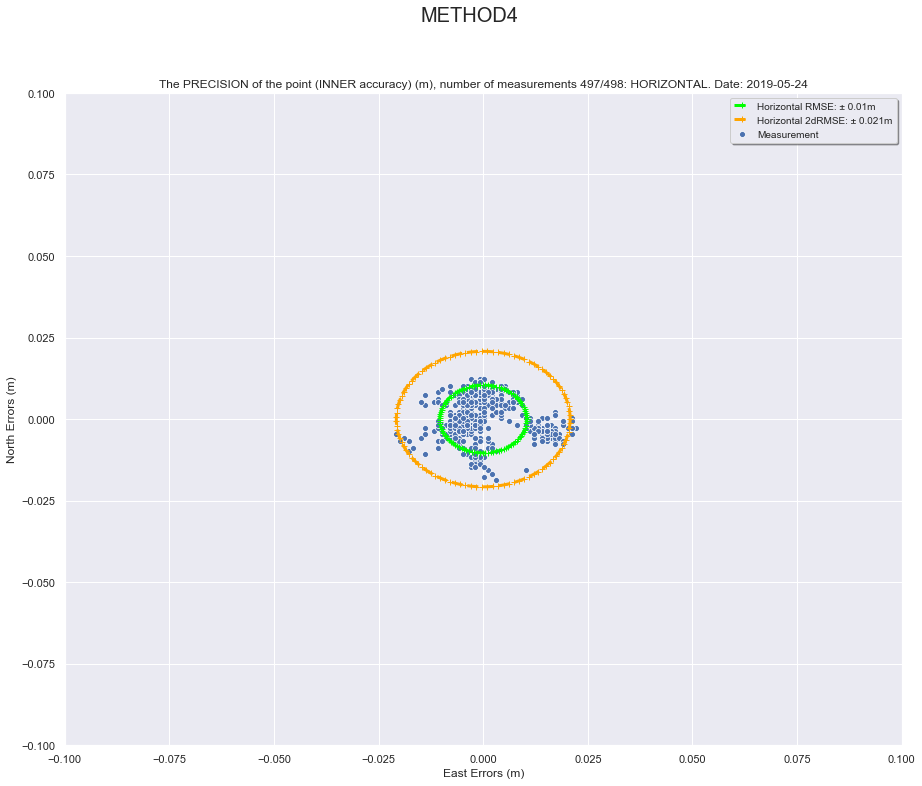

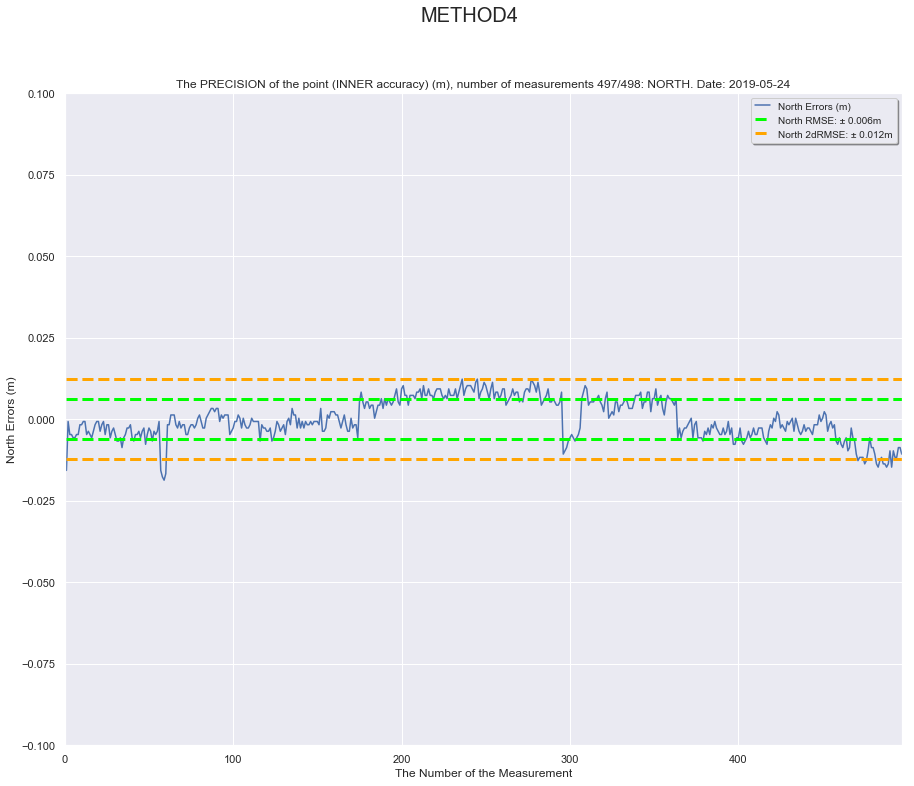

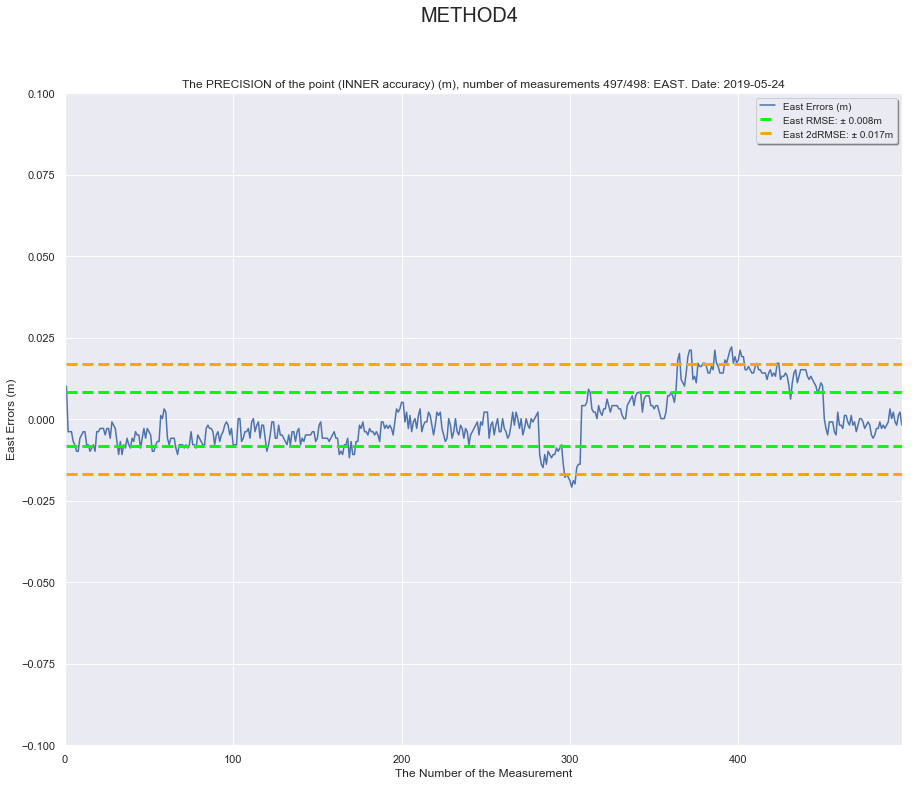

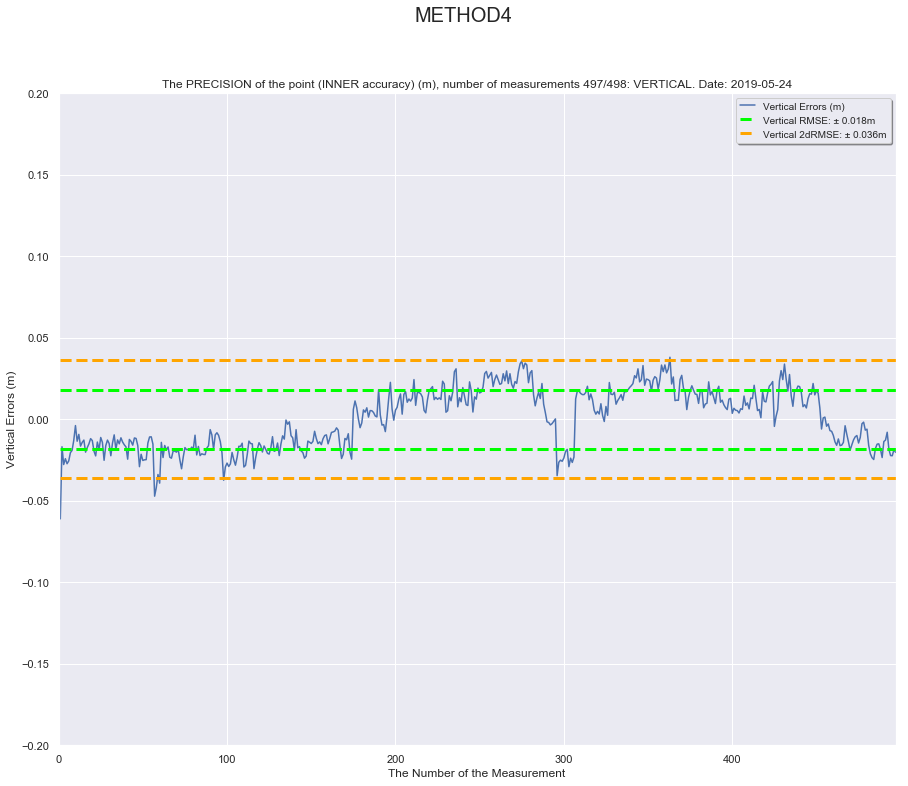

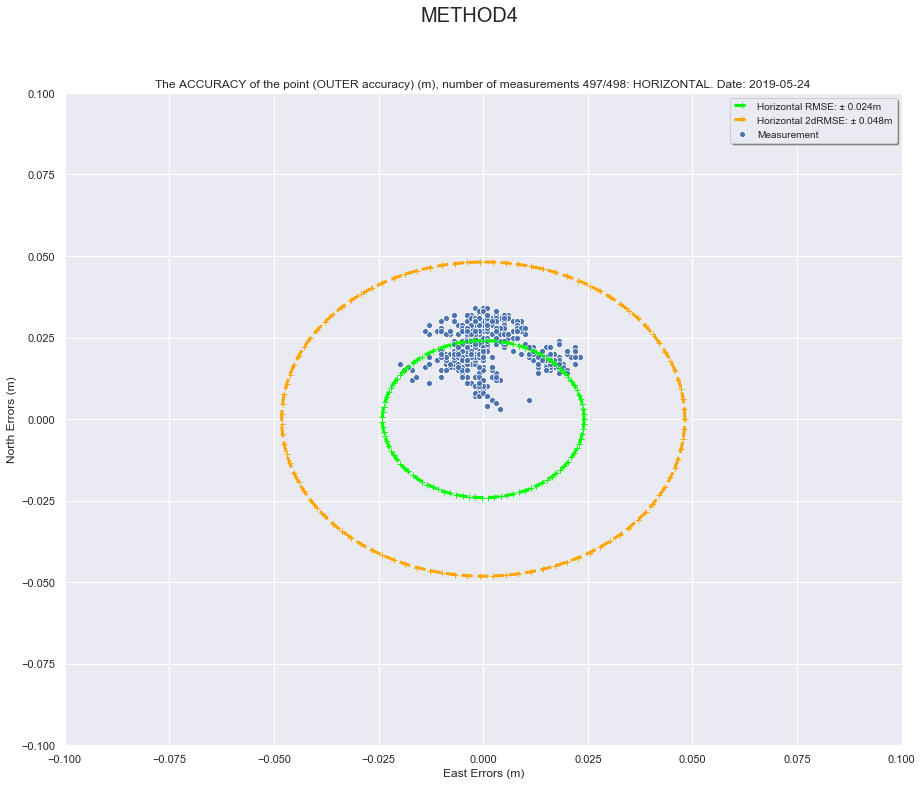

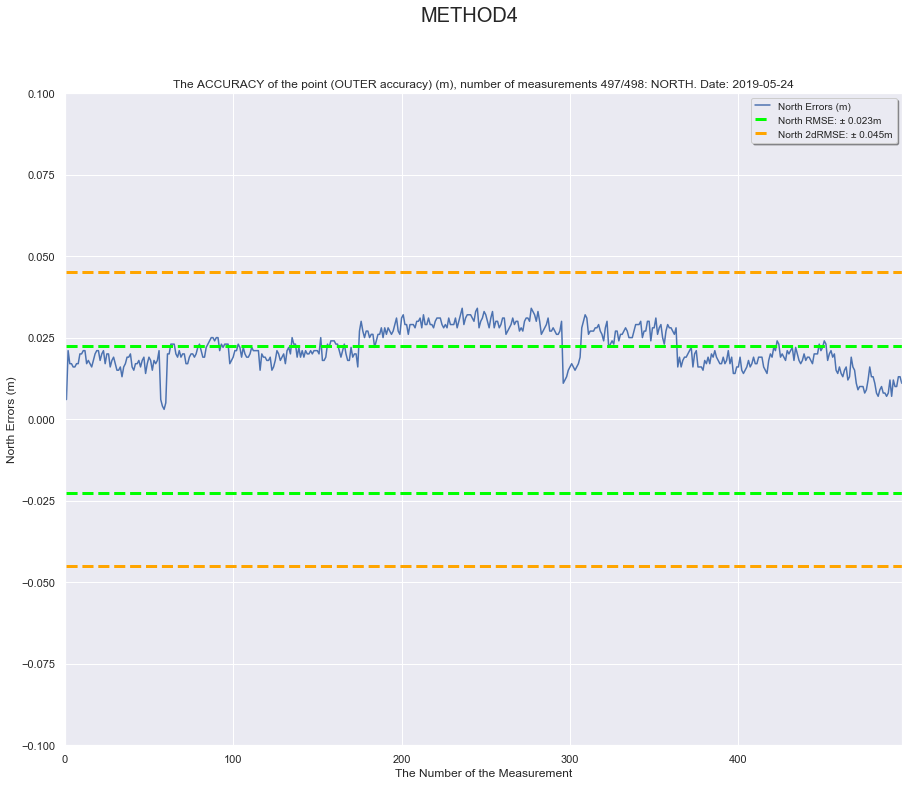

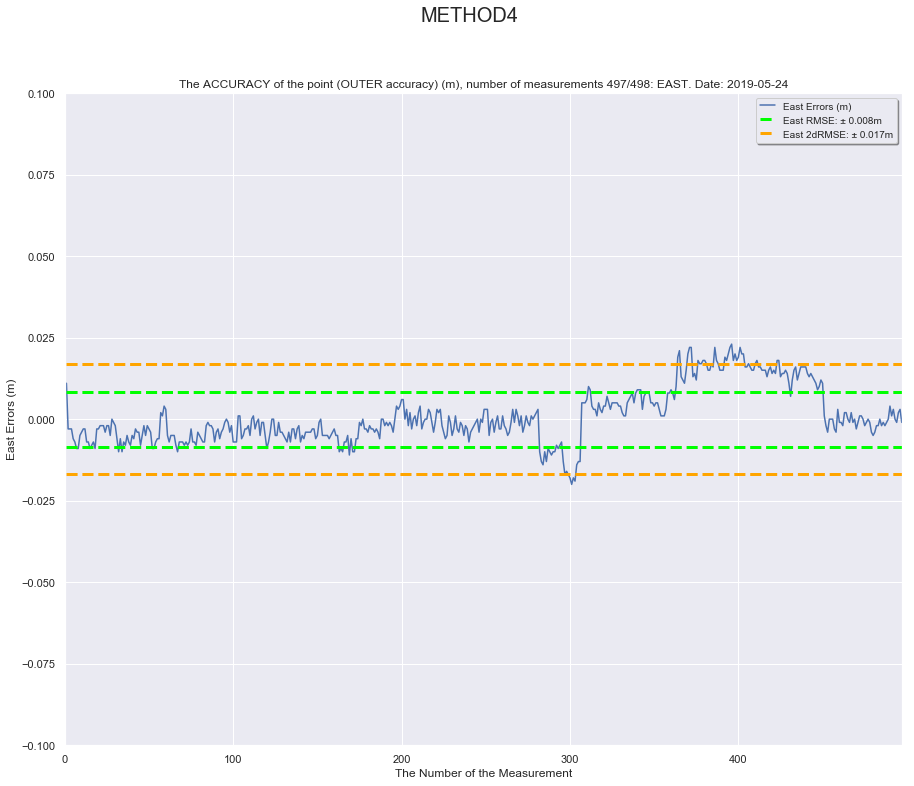

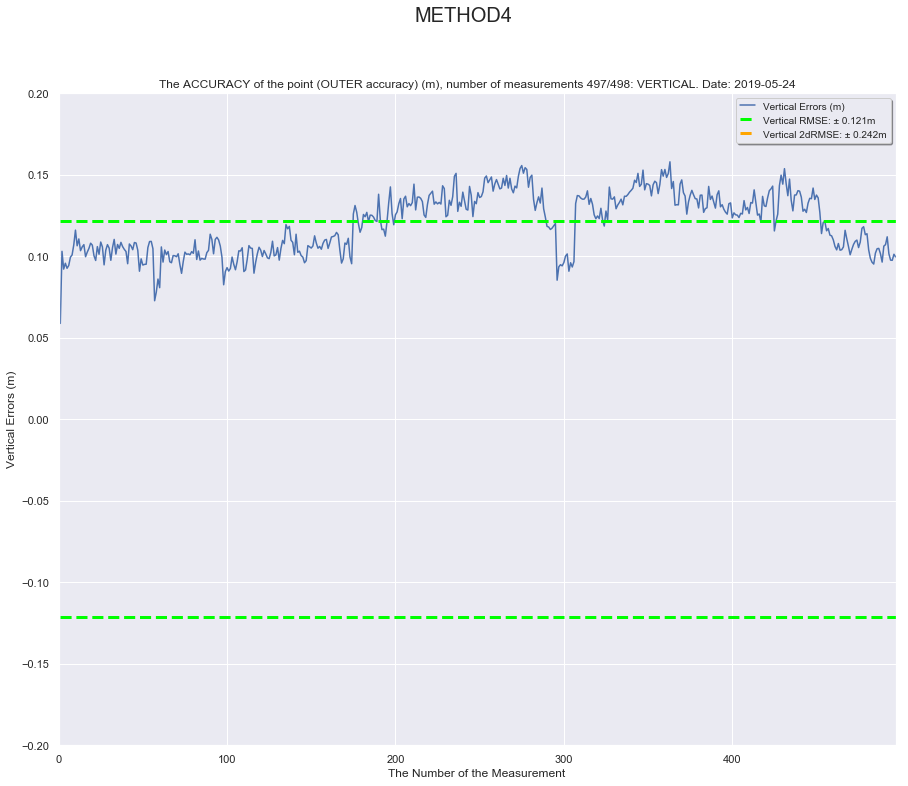

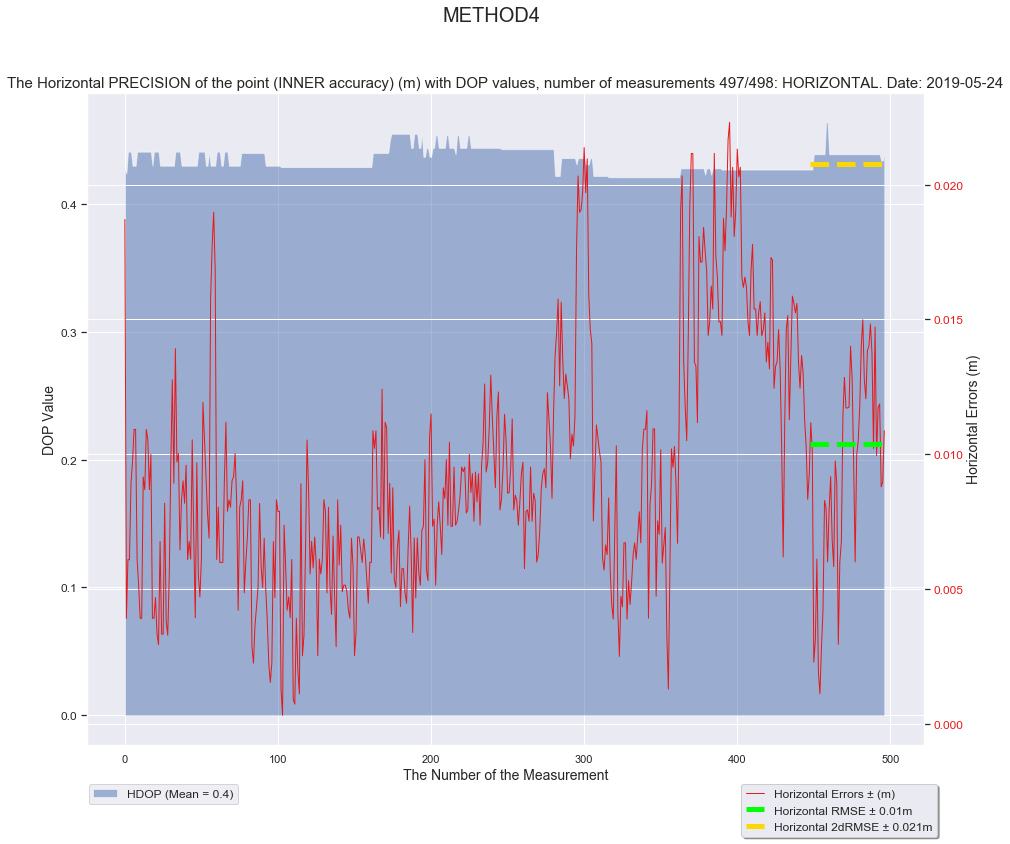

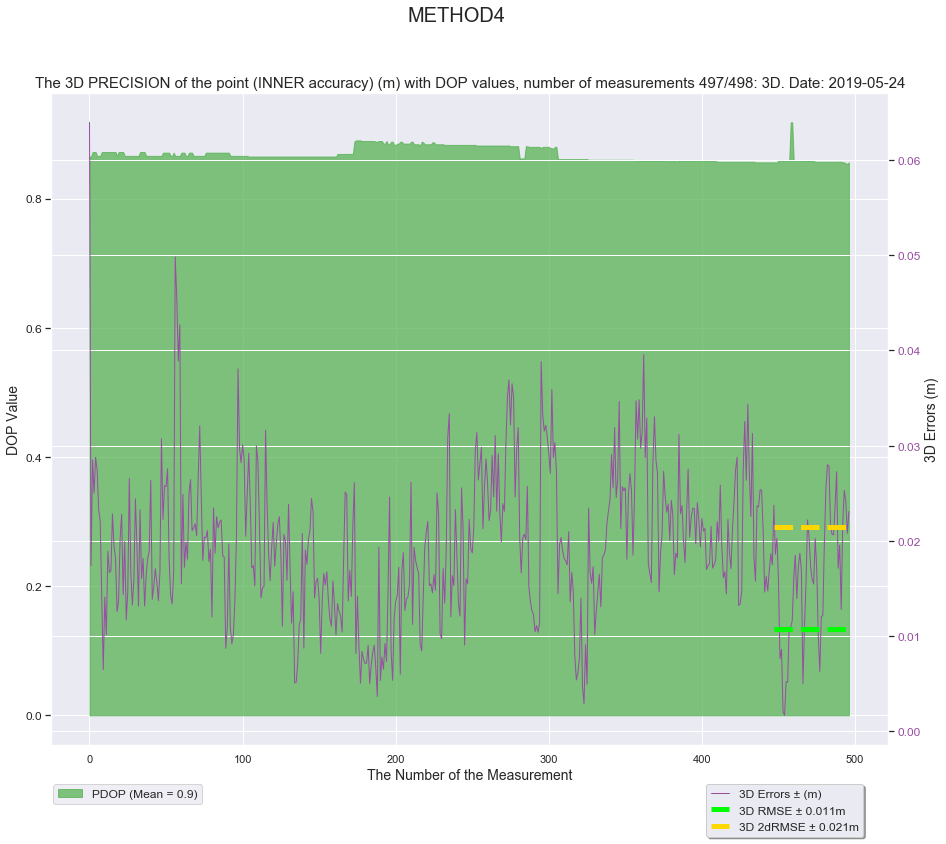

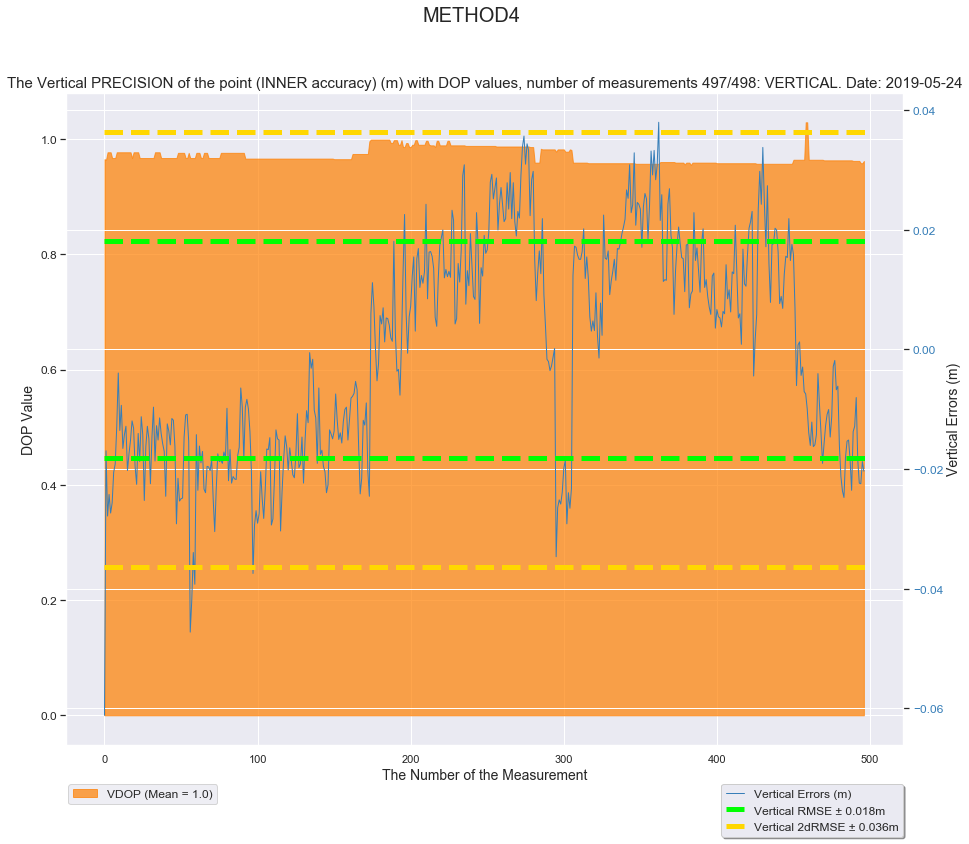

C:\Omat\Jupyter_Notebook\Example Project\90M9180\Conclusions\METHOD4\20190524-A-90M9180-METHOD4-1\20190524-A-90M9180-METHOD4-1_Measurement_Report.pdf created


**This program took 15.29s to finish!**

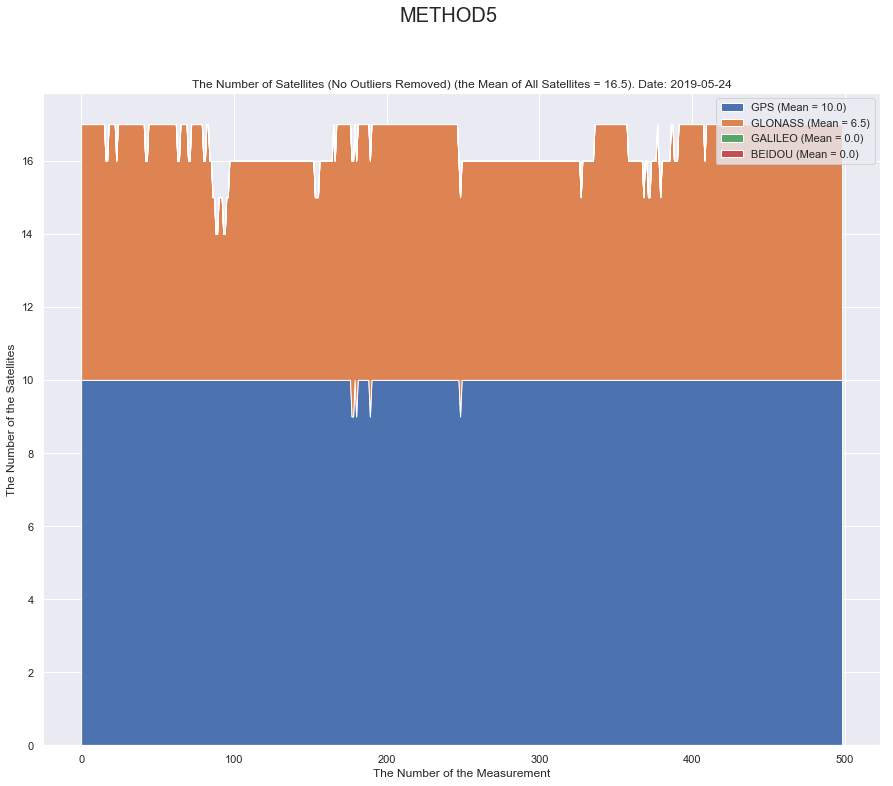

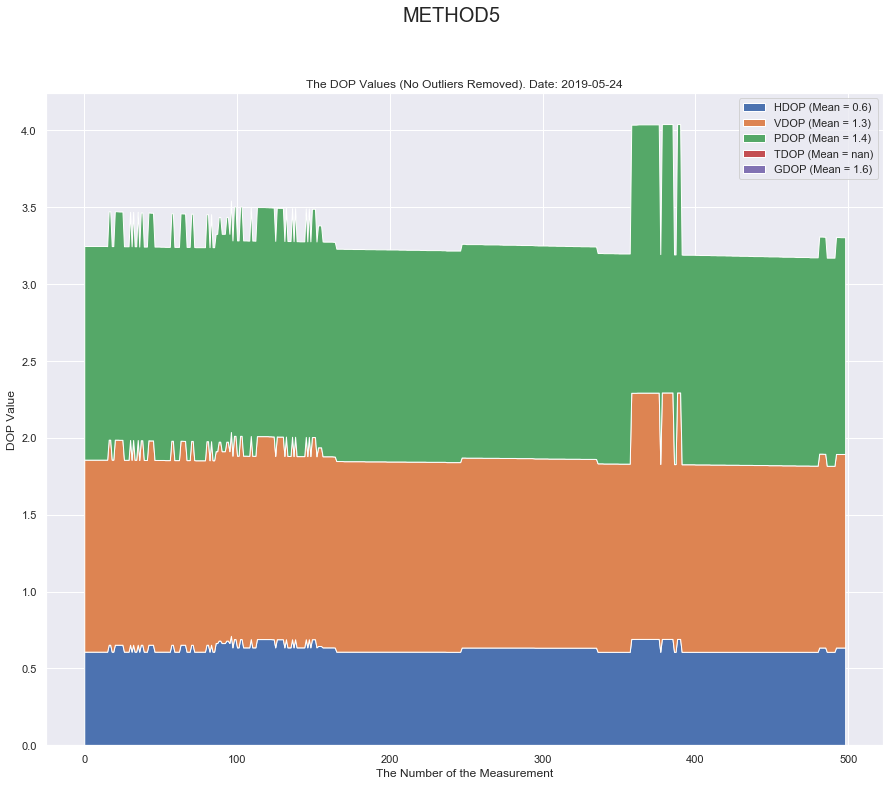

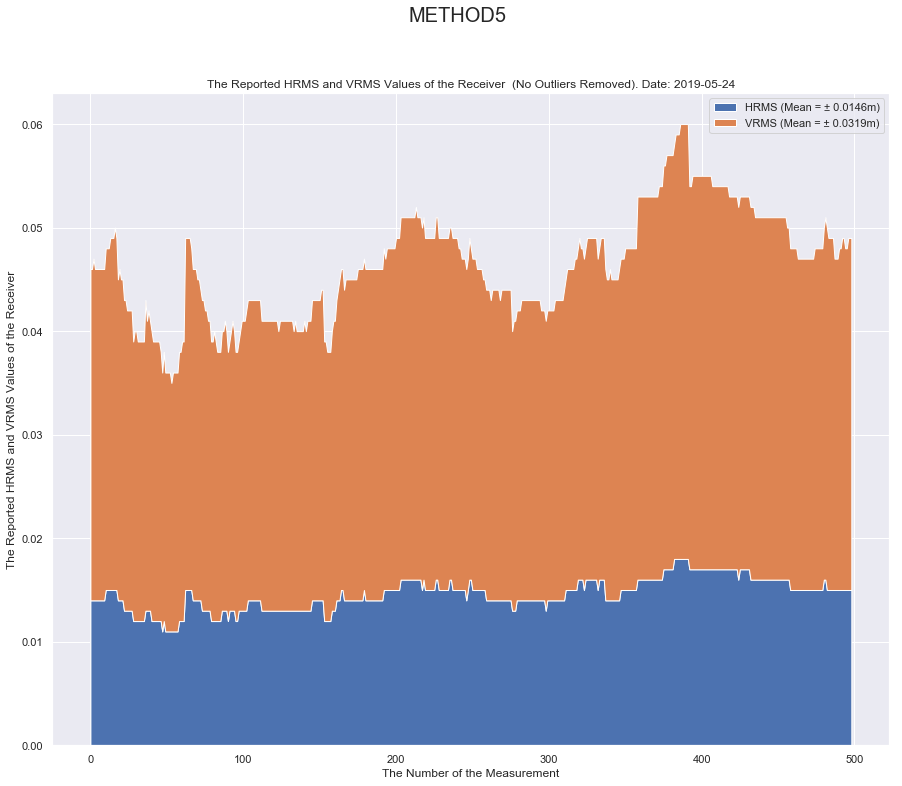

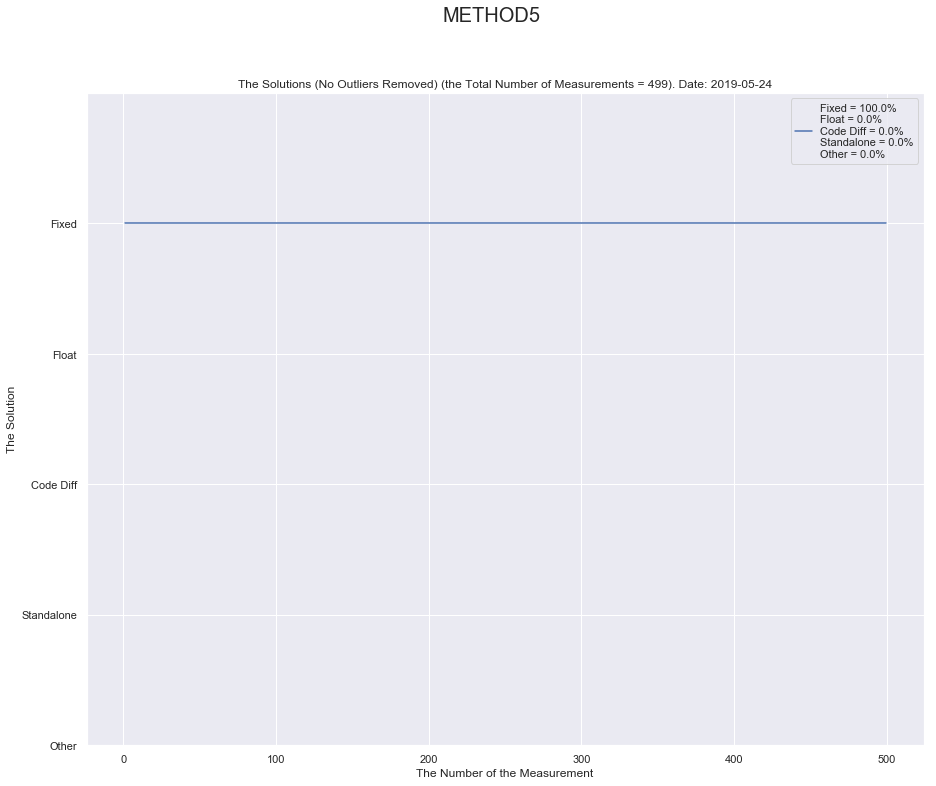

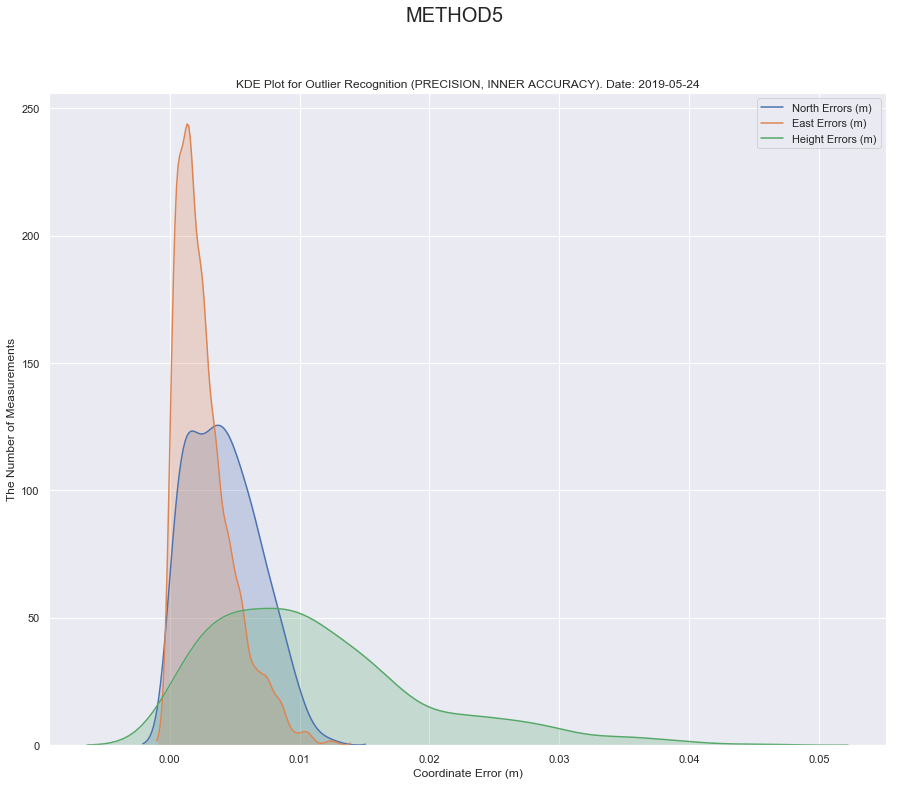

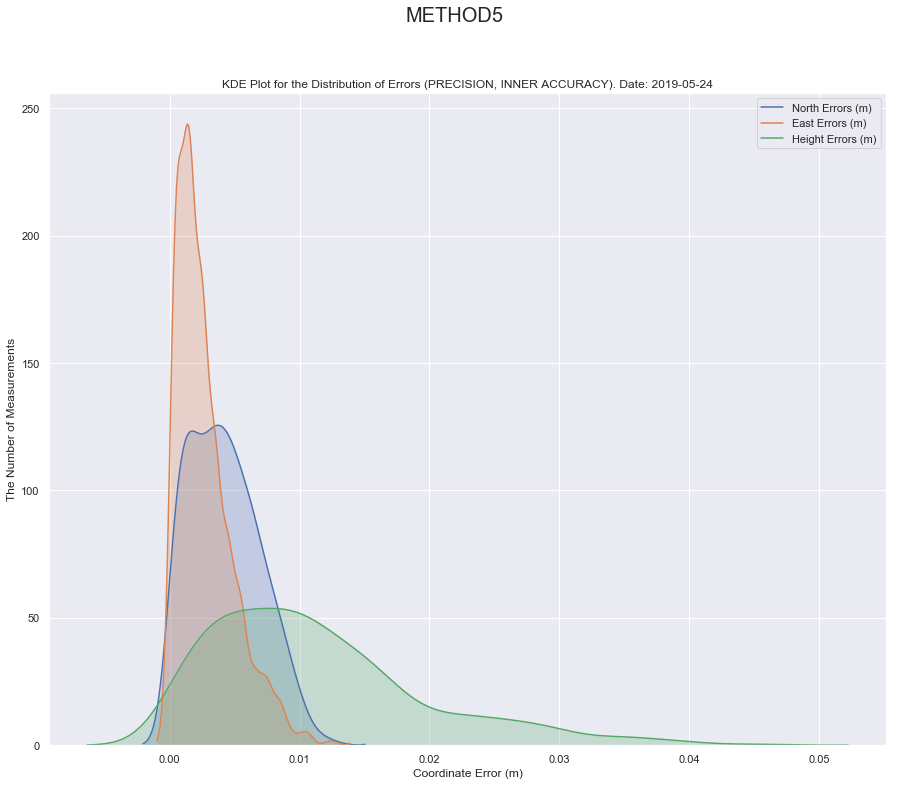

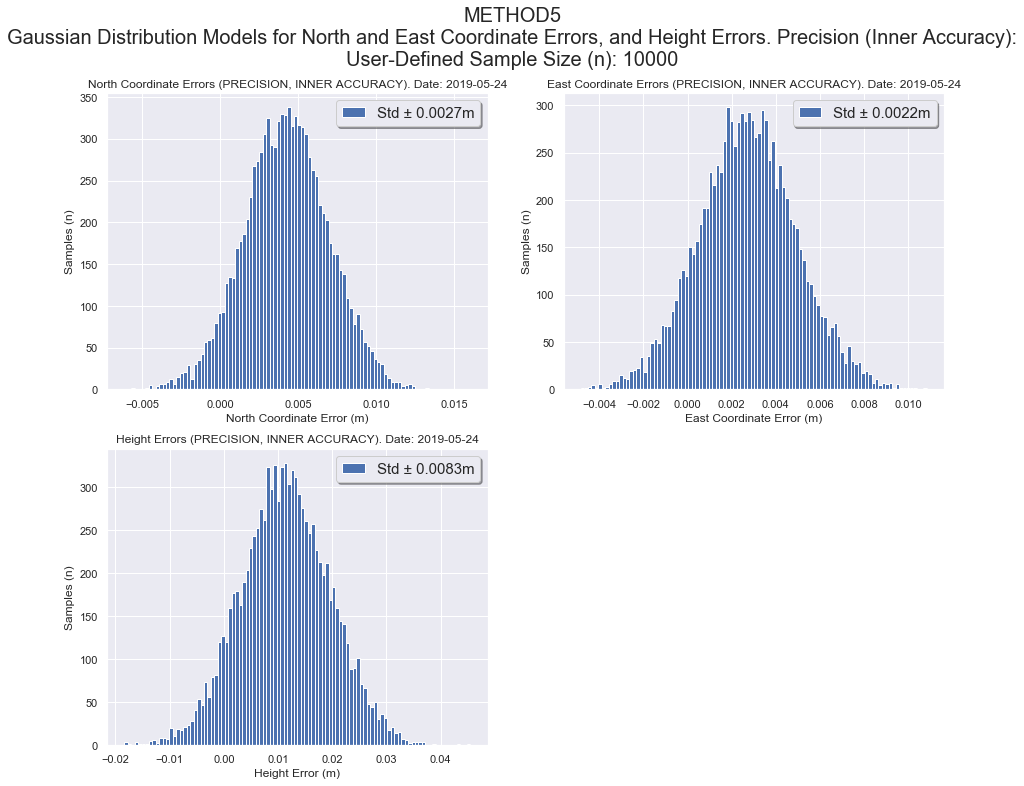

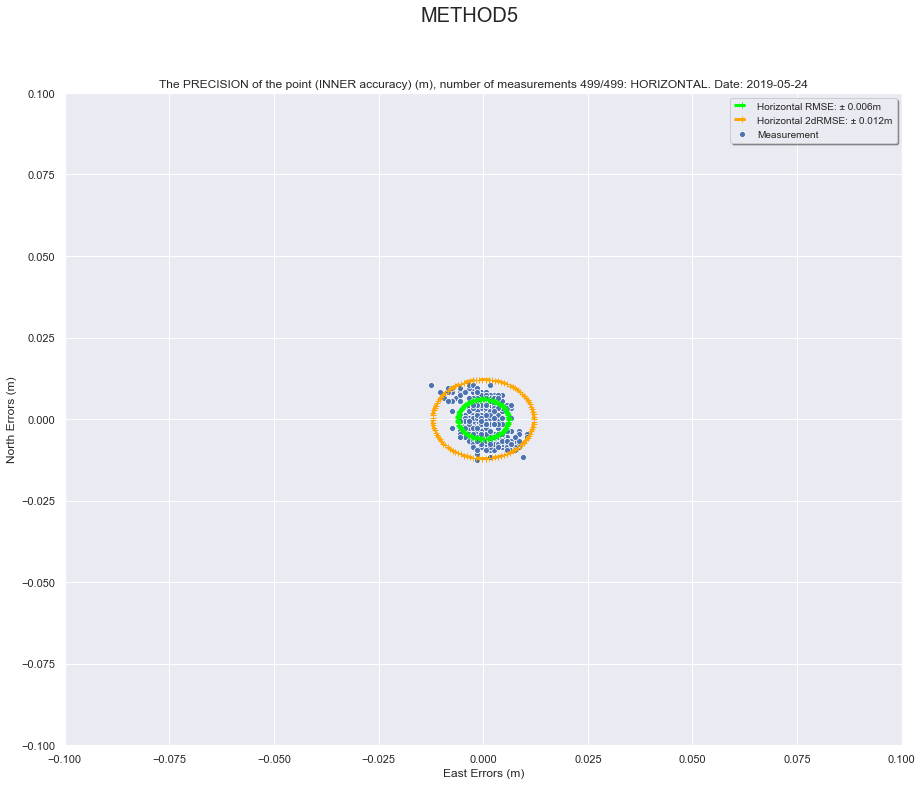

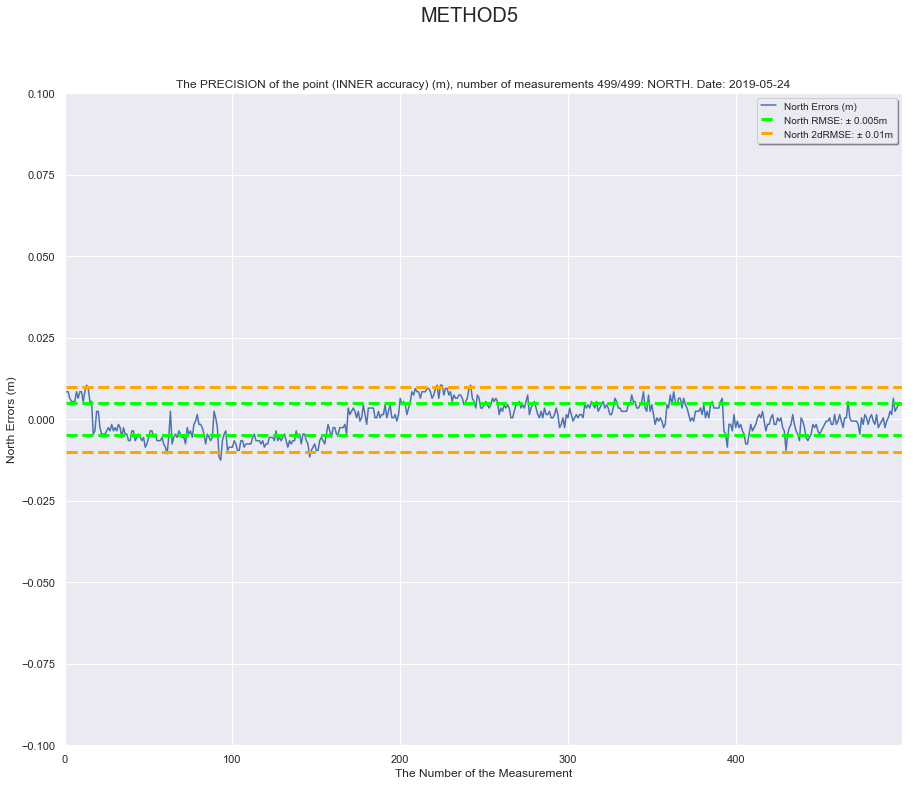

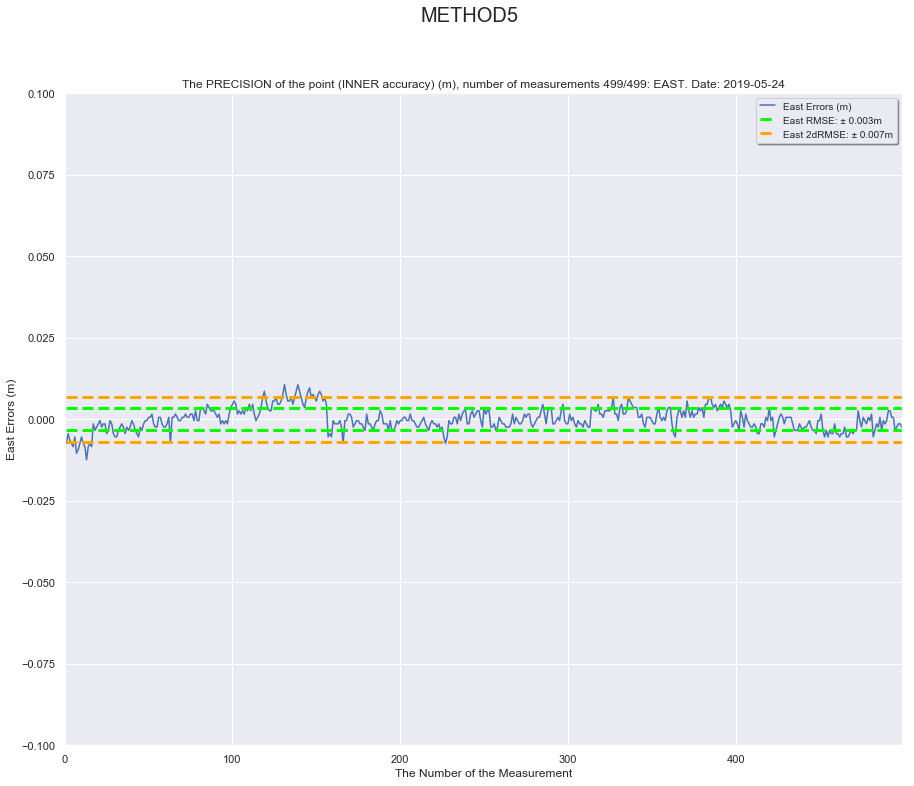

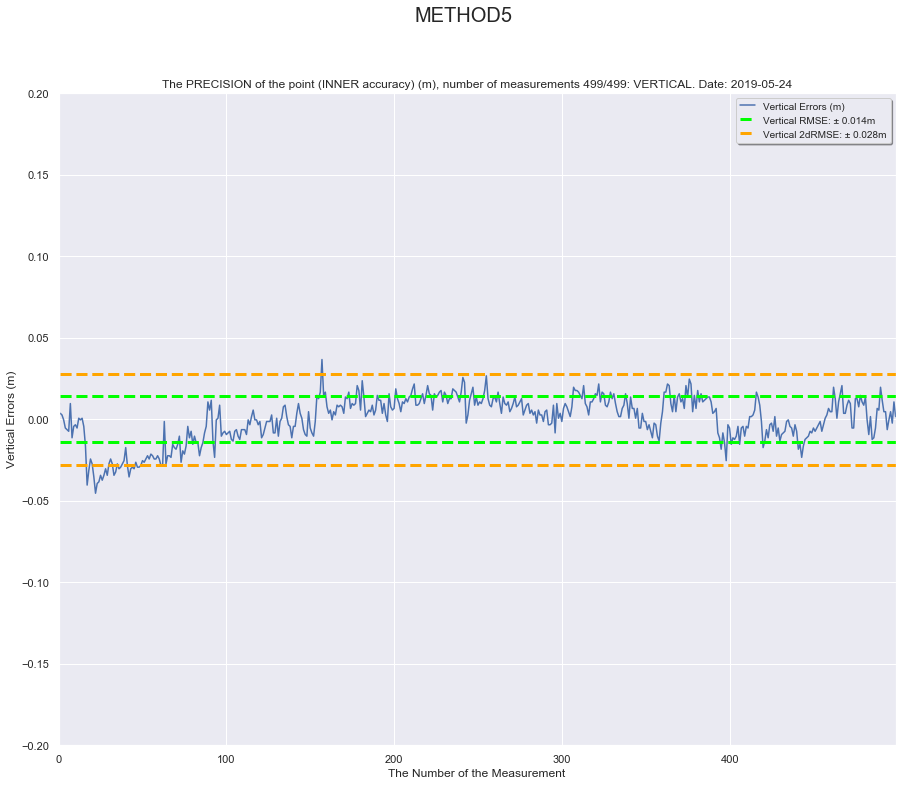

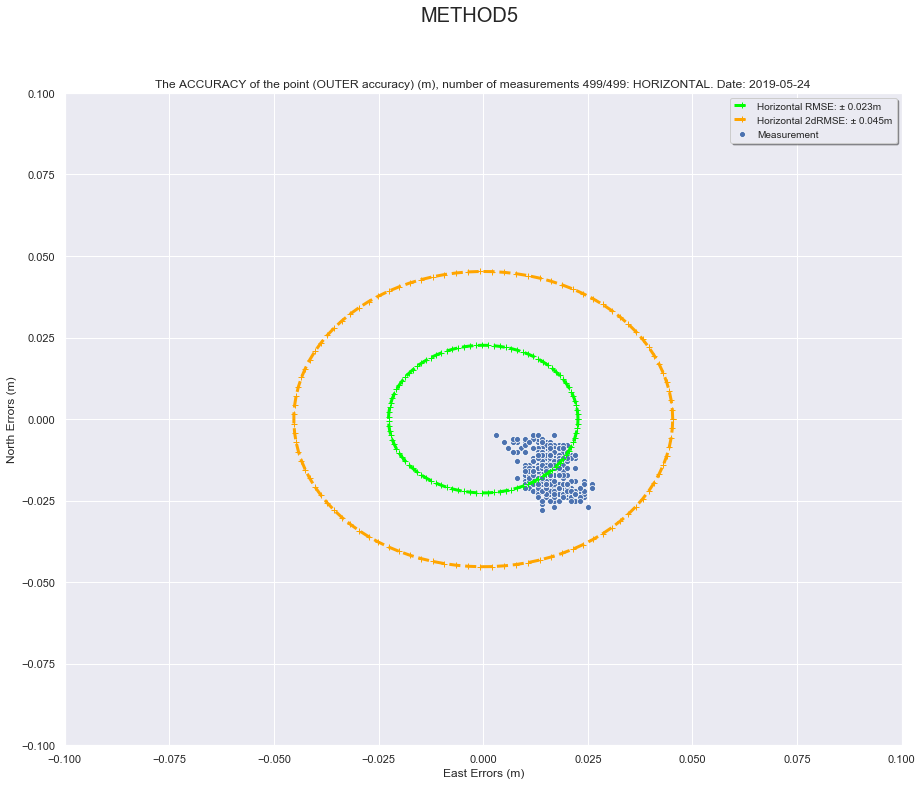

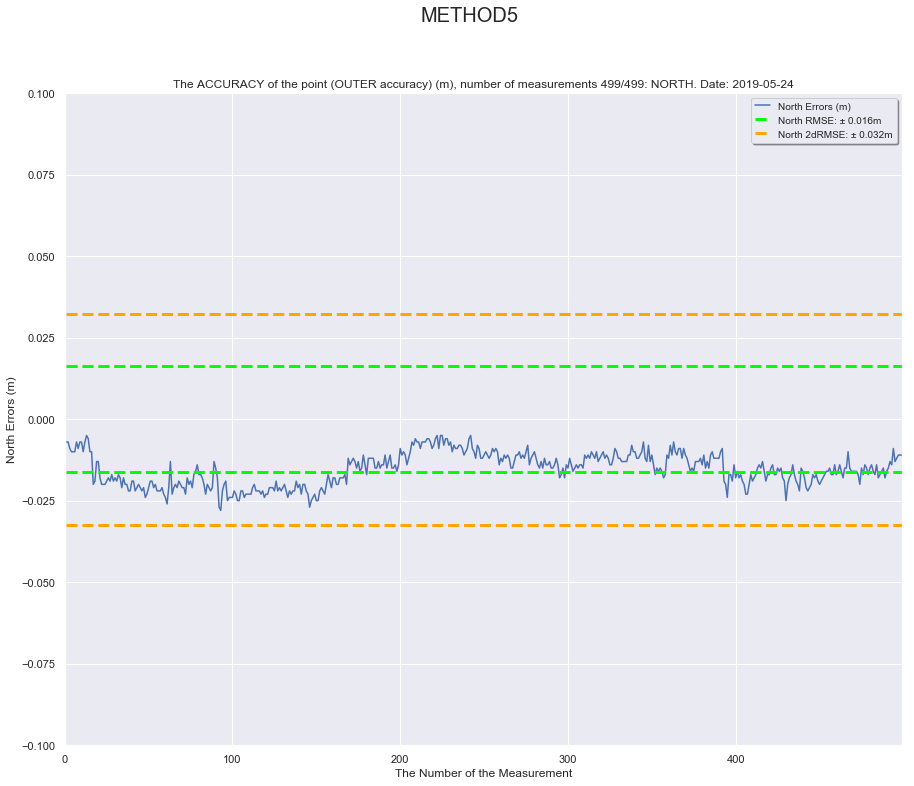

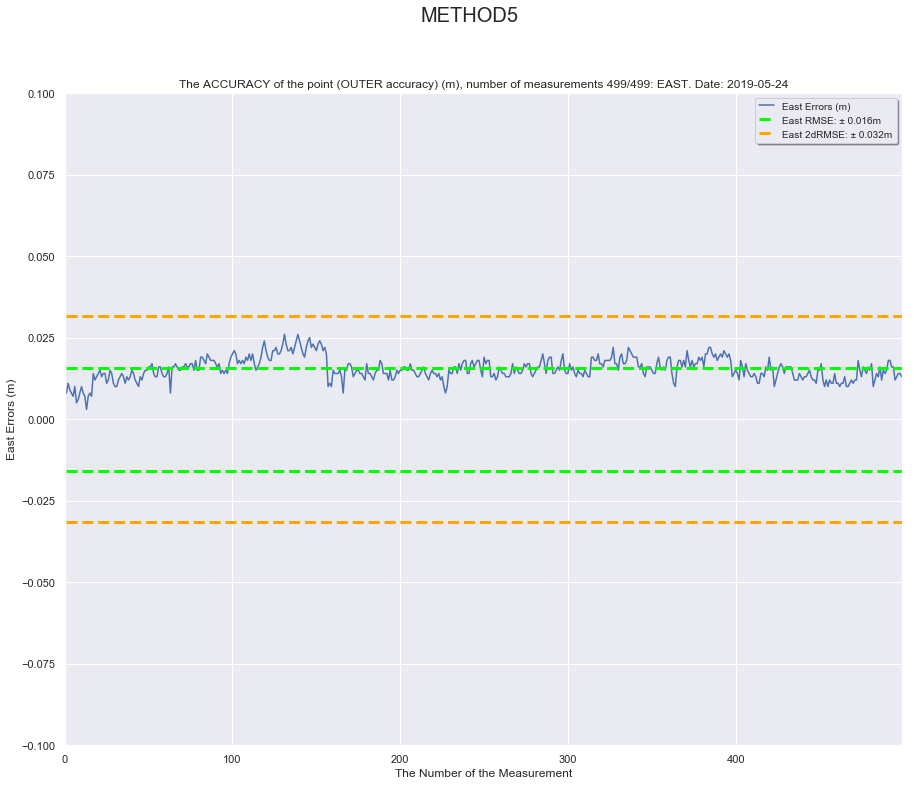

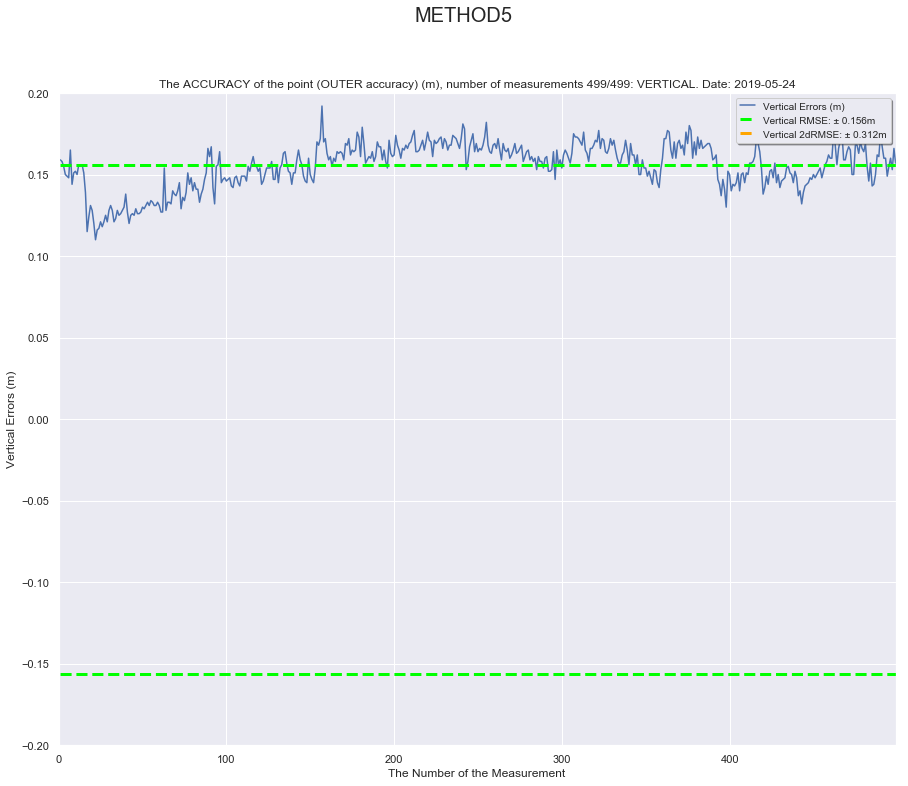

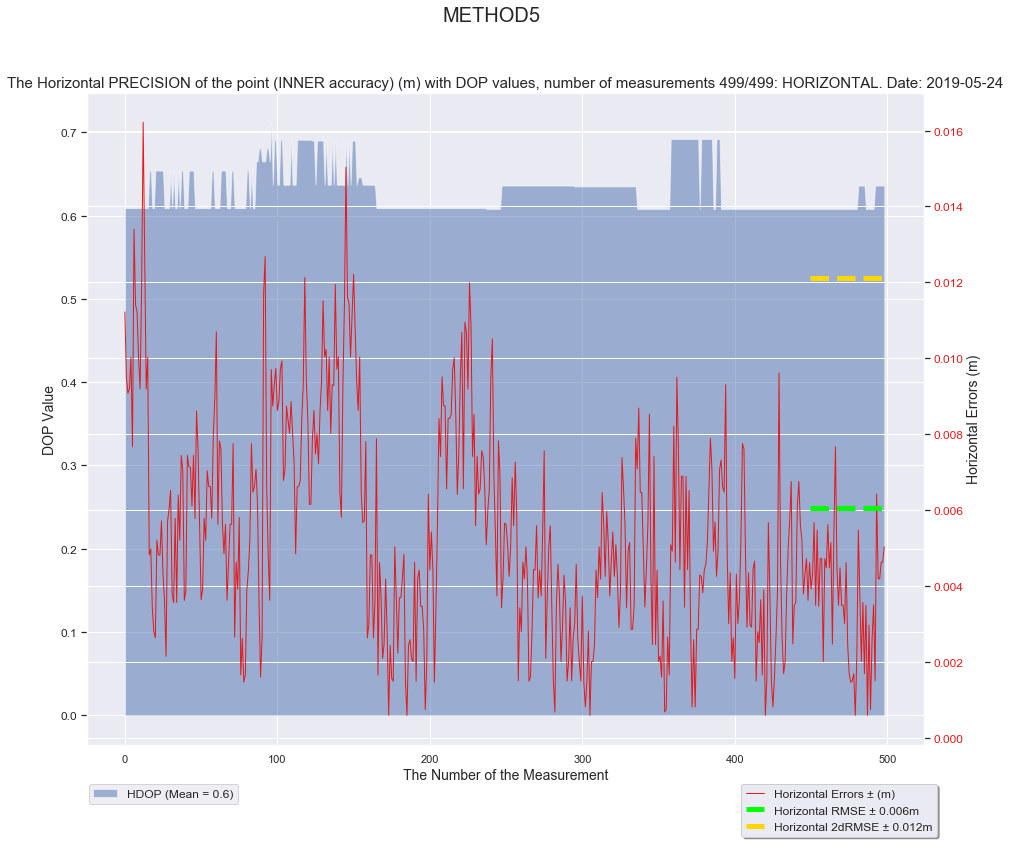

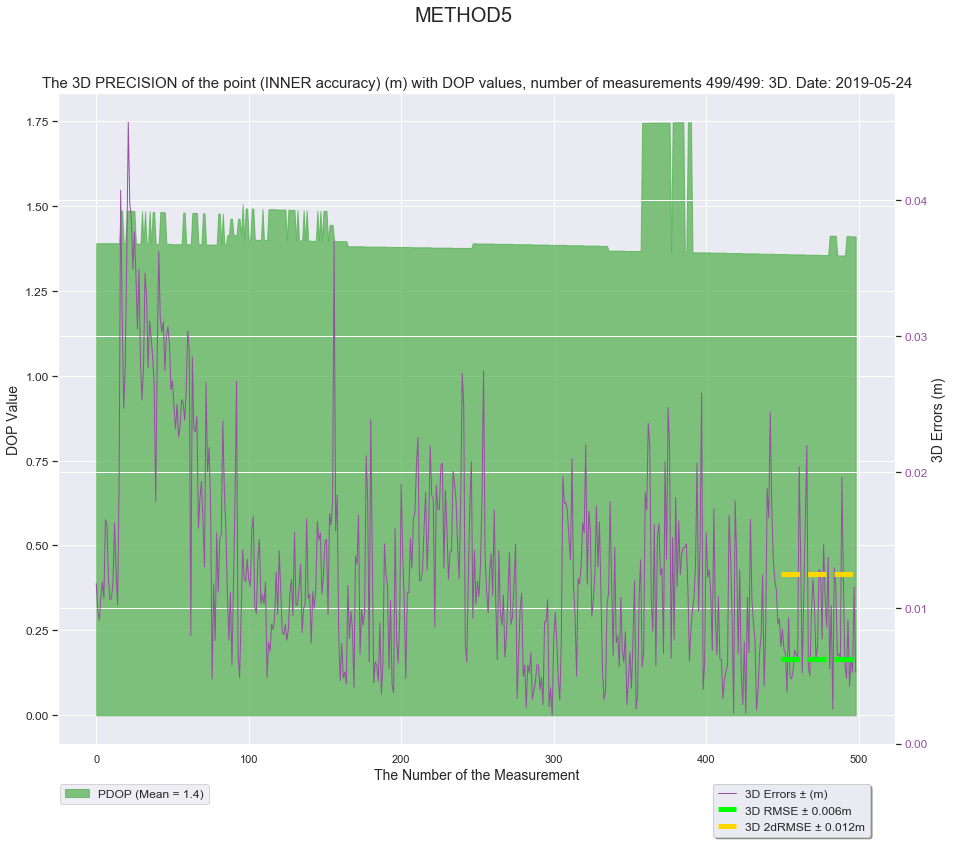

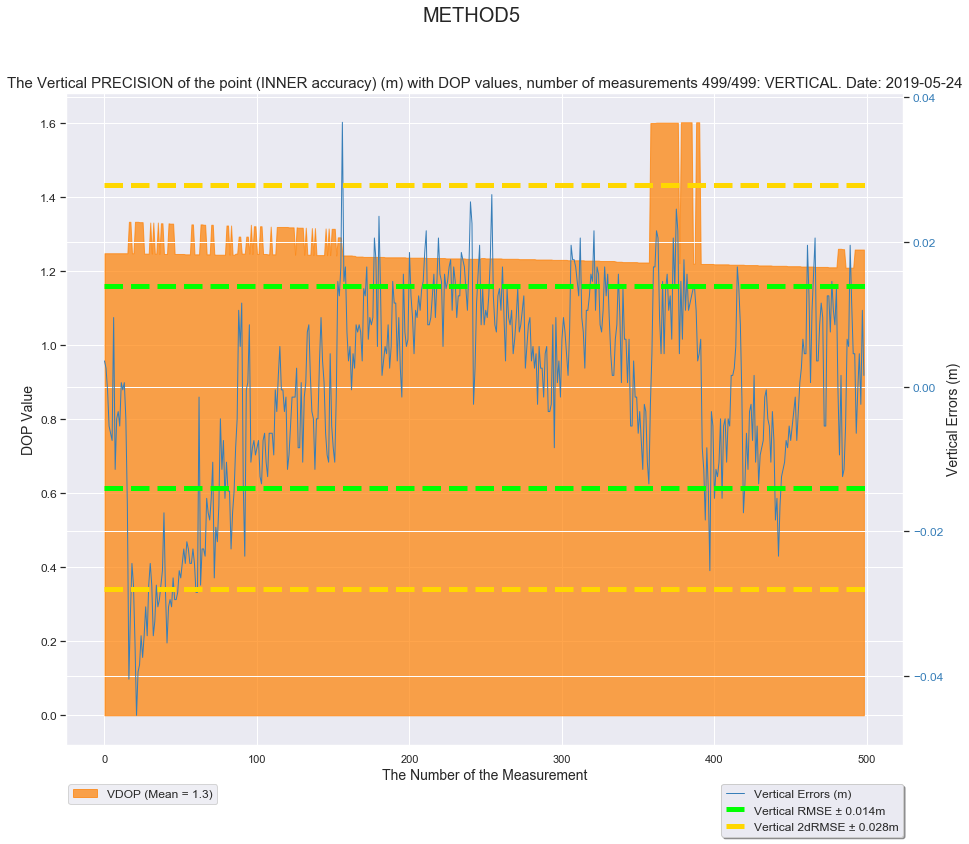

C:\Omat\Jupyter_Notebook\Example Project\90M9180\Conclusions\METHOD5\20190524-A-90M9180-METHOD5-1\20190524-A-90M9180-METHOD5-1_Measurement_Report.pdf created


**This program took 15.74s to finish!**

C:\Omat\Jupyter_Notebook\Example Project\90M9180\Conclusions\90M9180_10_Visits_Conclusions_Measurement_Report.pdf created


**This program took 28.51s to finish!**

In [15]:
create_conclusions_folder = None
create_conclusions_folder = input("Do you want to create a Conclusions folder, which includes a conclusion of all the measurements with the different GNSS devices or Network-RTK methods at the reference point? Enter 'yes' or 'no':\n")
conclusions_folder_name = 'Conclusions'

if create_conclusions_folder == 'yes':
    try:
        os.makedirs('{0}{2}{1}'.format(reference_point_folder_path, conclusions_folder_name, os.sep))
        conclusions_folder_path = '{0}{2}{1}'.format(reference_point_folder_path, conclusions_folder_name, os.sep)
    except:
        print('Folder already exists. Use the existing Conclusions folder location {0}{2}{1}.'.format(reference_point_folder_path, conclusions_folder_name, os.sep))
        conclusions_folder_path = '{0}{2}{1}'.format(reference_point_folder_path, conclusions_folder_name, os.sep)
    %run NLS_GNSS_SOFAMESA_MP_conclusions.ipynb
elif create_conclusions_folder == 'no':
    create_conclusions_folder = None

In [16]:
time_ending = time.time()
display(Markdown('**This program took {}s to finish!**'.format(round(time_ending-time_beginning, 2))))

**This program took 28.52s to finish!**

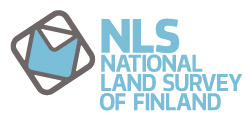
                  
                   
                    Author: Tuukka Mattila
                    Do not hesitate to contact via LinkedIn:
                    https://www.linkedin.com/in/tuukkamattila/
                    
                    Thank you for the help: Topi Rikkinen, Marko Ollikainen, Antti Laaksonen, 
                    Hannu Koivula, Octavian Andrei, Mikael Kauhava, Timo Sallinen and Ari Huvinen